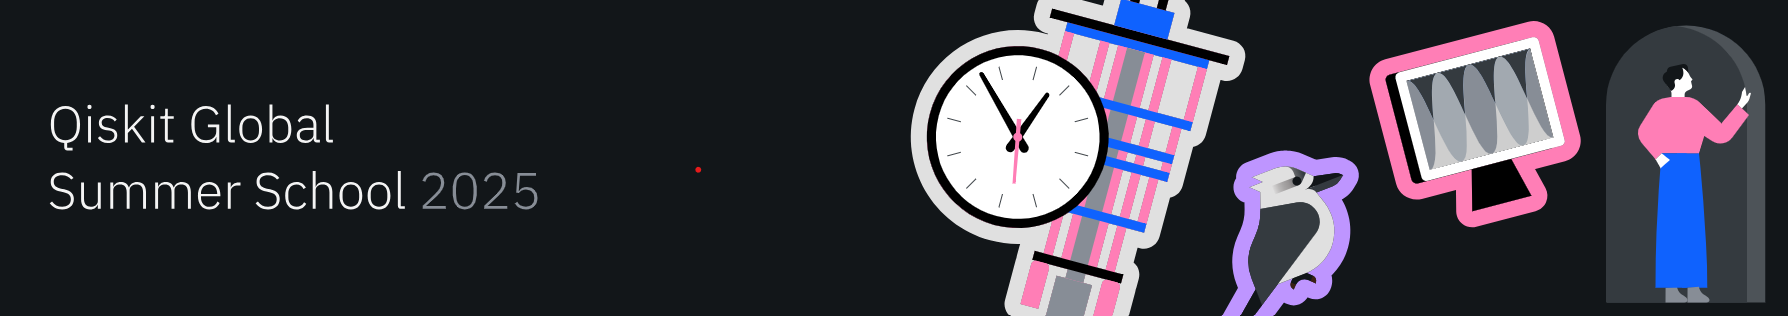

# IBM's Qiskit Global Summer School 2025

## Lab 2: Cutting Through the Noise

***

### Table of Contents

* [Welcome to the Qiskit Global Summer School 2025!](#welcome)
    - [Lab 2 Overview](#overview)
    - [Setup (Gathering Our Tools)](#setup)
    - [Imports](#imports)
<br><br>

0. [Requirements](#requirements)
1. [Introduction](#intro)  
    - [Spirit of the Lab](#spirit)
    - [What is quantum noise?](#quantum-noise)  
    - [Sources of noise](#sources)
        * [Exercise 1: Find the qubits with longer T1, T2, higher gate fidelities, and smaller readout errors](#exercise_1)
2. [Max-cut problem](#max-cut)
    - [The problem: Define the graph](#the-graph)
    - [The mapping: a graph into a quantum computer](#the-mapping)
        * [Exercise 2: Find the Ising Hamiltonian of the Max-cut problem](#exercise_2)
    - [QAOA solution](#qaoa-solution)
    - [Checking our solution](#checking)
3. [Noisy quantum simulator](#noisy-simulator)
    - [Choosing backend](#choosing-backend)
        * [Exercise 3: Counting errors](#exercise_3)
    - [Estimating errors using NEAT](#neat)
4. [Transpiler](#transpiler)
    - [Minimizing two-qubit gates](#min-two-qubit)
    - [Find the optimal layout](#opt-layout)
        * [Exercise 4: Find all the good mappings](#exercise_4)
        * [Exercise 5: Use the transpiler to find the optimal layout](#exercise_5)
5. [Error mitigation](#em)
    - [Zero Noise Extrapolation (ZNE)](#zne)
        * [Exercise 6a: Implement global folding on quantum circuits](#exercise_6a)
        * [Exercise 6b: Implement local  folding on quantum circuits](#exercise_6b)
        * [Exercise 7: Implement Local Zero Noise Extrapolation (ZNE)](#exercise_7)
6. [Conclusions](#conclusions)
7. [Bonus challenge: Scale it up!](#bonus)

# Welcome to the Qiskit Global Summer School 2025!
<a id = "welcome"></a>

***

We are thrilled to welcome you to another year of the **Qiskit Global Summer School (QGSS)**. This two-week summer program combines theoretical lectures with hands-on exercises to expand the knowledge of **Quantum Computing** and **Quantum Programming** among the community of students, researchers, and professionals that use **Qiskit** in their everyday quantum journey. 

The hands-on component of this summer school consists of a series of **Jupyter Notebooks** ("_labs_") designed to guide you through different topics of interest.

Each lab complements the corresponding theoretical lectures and includes helpful links to documentation, tutorials, and references to the lectures. Furthermore, you can also find many useful resources in [**IBM Quantum Learning**](https://quantum.cloud.ibm.com/learning).

***

## Lab 2 Overview
<a id = "overview"></a>

***

In this lab we dive into the world of quantum noise, and explore the different techniques for navigating the challenges of noise in order to obtain good results with current quantum computers. In the context of a small-size Max-cut problem, we provide a step-by-step guide to reduce noise in order to execute a quantum algorithm on a quantum computer. We present different transpilation and error mitigation techniques to minimize the error and ensure that the results remain correct despite the noise. Finally, the lab concludes with a bonus exercise where all the discussed techniques are implemented on real quantum hardware.

***

## Setup (Gathering Our Tools)
<a id="setup"></a>

***

Just like any good experiment, we first need to prepare our equipment. In our case, we need to prepare the **Python** libraries we will use, especially **Qiskit**, our **Quantum Computing** toolkit. You should be all set if you finished the previous labs. If not, you can uncomment the follow cell to install the grader, which will install **Qiskit v2.x** and the necessary libraries necessary for the **Qiskit Global Summer School (QGSS) 2025**.

***

In [1]:
# Install the Grader library for the exercises of
# the Qiskit Global Summer School 2025
%pip install "qc-grader[qiskit,jupyter] \
              @ git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git"

  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to /tmp/pip-install-uv9avvpr/qc-grader_e118a90ec96144c9b80f07141452c9a7
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git /tmp/pip-install-uv9avvpr/qc-grader_e118a90ec96144c9b80f07141452c9a7
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit 1d7a6915623b0cfeac4c114391c279e9d98eb7f9
  Preparing metadata (setup.py) ... done


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import the Qiskit library
import qiskit

# Import the Grader for the exercises of
# the Qiskit Global Summer School 2025
import qc_grader


# Print the Qiskit's version
print(f"Qiskit version: {qiskit.__version__}")

# Print the Grader's version
print(f"Grader version: {qc_grader.__version__}")

Qiskit version: 2.1.1
Grader version: 0.22.12


You should have **Qiskit** version `>=2.0.0` and **Grader** `>=0.22.9`. If you see a lower version, you need to restart your kernel and reinstall the grader.
Also make sure you have set up everything according to the previous labs and test it with the cell below.

For this lab in particular, you will also need to install **Rustworkx** and **Pylatexenc** libraries.

In [3]:
# Install the Rustworkx library
%pip install rustworkx==0.16.0

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Install the Pylatexenc library
%pip install pylatexenc

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Check that the account has been saved properly

# Import Qiskit's Runtime Service
# from the Qiskit's IBM Runtime library
from qiskit_ibm_runtime import QiskitRuntimeService


# Retrieve the Qiskit's Runtime Service
service = QiskitRuntimeService(name = "qgss-2025")

# Retrieve and show the saved accounts
# from the Qiskit's Runtime Service
service.saved_accounts()

{'default-ibm-quantum-platform': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': 'FmkYsECzUIel1UFkZsnqvEVWYcNy05LLI2Hk2fCUvEgc',
  'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/247e8aa9f37443d4a602c03ca5d8cf6d:924d71cd-35a2-4620-8ff7-4a4c0f121e65::',
  'verify': True,
  'private_endpoint': False},
 'qgss-2025': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': 'FmkYsECzUIel1UFkZsnqvEVWYcNy05LLI2Hk2fCUvEgc',
  'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/247e8aa9f37443d4a602c03ca5d8cf6d:924d71cd-35a2-4620-8ff7-4a4c0f121e65::',
  'verify': True,
  'private_endpoint': False}}

## Imports

<a id="imports"></a>

***

Let's now import all the libraries and modules required to solve the exercises of this lab.

In [6]:
# Import the Rustworkx library
import rustworkx as rx

# Import the NumPy library
import numpy as np

# Import the PyPlot module from
# the MatPlotLib library
import matplotlib.pyplot as plt

# Import the MatPlotLib Draw module from
# the Rustworkx's Visualization module
from rustworkx.visualization import mpl_draw as draw_graph

# Import the Qiskit's Runtime Service
# module from the Qiskit's IBM Runtime
from qiskit_ibm_runtime import QiskitRuntimeService

# Import the Minimize module from
# the SciPy's Optimize module
from scipy.optimize import minimize

# Import the Quantum Circuit
# from the Qiskit library
from qiskit import QuantumCircuit

# Import the GenericBackend V2 module from
# the Qiskit's Providers' Fake Provider module
from qiskit.providers.fake_provider import GenericBackendV2

# Import the Sparse Pauli Operator, Statevector,
# Density Matrix, and (generic) Operator modules
# from the Qiskit's Quantum Information module
from qiskit.quantum_info import SparsePauliOp, Statevector,\
                                DensityMatrix, Operator

# Import the Quantum Approximate Optimization Algorithm (QAOA)
# with Ansatz module from the Qiskit's Circuit's Library module
from qiskit.circuit.library import QAOAAnsatz

# Import the Generate Preset Pass Manager module
# from the Qiskit's Transpiler module
from qiskit.transpiler import generate_preset_pass_manager

# Import the Plot Histogram module
# from the Qiskit's Visualization module
from qiskit.visualization import plot_histogram

# Import the Layout module from
# the Qiskit's Transpiler module
from qiskit.transpiler import Layout

# Import the Session, Estimator Options,
# Estimator v2, Sampler v2 modules
# from the Qiskit's IBM Runtime library
from qiskit_ibm_runtime import Session, EstimatorOptions,\
                               EstimatorV2 as Estimator,\
                               SamplerV2 as Sampler
    
# Import the Neat module from
# the Qiskit's IBM Runtime's Debug Tools
from qiskit_ibm_runtime.debug_tools import Neat

# Import the Aer Simulator module
# from the Qiskit's Aer library
from qiskit_aer import AerSimulator

# Import the Zero-Noise Extrapolation (ZNE) Method,
# Plot for the Zero-Noise Extrapolation (ZNE) Method,
# and Plot for Backend Errors and Counts modules
# from the lab 2's utilities library
from utils.lab_2_utils import zne_method, plot_zne,\
                              plot_backend_errors_and_counts

# Import the Graders for the exercises
# 1, 2, 3, 4, 5, and 6 (6a and 6b),
# from the lab 2 of the Qiskit Global Summer School 2025
from qc_grader.challenges.qgss_2025 import (
    grade_lab2_ex1, grade_lab2_ex2,
    grade_lab2_ex3, grade_lab2_ex4,
    grade_lab2_ex5,
    grade_lab2_ex6a, grade_lab2_ex6b
)

# Chapter 1: Introduction to Quantum Noise
<a id="introduction-quantum-noise"></a>

***

*Here, we will walk through the process of tackling real-world problems by using the right* **transpilation** *and* **Quantum Error Mitigation (QEM)** *techniques to maximize performance on* **IBM** **quantum hardware**.

***

## What is Quantum Noise?
<a id="what-is-quantum-noise"></a>

The **Quantum Noise** is a central topic in designing and using **Quantum Computers**, and it is one of the main characteristics of current **Noisy Intermediate-Scale Quantum (NISQ)** **devices**. But what exactly does **Quantum Noise** mean in **Quantum Information**? We usually refer to the term **Quantum Noise** as any undesired transformation that disturbs the expected outcome of the **Quantum Measurement** of a **quantum state**, resulting on possible **Quantum Errors**.

We categorize **Quantum Errors** in two groups:

- **Coherent Errors:**
    * These **Quantum Errors** are caused by small, consistent mistakes in how **quantum operations** (gates) are applied;
    * These **Quantum Errors** are unitary, meaning they do not destroy information and can, in theory, be reversed;
    * A typical example is a quantum gate that is supposed to rotate a qubit by an angle $\theta$, but instead rotates it by $\theta+\varepsilon$ due to *imperfect calibration*;
    * For instance, if a **H (Hadamard)** gate is slightly miscalibrated, it might not create a perfect **Quantum Superposition**, producing a biased measurement outcome.
<br><br>
- **Incoherent Errors:**
    * The origin of these **Quantum Errors** is naturally *quantum* as it comes from the interaction of the **quantum system** with the **environment**;
    * **Incoherent Errors** are the reason why most of the *current* **Quantum Computers** *need to be cooled down to a temperature of the order of milli-Kelvin (mK)*, *to reduce these unwanted interactions and preserve the* **quantum system**'s **coherence**;
    * These interactions create **mixed quantum state**, *which introduce randomness into the output* and make these **Quantum Errors** particularly problematic;
    * A concrete example is $T_1$ **relaxation time**, which describes how a qubit in the **excited** **quantum state** $|1\rangle$ spontaneously decays to the **ground** **quantum state** $∣0\rangle$ over time;
    * If a **Quantum Measurement** is delayed, this decay can cause the qubit to flip **quantum states**, leading to *incorrect outcome results*.

## Sources of Quantum Noise
<a id="sources-quantum-noise"></a>

As mentioned above, some *sources* of **Quantum Noise** come from different factors, including imperfect implementation of **quantum operations** (gates) as **electromagnetic pulses**, **readout errors**, **decoherence of the quantum system**, and so on.

Among the different metrics that can be used to evaluate how good or *noise-resilient* a **Quantum Computer** (or a qubit) is against sources of **Quantum Noise**, we can distinguish a few ones:
* **T1 (Relaxation Time)**:
    * It is a decay constant that measures how quickly a qubit in the **quantum state** $|1\rangle$ decays into the **quantum state** $|0\rangle$;
* **T2 (Dephasing Time)**:
    * It is a decay constant that measures how quickly a qubit in the **quantum state** $|+\rangle$ becomes an indistinguishable mixture of the $|+\rangle$ and $|-\rangle$ **quantum states**;
* **Single-Qubit Gate Fidelity**:
    * It quantifies how closely the actual operation $\mathcal{E}$ performed by the **quantum hardware** matches the ideal single-qubit unitary $U$;
    * A fidelity of 1 means the **quantum operation** (gate) behaves exactly as intended, with no deviation from the ideal case.
* **Two-Qubit Gate Fidelity**:
    * It quantifies how closely the actual operation $\mathcal{E}_2$ performed by the **quantum hardware** matches the ideal single-qubit unitary $U_2$;
    * Since these **quantum operations** (gates) are more complex, they tend to have lower fidelities;
    * As in the single-qubit case, a fidelity of 1 represents a perfect match.
* **Readout Assignment Error**:
    * It is a probability that a qubit is measured incorrectly, implying that the measured classical bit does not match the actual **quantum state** of the qubit just before the **Quantum Measurement**.

You can see information about specific **IBM** **quantum devices** on the [**IBM Quantum Cloud Platform**](https://quantum.cloud.ibm.com/computers). Click the **quantum device** you want to analyze to see detailed characteristics of each qubit, along with a summary of the **quantum hardware**'s overall properties. The image below shows an example of this summary for the device `ibm_brisbane`.

![./resources/ibm-brisbane-specs.png](./resources/ibm-brisbane-specs.png)

You can also access this information about the **quantum devices** directly through code.

Let's see how it is done!

<a id="exercise-1"></a>
<div class="alert alert-block alert-success">
    
<b>Exercise 1: Find the Best Qubits</b> 

**Your Goal:** Find the qubits with longer **T1**, **T2**, **higher gate fidelities**, and **smaller readout errors**.

In this first exercise, you will provide the best value of each of the following metrics, as well as the qubit, or pair of qubits, that have this value:

- **Relaxation Time (T1)**;
- **Dephasing Time (T2)**;
- **Single-Qubit Gate Error:** `PauliX` **Error**;
- **Readout Error**;
- **Two-Qubits Gate Error:** `Ecr` **Error**. 

To make your solution robust, you should write a routine that works for any **Quantum Backend**.
<br><br>
***Note 1:***   
* The **ECR** gate is the two-qubit gate specific to this **Quantum Backend** and may differ on other **quantum devices**, which might have CZ or CNOT gates;
* You can check the basis gate of **Quantum Backend** by using [**backend.basis_gates**](/docs/api/qiskit-ibm-runtime/ibm-backend).
    
***Note 2:***
* Since the best-performing qubits and their values can change over time, we recommend finding these values across all qubits directly using **Python**'s `min()` and `max()` functions for each run.

</div>

The code below demonstrates how to retrieve and store properties for all qubits from the `ibm_brisbane` **backend** into an array. Use this as a reference when implementing your function.

In [7]:
# Define the Quantum Backend to
# be used as the IBM's Brisbane
# retrieved from the Qiskit's Runtime Service
# for the Qiskit Global Summer School 2025
brisbane_backend = service.backend("ibm_brisbane")


# Retrieve the Properties of the IBM's Brisbane
# Backend retrieved from the Qiskit's Runtime Service
# for the Qiskit Global Summer School 2025
properties = brisbane_backend.properties()

# Retrieve the Number of Qubits of the IBM's Brisbane
# Backend retrieved from the Qiskit's Runtime Service
# for the Qiskit Global Summer School 2025
num_qubits = brisbane_backend.num_qubits

# Retrieve the Coupling Map of the IBM's Brisbane
# Backend retrieved from the Qiskit's Runtime Service
# for the Qiskit Global Summer School 2025
coupling_map = brisbane_backend.coupling_map


# Define the several lists of metrics
# (T1, T2, Readout Error, Pauli-X Error, and ECR Error)
# for all the qubits of the IBM's Brisbane Backend
# retrieved from the Qiskit's Runtime Service
# for the Qiskit Global Summer School 2025
t1, t2, readout_error,\
    gate_error_x, gate_error_ecr = [], [], [], [], []


# For each index of the qubits of
# the IBM's Brisbane Backend retrieved
# from the Qiskit's Runtime Service
# for the Qiskit Global Summer School 2025
for i in range(num_qubits):
    
    # Append the Relaxation Time (T1)
    # for the current qubit of the IBM's
    # Brisbane Backend retrieved from
    # the Qiskit's Runtime Service for
    # the Qiskit Global Summer School 2025
    # to the respective list
    t1.append(properties.t1(i))
    
    # Append the Dephasing Time (T2)
    # for the current qubit of the IBM's
    # Brisbane Backend retrieved from
    # the Qiskit's Runtime Service for
    # the Qiskit Global Summer School 2025
    # to the respective list
    t2.append(properties.t2(i))
    
    # Append the Pauli-X (gate) Error
    # for the current qubit of the IBM's
    # Brisbane Backend retrieved from
    # the Qiskit's Runtime Service for
    # the Qiskit Global Summer School 2025
    # to the respective list
    gate_error_x.append(properties.gate_error\
                        (gate = "x", qubits = i))
    
    # Append the Readout Error
    # for the current qubit of the IBM's
    # Brisbane Backend retrieved from
    # the Qiskit's Runtime Service for
    # the Qiskit Global Summer School 2025
    # to the respective list
    readout_error.append(properties.readout_error(i))


# For each pair of connected qubits of
# the Coupling Map of the IBM's Brisbane
# Backend retrieved from the Qiskit's Runtime
# Service for the Qiskit Global Summer School 2025
for qubits_pair in coupling_map:
    
    # Append the ECR (gate) Error for
    # the current pair of connected qubits of
    # the IBM's Brisbane Backend retrieved from
    # the Qiskit's Runtime Service for
    # the Qiskit Global Summer School 2025
    # to the respective list
    gate_error_ecr.append(properties.gate_error\
                          (gate = "ecr", qubits = qubits_pair))

In [8]:
# Function to find the best-performing qubits and
# pair of connected qubits of a given Quantum Backend,
# based on various quantum hardware metrics
def find_best_metrics(backend: QiskitRuntimeService.backend) \
    -> list[tuple[int or list, float]]:
    
    
    ### WRITE YOUR CODE BELOW HERE ###
    
    # Task: Obtain the best value and the index or indices of
    #       the qubits of the following metrics below:
    
    
    # Retrieve the Properties of the given Backend
    properties = backend.properties()

    # Retrieve the Number of Qubits of the given Backend
    num_qubits = backend.num_qubits

    # Retrieve the Coupling Map of the given Backend
    coupling_map = backend.coupling_map
    
    
    # Define the several lists of metrics
    # (T1, T2, Readout Error, Pauli-X Error, and ECR Error)
    # for all the qubits of the given Backend
    t1, t2, readout_error,\
        gate_error_x, gate_error_ecr = [], [], [], [], []


    # For each index of the qubits of
    # the given Backend
    for i in range(num_qubits):

        # Append the Relaxation Time (T1)
        # for the current qubit of the given
        # Backend to the respective list
        t1.append(properties.t1(i))

        # Append the Dephasing Time (T2)
        # for the current qubit of the given
        # Backend to the respective list
        t2.append(properties.t2(i))

        # Append the Pauli-X (gate) Error
        # for the current qubit of the given
        # Backend to the respective list
        gate_error_x.append(properties.gate_error\
                            (gate = "x", qubits = i))

        # Append the Readout Error
        # for the current qubit of the given
        # Backend to the respective list
        readout_error.append(properties.readout_error(i))


    # For each pair of connected qubits of
    # the Coupling Map of the given Backend
    for qubits_pair in coupling_map:

        # Append the ECR (gate) Error for
        # the current pair of connected qubits of
        # the given Backend to the respective list
        gate_error_ecr.append(properties.gate_error\
                              (gate = "ecr", qubits = qubits_pair))
    
    
    # Find the best qubit (index_t1_max)
    # with the longest/maximum T1 and its value (max_t1)
    index_t1_max = np.argmax(t1)
    max_t1 = np.max(t1)

    # Find the best qubit (index_t2_max)
    # with the longest/maximum T2 and its value (max_t2)
    index_t2_max = np.argmax(t2)
    max_t2 = np.max(t2)

    # Find the best qubit (index_min_x_error)
    # with the smallest/lowest Pauli-X (gate) Error
    # and its value (min_x_error)
    index_min_x_error = np.argmin(gate_error_x)
    min_x_error = np.min(gate_error_x)

    # Find the best qubit (index_min_readout)
    # with the smallest/lowest Readout Error
    # and its value (min_readout)
    index_min_readout = np.argmin(readout_error)
    min_readout = np.min(readout_error)
    
    # Find the best pair of connected qubits (min_ecr_pair)
    # with smallest/lowest ECR (gate) Error
    # and its value (min_ecr_error)
    min_ecr_pair = coupling_map.get_edges()[np.argmin(gate_error_ecr)]
    min_ecr_error = np.min(gate_error_ecr)
    
    ### YOUR CODE FINISHES HERE    ###
    
    
    # Define the complete list of solutions
    # regarding the best-performing qubits and
    # pair of connected qubits found for a given
    # Quantum Backend, based on various quantum hardware metrics
    solutions = \
    [   [int(index_t1_max), max_t1],
        [int(index_t2_max), max_t2],
        [int(index_min_x_error), min_x_error],
        [int(index_min_readout), min_readout],
        [list(min_ecr_pair), min_ecr_error]
    ]
    
    # Return the complete list of solutions
    # regarding the best-performing qubits and
    # pair of connected qubits found for a given
    # Quantum Backend, based on various quantum hardware metrics
    return solutions

In [9]:
# Submit your answer for the exercise 1 of the lab 2,
# using the following code from the Grader
grade_lab2_ex1(find_best_metrics)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


***

Good job! You have learned how to access the **quantum device**'s properties and search for specific characteristics among them. Perhaps at this point you might be wondering whether we cannot simply look for the qubits with the best metrics. Well, it is not that easy. 

If you print the indices of the qubits you have obtained, you can see that they are not clustered in a specific region of the **quantum device**. Instead, they are spread out across different areas. This highlights a key challenge: a qubit with long **Relaxation Time (T1)** might also have a **large single-qubit gate error**, or vice versa. These trade-offs mean that choosing qubits based only on one metric may not lead to optimal performance for certain **Quantum Algorithms**. Furthermore, you also need to take into account that not all the qubits are connected, as shown on the **Coupling Map**. These factors make the task of choosing the specific layout of qubits an intricate, but fascinating, challenge. Fortunately for us, in **Qiskit** there's a dedicated tool designed to handle this problem: The **Transpiler**!

We will explore the **Transpiler** in detail in a later section.

***

# Chapter 2: The Max-Cut Problem
<a id="max-cut-problem"></a>

The [**Maximum Cut (Max-Cut)**](https://en.wikipedia.org/wiki/Maximum_cut) problem is a **graph problem** that lies in the category of [**NP-Hard**](https://en.wikipedia.org/wiki/NP-hardness), which means *no algorithm exists that can solve it in polynomial time*. **Max-Cut** is an *optimization problem* with a wide range of applications including **Clustering**, **Network Science**, **Statistical Physics**, and **Machine Learning**. The goal of this problem is to *divide the nodes of a graph into two sets using a single cut*, in such a way that *the number of edges traversed by this cut is maximized*. 

Let's visualize it with one example. 

In the picture below you see the **Max-Cut Problem**'s solution of a five-node problem that exemplifies *how the graph is divided*, *maximizing the number of edges cut*. Another way to view this problem is to consider that *finding the maximum cut in a graph means identifying a way to divide the nodes into two groups such that the number of edges connecting nodes from different groups is as large as possible*.

![./resources/max-cut-example.png](./resources/max-cut-example.png)

In this lab, we will solve a **Max-Cut problem** using a **Quantum Algorithm**. We will also study how **Quantum Noise** affects our solution and discuss strategies to reduce its impact, ensuring we can still obtain accurate results despite the **Quantum Noise**.

***

## 2.1. The Problem: Define the Graph
<a id="problem-define-the-graph"></a>

Now that we have a little bit of context of the **Max-Cut Problem**, let's choose a specific **graph** for which *we want to find the maximum cut*. In particular, we will choose the **graph** of the **Coupling Map** of a *hypothetical* **Quantum Computer** *with all-to-all connectivity*.

*Note that the last qubit is not actually connected to the first one, to explicitly break the symmetry of the problem and reduce the number of solutions*.

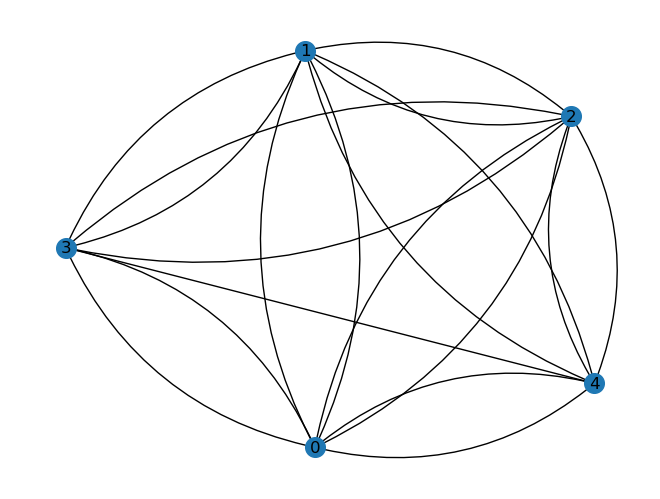

In [10]:
# Define a seed for
# pseudo-randomness purposes
seed = 43

# Define the number of nodes
# for the graph of the Max-Cut Problem
num_nodes = 5


# Define the graph of the Max-Cut Problem
graph = rx.PyGraph()

# Add nodes to the graph of the Max-Cut Problem
graph.add_nodes_from(np.arange(0, num_nodes, 1))

# Create a (generic) Backend for a Quantum Simulation
generic_backend = GenericBackendV2(num_nodes, seed = seed)

# Define the weight of the edges
# for the graph of the Max-Cut Problem 
weight = 1


# Add edges to the graph of the Max-Cut
# Problem according to the Coupling Map of
# the Quantum Backend to be used as the IBM's Brisbane
# retrieved from the Qiskit's Runtime Service
# for the Qiskit Global Summer School 2025
# Note:
# * The graph will be defined explicitly as being
#   asymmetrical to have a smaller set of solutions
graph.add_edges_from([(edge[0], edge[1], weight)
                      for edge in generic_backend.coupling_map][:-1])


# Draw the graph of the Max-Cut
# Problem according to the Coupling Map of
# the Quantum Backend to be used as the IBM's Brisbane
# retrieved from the Qiskit's Runtime Service
# for the Qiskit Global Summer School 2025
draw_graph(graph, node_size = 200,
           with_labels = True, width = 1)

***

## 2.2. The Mapping: A Graph Into a Quantum Computer
<a id="mapping-graph-into-quantum-computer"></a>

To solve our graph problem with a **Quantum Computer**, we must first translate it into a language the computer understands. A common and powerful approach is to reframe the *optimization problem* in terms of a **Hamiltonian**, a mathematical object from **Quantum Mechanics** that describes the **total energy** of a **quantum physical system**. The solution to our problem will then be encoded in the **lowest energy** **quantum state** (the **"ground state"**) of this **Hamiltonian**.

There are two closely related languages for formulating such problems:

1.  **Quadratic Unconstrained Binary Optimization (QUBO):**
    * This is a language often used in **Computer Science** and **Classical Optimization**;
    * It uses binary variables **x<sub>i</sub> ∈ {0, 1}** and seeks to *minimize* an *objective function* of the form:
    
    $$ \text{minimize} \sum_{i} Q_{ii}x_{i} + \sum_{i<j} Q_{ij}x_{i}x_{j} $$

2.  **Ising Model:**
    * This language originates from **Statistical Physics** and is a natural fit for **quantum physical systems**.
    * It uses spin variables **s<sub>i</sub> ∈ {+1, -1}** and seeks to *minimize* an *energy* **Hamiltonian** of the form:

    $$ H = -\sum_{i} h_{i}s_{i} - \sum_{i<j} J_{ij}s_{i}s_{j} $$

These two formalisms are equivalent and can be converted into one another using the simple linear transformation:
* **s<sub>i</sub> = 2x<sub>i</sub> - 1**.

For this lab, we will map our graph problem directly to an **Ising Hamiltonian**. This is the most direct path for a **Quantum Computer** because the *eigenvalues* of the **Pauli Z** operator are **+1** and **-1**, which perfectly correspond to the *spin variables* **s<sub>i</sub>** in the **Ising Model**.

***

### From Max-Cut Problem to an Ising Hamiltonian

For the **Max-Cut Problem** on a graph $G = (V, E)$, we want to *partition* the *vertices* $V$ into two sets. The goal is to *maximize* the number of *edges* connecting *vertices* in *different sets*. We can express this *objective* using our *spin variables* **s<sub>i</sub>**. If two connected *nodes* `i` and `j` are in *different partitions* (s<sub>i</sub> ≠ s<sub>j</sub>), the term $s_i * s_j$ will be **-1**. If they are in the same *partition* (s<sub>i</sub> = s<sub>j</sub>), the term will be **+1**.

To *maximize* the cuts, we want to *minimize* the sum of $s_i * s_j$ over all connected *edges*.

This gives us our **cost** **Hamiltonian**:

$$ H_{cost} = \sum_{(i,j) \in E} Z_i \otimes Z_j $$

Here we have replaced the *classical* *spin variables* `s_i` with their *quantum counterparts*, the **Pauli-Z<sub>i</sub>** **operators**, which act on the `i`-th qubit. The **ground state** of this **Hamiltonian** is the specific arrangement of qubit **quantum states** (`|0⟩` or `|1⟩`) that *minimizes* this **Hamiltonian** **energy**, directly giving us the solution to the **Max-Cut Problem**.

Please refer this [**tutorial**](https://quantum.cloud.ibm.com/docs/tutorials/quantum-approximate-optimization-algorithm) for more details.

That is exactly what the next exercise is all about!

***

<a id="exercise-2"></a>
<div class="alert alert-block alert-success">
    
<b>Exercise 2: From a Graph to a Hamiltonian</b> 

**Your Goal:** Convert the 'graph' object we just created into an **Ising Hamiltonian**, which is the **cost function** for our **Max-Cut Problem**.

In this second exercise, you must find the way of *mapping* the **graph problem** you are given to a **Hamiltonian** using the **Identity** and **Pauli** gates.

</div>

***

<div class="alert alert-info">

<details>
<summary> <h3>Hint 💡</h3> <b>(Click to Expand)</b></summary>

The intuition of how to build this **Hamiltonian** consists of considering a **Hilbert Space** of size **n &times; n** in which we add as many *terms* as *edges* in the graph, and in which the *nodes* connected by each *edge* are represented by **Pauli-Z** matrices, whereas the rest of the *nodes* are represented by the **Identity** matrix.

You can find useful functions in the <a href=https://quantum.cloud.ibm.com/docs/tutorials/advanced-techniques-for-qaoa#graph--hamiltonian>**Graph to Hamiltonian**</a> section of the <a href="https://quantum.cloud.ibm.com/docs/tutorials/advanced-techniques-for-qaoa">**Advanced techniques for Quantum Approximate Optimization Algorithm (QAOA)**</a> tutorial mentioned above.
    
</details>
</div>

In [11]:
# Function to convert a given graph to a Hamiltonian
# defined as list of Identity and Pauli gates
def graph_to_Pauli(graph: rx.PyGraph) -> list[tuple[str, float]]:
  
    # Create an empty list for the Pauli and Identity gates
    paulis_ids_list = []

    
    ### WRITE YOUR CODE BELOW HERE ###
    
    # Task 2/Step 2 - Convert the graph
    #                 into a list like:
    #                 [['PauliWord_1', weight_1],
    #                  ['PauliWord_2', weight_2], (...)]
    
    # Retrieve the number of nodes of
    # the graph of the Max-Cut Problem
    num_nodes = graph.num_nodes()     
    
    # Retrieve the list of edges of
    # the graph of the Max-Cut Problem
    edge_list = graph.edge_list()
    
    # Retrieve the weight of the edges of
    # the graph of the Max-Cut Problem
    # Note:
    # * Recall we defined a fixed unitary
    #   weight for all the edges of the graph 
    weight = 1
    
    
    # For each pair of edges of
    # the graph of the Max-Cut Problem
    for (edge_i, edge_j) in edge_list:
        
        # Define the Pauli and Identity Operator String,
        # initially as a all Identity Operator String
        paulis_ids_operator_string = ["I"] * num_nodes

        # Set the Pauli-Z Operator in the corresponding i-th
        # position of the Identity Operator String according to
        # the i-th vertex of the current edge pair
        paulis_ids_operator_string[(num_nodes - edge_i - 1)] = "Z"

        # Set the Pauli-Z Operator in the corresponding j-th
        # position of the Identity Operator String according to
        # the j-th vertex of the current edge pair
        paulis_ids_operator_string[(num_nodes - edge_j - 1)] = "Z"
        
        
        # Define the final list of Pauli-Z and Identity Operators,
        # as well as the respective edges' weights
        paulis_ids_list.append(("".join(paulis_ids_operator_string), weight))
        
    ### YOUR CODE FINISHES HERE    ###
    
    
    # Return the list of Pauli-Z and Identity Operators
    # defining the Hamiltonian of the graph
    return paulis_ids_list

In [12]:
# Convert the graph of the Max-Cut Problem to
# a Hamiltonian defined as list of Identity and Pauli gates
max_cut_ids_paulis = graph_to_Pauli(graph)

# Compute the Cost Function of the Hamiltonian of
# the graph for the Max-Cut Problem defined previously
cost_function_hamiltonian = SparsePauliOp.from_list(max_cut_ids_paulis)

# Print the Pauli and Identity Operators list
# and respective coefficients of the Cost Function of
# the Hamiltonian of the graph for the Max-Cut Problem defined previously
print("\033[1mCost Function for Hamiltonian:\033[0m")
print(" * Pauli/Identity Operators:", cost_function_hamiltonian.paulis[:6])
print("                            ", cost_function_hamiltonian.paulis[6:12])
print("                            ", cost_function_hamiltonian.paulis[12:])
print(" * Coefficients:", cost_function_hamiltonian.coeffs\
                          [:int(len(cost_function_hamiltonian.coeffs)/2)])
print("                ", cost_function_hamiltonian.coeffs\
                          [int(len(cost_function_hamiltonian.coeffs)/2):])

Cost Function for Hamiltonian:
 * Pauli/Identity Operators: ['IIIZZ', 'IIIZZ', 'IIZIZ', 'IIZIZ', 'IZIIZ', 'IZIIZ']
                             ['ZIIIZ', 'ZIIIZ', 'IIZZI', 'IIZZI', 'IZIZI', 'IZIZI']
                             ['ZIIZI', 'ZIIZI', 'IZZII', 'IZZII', 'ZIZII', 'ZIZII', 'ZZIII']
 * Coefficients: [1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j]
                 [1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j]


In [13]:
# Submit your answer for the exercise 2 of the lab 2,
# using the following code from the Grader
grade_lab2_ex2(graph_to_Pauli)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


***

## 2.3. Quantum Approximate Optimization Algorithm (QAOA) Solution
<a id="qaoa-solution"></a>

Now that we have successfully mapped our **Max-Cut Problem** to an **Ising Hamiltonian**, we have translated a *classical* *graph problem* into a **quantum** **ground state** *search problem*. The solution to the original problem is encoded in the **quantum state** with the **lowest possible energy** (the **"ground state"**) of this **Hamiltonian**.

Several **Quantum Algorithms** can be employed to find this **ground state**. One of the most prominent is the [**Quantum Approximate Optimization Algorithm (QAOA)**](https://en.wikipedia.org/wiki/Quantum_optimization_algorithms). [\[1\]](https://arxiv.org/abs/1411.4028) **Quantum Approximate Optimization Algorithm (QAOA)** is known for its *adaptability*, relatively *shallow circuit depth*, and *strong performance* across a range of *optimization tasks*.


If you want a full description of **Quantum Approximate Optimization Algorithm (QAOA)**, we recommend this [tutorial](https://quantum.cloud.ibm.com/docs/tutorials/quantum-approximate-optimization-algorithm) as well as the [**Utility-Scale Quantum Approximate Optimization Algorithm (QAOA)**](https://quantum.cloud.ibm.com/learning/courses/quantum-computing-in-practice/utility-scale-qaoa) lesson from the **Quantum Computing in Practice** course. Here, we will briefly comment on the main idea behind it. 

**Quantum Approximate Optimization Algorithm (QAOA)** is a **Variational Quantum Algorithm** inspired by the **Adiabatic Theorem**, which states that a **quantum physical system** remains in its **ground state** if it *evolves slowly enough*. **Quantum Approximate Optimization Algorithm (QAOA)** mimics this by starting in the **ground state** of a known **Hamiltonian** (the *mixer*) and *evolving toward* the **ground state** of a **Hamiltonian** that *encodes our problem* (the *cost*). This is done through *alternating layers of the two* **Hamiltonians**, with each step controlled by tunable parameters that guide the **quantum physical system** toward the *optimal solution*.

After this little explanation of the theory, let's get some hands-on practice using `QAOAAnsatz` from **Qiskit** to implement **Quantum Approximate Optimization Algorithm (QAOA)** and solve our **Max-Cut Problem**.

***

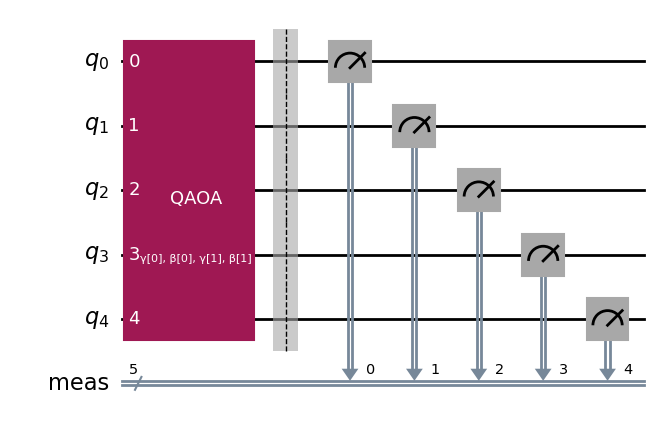

In [14]:
# Define the number of alternating layers of
# the two Hamiltonians for the Quantum Approximate
# Optimization Algorithm (QAOA) Ansatz
num_layers = 2


# Define the Quantum Circuit
# for the Quantum Approximate
# Optimization Algorithm (QAOA) Ansatz,
# with the corresponding Cost Function of
# the graph for the Max-Cut Problem defined previously
# and the number of alternating layeres of the two Hamiltonians
qaoa_ansatz_circuit = QAOAAnsatz(cost_operator = cost_function_hamiltonian,
                                 reps = num_layers)


# Measure all the qubits
# in the Quantum Circuit
# for the Quantum Approximate
# Optimization Algorithm (QAOA) Ansatz
qaoa_ansatz_circuit.measure_all()


# Draw the Quantum Circuit
# for the Quantum Approximate
# Optimization Algorithm (QAOA) Ansatz
qaoa_ansatz_circuit.draw("mpl")

After we define the **Quantum Approximate Optimization Algorithm (QAOA) Ansatz Quantum Circuit**, we must pass it to the pass manager to transpile it to the native *quantum gates* of the **Quantum Backend**.

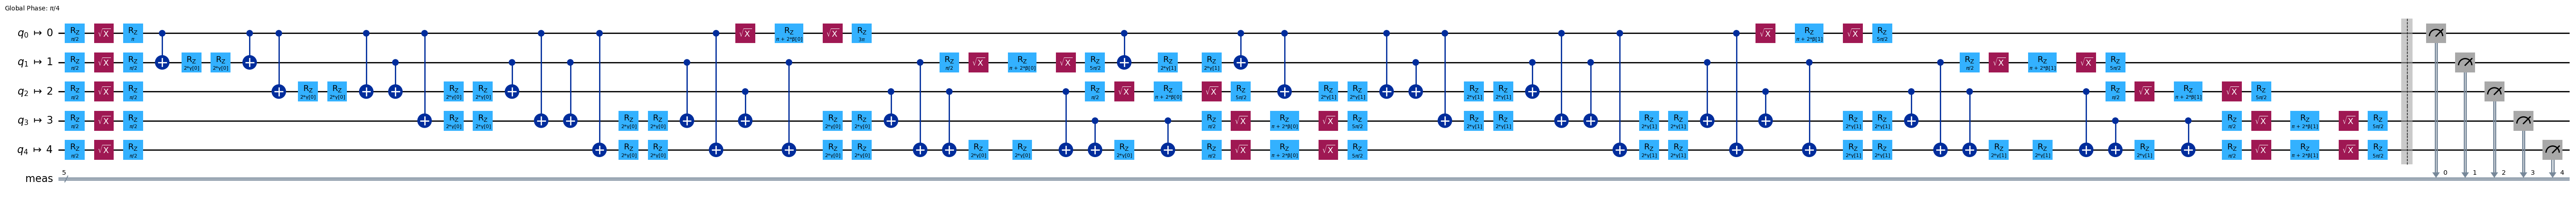

In [15]:
# Create the Pass Manager for the transpilation of
# the Quantum Circuit for the Quantum Approximate
# Optimization Algorithm (QAOA) Ansatz for
# the (generic) Backend defined before
# and with some optimization settings
pass_manager = generate_preset_pass_manager\
    (optimization_level = 3,
     backend = generic_backend,
     seed_transpiler = seed)


# Transpile the Quantum Circuit
# for the Quantum Approximate
# Optimization Algorithm (QAOA) Ansatz
# for the Quantum Simulation
qaoa_ansatz_circuit_transpiled = \
    pass_manager.run(qaoa_ansatz_circuit)


# Draw the Quantum Circuit
# for the Quantum Approximate
# Optimization Algorithm (QAOA) Ansatz
# for the Quantum Simulation
qaoa_ansatz_circuit_transpiled.draw("mpl", fold = False,
                                    idle_wires = False)

Now we define the initial parameters of our **Quantum Approximate Optimization Algorithm (QAOA) Ansatz Quantum Circuit** **model**.


In [16]:
# Define the initial parameters of
# the (parameterized) Quantum Approximate Optimization
# Algorithm (QAOA) Ansatz Quantum Circuit model
init_params = np.zeros(2 * num_layers)

We define and execute an *optimization method* using the library `scipy`.

In [17]:
# Create a list for the values of the Objective Function of
# the optimization problem to be executed
objective_func_vals = []

In [18]:
# Function to compute the Cost Function Values,
# using a (parameterized) Quantum Approximate Optimization
# Algorithm (QAOA) Ansatz Quantum Circuit model
# and an estimator for a given Hamiltonian
def cost_func_estimator(params: list, ansatz: QuantumCircuit,
                        isa_hamiltonian: SparsePauliOp, estimator: Estimator) -> float:

    # If the number of qubits of the Hamiltonian
    # is different than the number of qubits of
    # the Quantum Approximate Optimization
    # Algorithm (QAOA) Ansatz Quantum Circuit model
    if isa_hamiltonian.num_qubits != ansatz.num_qubits:
        
        # Apply the layout of the (parameterized)
        # Quantum Approximate Optimization Algorithm (QAOA)
        # Ansatz Quantum Circuit model to the Hamiltonian
        isa_hamiltonian = isa_hamiltonian.apply_layout(ansatz.layout)
    
    
    # Create a Primitive Unified Block (PUB)
    # for the (parameterized) Quantum Approximate
    # Optimization Algorithm (QAOA) Ansatz Quantum Circuit model,
    # Hamiltonian, and optimizable parameters
    pub = (ansatz, isa_hamiltonian, params)
    
    
    # Submit the Primitive Unified Block (PUB)
    # for the (parameterized) Quantum Approximate
    # Optimization Algorithm (QAOA) Ansatz
    # Quantum Circuit model, Hamiltonian,
    # and optimizable parameters to the Estimator
    # and execute it, retrieving the corresponding job
    job = estimator.run([pub])
    
    # Get the results of the job
    # executed from the Estimator 
    results = job.result()[0]
    
    
    # Retrieve the (evaluated) Cost Function Values
    # from the results of the job executed from the Estimator 
    cost = results.data.evs
    
    # Append the (evaluated) Cost Function Values
    # from the results of the job executed from the Estimator
    # to the list of Objective Function Values of
    # the optimization problem being solved
    objective_func_vals.append(cost)
    
    
    # Return the (evaluated) Cost Function Values
    # from the results of the job executed from the Estimator 
    return cost

In [19]:
# Function to optimize the (parameterized) Quantum Approximate
# Optimization Algorithm (QAOA) Ansatz Quantum Circuit model,
# using the Constrained Optimization By Yinear Linear Approximation
# (COBYLA) optimizer and an estimator on a given Backend
def train_qaoa(params: list, circuit: QuantumCircuit,
               hamiltonian: SparsePauliOp,
               backend: QiskitRuntimeService.backend) -> tuple:
    
    # Within the context of a Session with the given Backend
    with Session(backend = backend) as session:
        
        # Define the options for the Quantum Simulation
        options = {"simulator": {"seed_simulator": seed}}

        # Define the Estimator for the Quantum Simulation
        # with the Session context and respective options
        estimator = Estimator(mode = session, options = options)

        
        # Define the default number of shots for the Quantum Simulation
        estimator.options.default_shots = 100000

        
        # Execute the minimization method to solve
        # the optimization problem for the (parameterized)
        # Quantum Approximate Optimization Algorithm (QAOA)
        # Ansatz Quantum Circuit model, using the Constrained
        # Optimization By Yinear Linear Approximation (COBYLA) optimizer,
        # retrieving the final optimization results
        result = minimize(cost_func_estimator, params,
                          args = (circuit, hamiltonian, estimator),
                          method = "COBYLA", options = {"maxiter": 200,
                                                        "rhobeg": 1, "catol": 1e-3,
                                                        "tol": 0.0001})
    
    
    # Print the final optimization results for
    # the solved optimization problem for the (parameterized)
    # Quantum Approximate Optimization Algorithm (QAOA)
    # Ansatz Quantum Circuit model, using the Constrained
    # Optimization By Yinear Linear Approximation (COBYLA) optimizer
    print(result)
    
    
    # Return the final optimization results and
    # Objective Function Values for the solved
    # optimization problem for the (parameterized)
    # Quantum Approximate Optimization Algorithm (QAOA)
    # Ansatz Quantum Circuit model, using the Constrained
    # Optimization By Yinear Linear Approximation (COBYLA) optimizer
    return result, objective_func_vals

In [20]:
# Optimize the (parameterized) Quantum Approximate
# Optimization Algorithm (QAOA) Ansatz Quantum Circuit model,
# using the Constrained Optimization By Yinear Linear Approximation
# (COBYLA) optimizer and an estimator on a given Backend,
# retrieving the final optimization results and Objective Function Values
result_qaoa, objective_func_vals = \
    train_qaoa(init_params, qaoa_ansatz_circuit_transpiled,
               cost_function_hamiltonian, generic_backend)

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -3.724092759072409
       x: [ 9.735e-01  9.780e-01 -5.691e-01  1.029e+00]
    nfev: 63
   maxcv: 0.0


After the *optimization routine* is executed, we can see how the **Cost Function** evolves with the *number of iterations* to check how the **Optimization Algorithm** has *converged*.

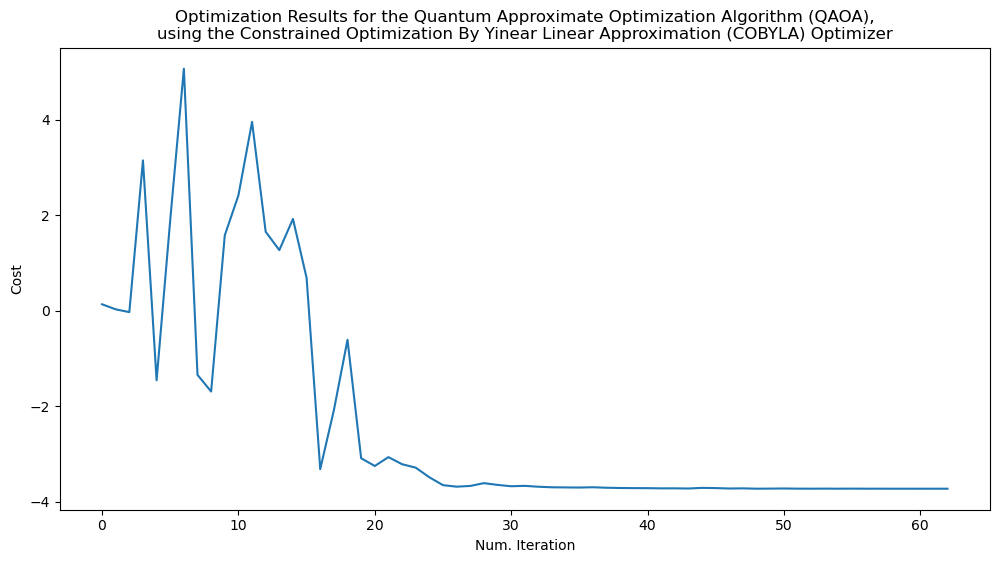

In [21]:
# Create a figure to plot the optimization results
# and Objective Function Values for the solved
# optimization problem for the (parameterized)
# Quantum Approximate Optimization Algorithm (QAOA)
# Ansatz Quantum Circuit model, using the Constrained
# Optimization By Yinear Linear Approximation (COBYLA) optimizer,
# evolving for each iteration of the optimization routine
plt.figure(figsize = (12, 6))

# Plot the optimization results
# and Objective Function Values for the solved
# optimization problem for the (parameterized)
# Quantum Approximate Optimization Algorithm (QAOA)
# Ansatz Quantum Circuit model, using the Constrained
# Optimization By Yinear Linear Approximation (COBYLA) optimizer,
# evolving for each iteration of the optimization routine
plt.plot(objective_func_vals)


# Define the title of the plot
plt.title("Optimization Results for the Quantum Approximate " + 
          "Optimization Algorithm (QAOA),\n" +\
          "using the Constrained Optimization By Yinear " +\
          "Linear Approximation (COBYLA) Optimizer")
          
# Define the label of the x-axis of the plot
plt.xlabel("Num. Iteration")

# Define the label of the y-axis of the plot
plt.ylabel("Cost")


# Show the plot of the optimization results
# and Objective Function Values for the solved
# optimization problem for the (parameterized)
# Quantum Approximate Optimization Algorithm (QAOA)
# Ansatz Quantum Circuit model, using the Constrained
# Optimization By Yinear Linear Approximation (COBYLA) optimizer,
# evolving for each iteration of the optimization routine
plt.show()

Nice! As you can see, our **Quantum Circuit** has trained quite well, converging to a **Cost Function Value** that should correspond to the **minimum energy** of the **cost** **Hamiltonian** representing our **Max-Cut Problem**.

But are we done yet? How can we be sure that this really is the **minimum energy**? And equally important, although we might have found the **minimum energy**, what **ground state** does it correspond to? Or in other words, what is the actual *solution* to the **Max-Cut Problem**?

## 2.4. Checking our Solution for the (parameterized) Quantum Approximate Optimization Algorithm (QAOA) Ansatz Quantum Circuit
<a id="checking-solution-parameterized-qaoa-ansatz-quantum-circuit"></a>

After training our **(parameterized) Quantum Approximate Optimization Algorithm (QAOA) Ansatz Quantum Circuit** using the **Estimator** primitive to obtain the **ground energy** of the **cost** **Hamiltonian**, we can obtain the **ground state** by using the **Sampler** primitive running the **Quantum Circuit** with the *optimized parameters* of the **(parameterized) Quantum Approximate Optimization Algorithm (QAOA) Ansatz Quantum Circuit**.

In [22]:
# Retrieve the parameters of the final
# optimization results and Objective Function Values
# for the solved optimization problem for the (parameterized)
# Quantum Approximate Optimization Algorithm (QAOA)
# Ansatz Quantum Circuit model
opt_params = result_qaoa.x

# Define the default number of shots for the Quantum Simulation
SHOTS = 10000

In [23]:
# Function to sample the counting (discrete) results of
# a Quantum Simulation of a given (parameterized) Quantum Circuit,
# a Backend, and optimized parameters for that Quantum Circuit
def sample_qaoa(opt_params, circuit, backend):

    # Define some options for the Quantum Simulation using the Sampler
    options = {"simulator": {"seed_simulator": seed}}
    
    # Define the Sampler for the Quantum Simulation
    # for the given Backend and respective options
    sampler = Sampler(mode = backend, options = options)
    
    
    # Submit the given (parameterized) Quantum Circuit
    # and respective optimized parameters to the Sampler
    # and execute it, retrieving the corresponding job
    job = sampler.run([(circuit, opt_params)], shots = SHOTS)
    
    # Get the results of the job
    # executed from the Sampler 
    results_sampler = job.result()
    
    
    # Retrieve the counting (discrete) results of
    # the job executed from the Sampler 
    counts_list = results_sampler[0].data.meas.get_counts()
    
    
    # Display the histogram plot with
    # the counting (discrete) results of
    # the job executed from the Sampler,
    # for the Max-Cut Problem
    display(plot_histogram(counts_list,
                           title = f"Max-Cut Problem - Sampling Results\n"
                                   f"(Outcomes from {backend.name} Backend)"))

    
    # Return the counting (discrete) results of
    # the job executed from the Sampler 
    return counts_list

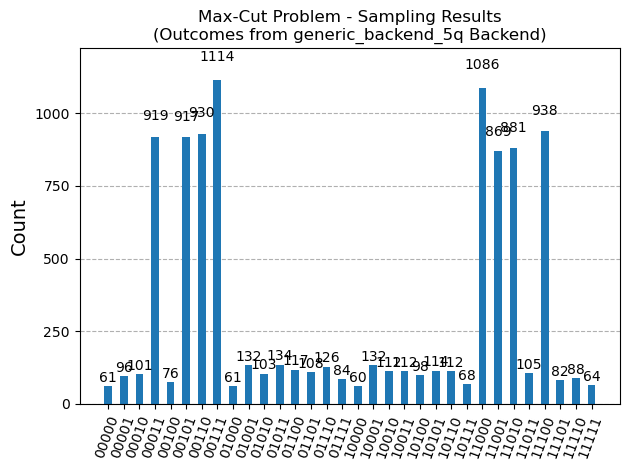

In [24]:
# Retrieve the counting (discrete) results of
# the Quantum Simulation of the (parameterized)
# Quantum Approximate Optimization Algorithm (QAOA)
# Ansatz Quantum Circuit model with the optimized parameters
counts_list = sample_qaoa(opt_params,
                          qaoa_ansatz_circuit_transpiled,
                          generic_backend)

It looks we have *8 different* **quantum states** with significant *higher probabilities* than the rest, which suggests there might be *8 different* **ground states**. But how can we check that? Luckily for us, this **Max-Cut Problem** is not very big in size, so it can still be solved analytically to help us discern if our *solution* is a *good* or *bad* *optimization approximation*. Let's take a look!

To solve this **Max-Cut Problem** analytically, we diagonalize the **cost** **Hamiltonian**. Note that this can be done because the size of the **Max-Cut Problem** is *not too large*.

However, the *complexity of this problem scales exponentially with the number of nodes (qubits)*, so the *problem becomes intractable for a large number of nodes*.

In [25]:
# Compute the eigenvalues and eigenvectors of
# the Cost Function of the Hamiltonian of the graph
# for the Max-Cut Problem defined previously
eigenvalues, eigenvectors = np.linalg.eig(cost_function_hamiltonian)


# Retrieve the real values of
# the minimum eigenvalues computed before from
# the Cost Function of the Hamiltonian of the graph
# for the Max-Cut Problem defined previously,
# as being the ground energy values
ground_energy = min(eigenvalues).real

# Retrieve the number of solutions of
# the Max-Cut Problem defined previously,
# by counting the eigenvalues corresponding
# to the ground energy values found
num_solutions = eigenvalues.tolist().count(ground_energy)

# Retrieve the indices of the solutions of
# the Max-Cut Problem defined previously,
# by counting the eigenvalues corresponding
# to the ground energy values found
index_solutions = np.where(eigenvalues == ground_energy)[0].tolist()

In [26]:
# Print the ground energy value of
# the Cost Function of the Hamiltonian of
# the graph for the Max-Cut Problem defined previously
print(f"The ground energy of the Hamiltonian is: {ground_energy}\n")

# Print the number of solutions of
# the Cost Function of the Hamiltonian of
# the graph for the Max-Cut Problem defined previously
print(f"The number of solutions of the problem is: {num_solutions}\n")

# Print the list of solutions based on their
# index from the Cost Function of the Hamiltonian of
# the graph for the Max-Cut Problem defined previously
print(f"The list of the solutions based on their index is: {index_solutions}")

The ground energy of the Hamiltonian is: -5.0

The number of solutions of the problem is: 8

The list of the solutions based on their index is: [3, 5, 6, 7, 24, 25, 26, 28]


Great! We obtained *8 solutions* as well, so let us now do some *post-processing* to check if the *8 possible solutions match with ours*.

In [27]:
# Function to convert a list of decimal values
# to their binary values representation
def decimal_to_binary(decimal_list, n):
    
    # Return the list of binary values representation of
    # the respective list of decimal values
    return [bin(num)[2:].zfill(n) for num in decimal_list]

In [28]:
# Convert the indices of the solutions found
# from a decimal representation to a binary representation,
# corresponding the quantum states solutions
states_solutions = decimal_to_binary(index_solutions, num_nodes)

# Sort the counting (discrete) results of
# the Quantum Simulation of the (parameterized)
# Quantum Approximate Optimization Algorithm (QAOA)
# Ansatz Quantum Circuit model with the optimized parameters,
# by their counts in the descending order
sorted_states = sorted(counts_list.items(),
                       key = lambda item: item[1], reverse = True)

# Retrieve the top quantum states
# from the counting (discrete) results of
# the Quantum Simulation of the (parameterized)
# Quantum Approximate Optimization Algorithm (QAOA)
# Ansatz Quantum Circuit model with the optimized parameters,
# according to the number of solutions found
top_states = sorted_states[:num_solutions]

# Retrieve only the quantum states
# from the top (solution) quantum states
# extracted from the counting (discrete) results of
# the Quantum Simulation of the (parameterized)
# Quantum Approximate Optimization Algorithm (QAOA)
# Ansatz Quantum Circuit model with the optimized parameters
qaoa_ground_states = sorted([state for state, count in top_states])

In [29]:
# Print the analytical solutions for the Max-Cut Problem
print(f"The analytical solutions for the Max-Cut Problem are:\n"
      f"- {states_solutions}")

# Print a blank line
print()

# Print the ground state solutions found for the Max-Cut Problem,
# using the Quantum Approximate Optimization Algorithm (QAOA)
print(f"The Quantum Approximate Optimization Algorithm (QAOA)'s\n"
      f"ground states solutions for the Max-Cut Problem are:\n"
      f"- {qaoa_ground_states}")

The analytical solutions for the Max-Cut Problem are:
- ['00011', '00101', '00110', '00111', '11000', '11001', '11010', '11100']

The Quantum Approximate Optimization Algorithm (QAOA)'s
ground states solutions for the Max-Cut Problem are:
- ['00011', '00101', '00110', '00111', '11000', '11001', '11010', '11100']


Hurray! We have successfully found the right solution of the **Max-Cut Problem** using **Quantum Approximate Optimization Algorithm (QAOA)**!

However, it is important to note that these results were obtained using ideal **Quantum Simulators**, which do not account for the **Quantum Noise** and *imperfections* present in **real** **Quantum Hardware**. In the next section, we will explore how **Quantum Approximate Optimization Algorithm (QAOA)** performs when executed on a **noisy** **Quantum Simulator**, which provides a practical view on how **quantum noise** affects our **Quantum Algorithms**.

***

# Chapter 3: The Max-Cut Problem in a Noisy Quantum Simulator
<a id="max-cut-problem-in-noisy-quantum-simulator"></a>

In this section, we will run the **Quantum Approximate Optimization Algorithm (QAOA)** on **noisy** **Quantum Simulators**. These **noisy** **Quantum Simulators** are *useful tools that aim to mimic the* **behaviour** *and* **quantum noise** *of* **real** **Quantum Processor Units (QPUs)**. They allow us to test and evaluate how our **Quantum Algorithms** could perform on actual **Quantum Hardware**, *without consuming valuable quantum resources*. Additionally, **noisy** **Quantum Simulators** *often run faster since they are executed locally on your machine*, *avoiding the potential delays and queues associated with cloud-based* **quantum devices**.

However, before we proceed, an important question arises. Which **quantum device** should I use? This is a key question that is sometimes overlooked. In the following, we will explore how to choose the most suitable **quantum device** (or **Quantum Simulator**) for running a specific **Quantum Algorithm**.

***

## 3.1. Choosing the Backend for the Quantum Simulation
<a id="choosing-backend-quantum-simulation"></a>

Here, we will introduce a **Quantum Backend** that corresponds to a **noisy** **Quantum Simulator** that mimics the **quantum noise** of a **quantum device**.

Let's see which **real** **Quantum Backends** are available for you.

In [30]:
# Retrieve the list of all the Backends
# available in the Qiskit's Runtime Service
# for the Qiskit Global Summer School 2025
backends_available = service.backends()


# Print the list of all the Backends
# available in the Qiskit's Runtime Service
# for the Qiskit Global Summer School 2025
print(f"The Backends currently available are:\n" +\
      f"- {backends_available[:2]}\n" +\
      f"  {backends_available[2:]}")

The Backends currently available are:
- [<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_torino')>]
  [<IBMBackend('ibm_sherbrooke')>]


In [31]:
# Print a log message about all the available
# Backends retrieved from the Qiskit's Runtime Service
# for the Qiskit Global Summer School 2025
print(f"\033[1m### All {len(backends_available)} Available Backends ###\033[0m")


# For each indexed available Backend
for i, backend in enumerate(backends_available):
    
    # Print a line separator
    print(f"-------------------------------------------------------------")
    
    
    # Print a header for the current Backend information
    print(f"  \033[1mBackend #{i + 1} Information:\033[0m")
    
    # Print the current Backend's name
    print(f"   * Backend's Name: {backend.name}")
    
    # Print the current Backend's version
    print(f"   * Backend's Version: {backend.backend_version}")

    # Print the current Backend's Num. Qubits
    print(f"   * Backend's Num. Qubits: {backend.num_qubits}")

    # Print the current Backend's Basis Gates
    print(f"   * Backend's Basis Gates: {backend.basis_gates}")

    # Print if the current Backend is local or not
    print(f"   * Is the Backend Local? {backend.local}")

    # Print if the current Backend is a Simulator or not
    print(f"   * Is the Backend a Simulator? {backend.simulator}")

    # Print if the current Backend supports Conditional Operations
    print(f"   * Does the Backend Support Conditional Operations? {backend.conditional}")

    # Print if the current Backend supports Open Pulse
    print(f"   * Does the Backend Support Open Pulse? {backend.open_pulse}")

    # Print if the current Backend supports Memory
    print(f"   * Does the Backend Support Memory? {backend.memory}")

    # Print the current Backend's Qubit Drive Channel Timestep
    print(f"   * Backend's Qubit Drive Channel Timestep: {backend.dt} ns")

    # Print the current Backend's Measurement Drive Channel Timestep
    print(f"   * Backend's Measurement Drive Channel Timestep: {backend.dtm} ns")
    
    
    # If the current Backend has Supported Measurement Kernels 
    if backend.meas_kernels:
        
        # Print the current Backend's Supported Measurement Kernels
        print(f"   * Backend's Supported Measurement Kernels: {backend.meas_kernels}")
    
    
    # If the current Backend has Supported Discriminators  
    if backend.discriminators:
          
        # Print the current Backend's Supported Discriminators
        print(f"   * Backend Supported Discriminators: {backend.discriminators[:1]}")
        print(f"                                       {backend.discriminators[1:2]}")
        print(f"                                       {backend.discriminators[2:]}")
    
    # Print the current Backend's Num. Register Slots Available
    print(f"   * Backend's Num. Register Slots Available: {backend.n_registers}")
    
    # Print if the current Backend Requires Credits
    print(f"   * Does the Backend Require Credits? {backend.credits_required}")
    
    # Print the current Backend's Initial Online Date
    print(f"   * Backend Online Since: {backend.online_date}")
    
    # Print the current Backend's QPU Processor Type (Family and Revision)
    print(f"   * Backend's QPU: {backend.processor_type['family']} " +\
          f"(Revision {backend.processor_type['revision']})")
    
    # Print a line separator
    print(f"-------------------------------------------------------------")    

### All 3 Available Backends ###
-------------------------------------------------------------
  Backend #1 Information:
   * Backend's Name: ibm_brisbane
   * Backend's Version: 1.1.150
   * Backend's Num. Qubits: 127
   * Backend's Basis Gates: ['ecr', 'id', 'rz', 'sx', 'x']
   * Is the Backend Local? False
   * Is the Backend a Simulator? False
   * Does the Backend Support Conditional Operations? False
   * Does the Backend Support Open Pulse? True
   * Does the Backend Support Memory? True
   * Backend's Qubit Drive Channel Timestep: 5e-10 ns
   * Backend's Measurement Drive Channel Timestep: 5e-10 ns
   * Backend's Supported Measurement Kernels: ['hw_qmfk']
   * Backend Supported Discriminators: ['linear_discriminator']
                                       ['hw_qmfk']
                                       ['quadratic_discriminator']
   * Backend's Num. Register Slots Available: 1
   * Does the Backend Require Credits? True
   * Backend Online Since: 2023-01-23 05:00:00+00:00
 

If you are using the **Open Plan** (*which is free*), you should have `ibm_brisbane`, `ibm_sherbrooke`, and `ibm_torino`. 

***

We can now create a **noisy** **Quantum Simulator** for each **Quantum Backend** you have access to, and see which *quantum gates* they have.

<div class="alert alert-block alert-warning">
<b>Real Quantum Backend Availability</b>

Depending on your account, you may have different backends available.
    
Use only 3 backends - if possible, use `ibm_brisbane', `ibm_sherbrooke', and `ibm_torino' - but if they are not available to you, feel free to use 3 different ones.

In [32]:
# Define the list of alternative Quantum Backends
# Note:
# - Feel free to comment/uncomment the following lines of codes
# alt_quantum_backends = [service.backend("alt_brisbane"),
#                         service.backend("alt_kawasaki"),
#                         service.backend("alt_torino")]

In [33]:
# Define the list of real Quantum Backends
real_backends = [service.backend("ibm_brisbane"),
                 service.backend("ibm_sherbrooke"),
                 service.backend("ibm_torino")]

In [34]:
# Create an empty list for the noisy
# Quantum Simulators (Fake Quantum Backends)
noisy_fake_backends = []


# For each real Quantum Backend
for real_backend in real_backends:
      
    # Retrieve the noisy Quantum Simulator (Fake Quantum Backend)
    # from the Aer Simulator according to the current real Quantum Backend
    noisy_fake_backends.append(AerSimulator.from_backend\
                               (real_backend, seed_simulator = seed))

In [35]:
# Print the list of noisy Quantum Simulators (Fake Quantum Backends)
print(f"The noisy Quantum Simulators (Fake Quantum Backends) are:\n"
      f"- {noisy_fake_backends[0]}\n"
      f"- {noisy_fake_backends[1]}\n"
      f"- {noisy_fake_backends[2]}\n")

The noisy Quantum Simulators (Fake Quantum Backends) are:
- AerSimulator('aer_simulator_from(ibm_brisbane)'
             noise_model=<NoiseModel on ['x', 'ecr', 'measure', 'reset', 'sx', 'id']>)
- AerSimulator('aer_simulator_from(ibm_sherbrooke)'
             noise_model=<NoiseModel on ['x', 'ecr', 'measure', 'reset', 'sx', 'id']>)
- AerSimulator('aer_simulator_from(ibm_torino)'
             noise_model=<NoiseModel on ['cz', 'x', 'measure', 'reset', 'sx', 'id']>)



***

Now, we transpile the **(parameterized) Quantum Approximate Optimization Algorithm (QAOA) Ansatz Quantum Circuit** to the different **noisy** **Quantum Simulators** (**Fake Quantum Backends**) and do a relatively simple analysis of their potential errors.

In the next exercise, you will *count the accumulated total error* of applying the different **Quantum Circuits** to the three **real** **Quantum Backends**.

We can do that using [`backend.properties()`](https://quantum.cloud.ibm.com/docs/en/guides/get-qpu-information#dynamic-backend-information), [`circuit.data`](https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.QuantumCircuit) and [`backend.configuration()`](https://quantum.cloud.ibm.com/docs/api/qiskit/qiskit.circuit.QuantumCircuit), as they will provide us with the required information to account for the various *errors introduced by each instruction*.

***

<a id="exercise-3"></a>
<div class="alert alert-block alert-success">
    
<b>Exercise 3: Error Counting </b> 

**Your Goal:** Estimate the *total error* of the **Quantum Circuit**. 

In this third exercise you will *estimate* the *total error* introduced by all the instructions when executing **Quantum Circuits** on different **noisy** **Quantum Simulators** (**Fake Quantum Backends**) by completing the `accululated_errors` function.
    
<br> 
    
In particular, you will account for the *errors* introduced by:

- **Single-Qubit Gates:**
    * Depending on the **Fake Quantum Backend**, these may include `rz`, `x`, or `sx`, and you will have to access each instruction name;
<br><br>
- **Two-Qubit Gates:**
    * Depending on the **Fake Quantum Backend**, these may include `cz`, `cx`, or `ecr` gates;
    * You will need to identify which *quantum gate* is used on each **Fake Quantum Backend**;
<br><br>
- **Readout Errors:**
    * These contribute a constant error added at the end of the *total accumulated error*, only on the physical qubits where your **Quantum Circuit** is *transpiled*;

<br>

Keep in mind that each qubit has *different error rates*, so *you cannot simply count all operations and multiply by average error values* you see on the **Compute Resources Page** on **IBM Quantum Platform**.

<br>

While this approximation might yield similar results, the goal of this exercise is to teach you how to access detailed **Quantum Backend**'s information and *perform a more accurate estimation of the specific error rates per qubit*.

Also, *do not count the* **Measurement Gates** as **Single-Qubit Gates**, as *their error is already included in the* **Readout Error**.
</div>

In [36]:
# Function to compute the accumulated total errors of
# Single-Qubit Gates, Two-Qubit Gates, and Readout,
# as well as their quantum gates count for a given
# Quantum Circuit on a specific Quantum Backend
def compute_accumulated_gate_errors_and_counts(backend: QiskitRuntimeService.backend,
                                               circuit: QuantumCircuit) -> list:
    
    # Initialize the accumulated Single-Qubit Gate Error rate
    acc_single_qubit_error = 0
    
    # Initialize the accumulated Two-Qubit Gate Error rate
    acc_two_qubit_error = 0
    
    # Initialize the Single-Qubit Gate count
    single_qubit_gate_count = 0
    
    # Initialize the Two-Qubit Gate count
    two_qubit_gate_count = 0
    
    # Initialize the accumulated Readout Error rate
    acc_readout_error = 0

    
    # Retrieving the properties of the given Quantum Backend
    backend_properties = backend.properties()
    
    # Retrieve the qubits' layout
    # for the given Quantum Circuit,
    # considering their physical qubits
    qubits_layout = list(circuit.layout.initial_layout\
                        .get_physical_bits().keys())[:num_nodes]

    
    ### WRITE YOUR CODE BELOW HERE ###
    
    # Task 3/Step 3 - Define the following accumulated
    #                 gate error rates and gate counts:
    # - acc_single_qubit_error (accumulated Single-Qubit Gate Error rate);
    # - acc_two_qubit_error (accumulated Two-Qubit Gate Error rate);
    # - acc_readout_error (accumulated Readout Error rate);
    # - acc_total_error (accumulated total error rate);
    # - single_qubit_gate_count (Single-Qubit Gate count);
    # - two_qubit_gate_count (Two-Qubit Gate count);

    
    # Hint:
    # * Retrieve the Readout Error rate
    #   (only for qubits in qubit_layout)
    #   using `backend_properties.readout_error()`
    
    
    # For each qubit in the qubits'
    # layout for the given Quantum Circuit,
    # considering their physical qubits
    for q in qubits_layout:
        
        # Sum the Readout Error rate for the current qubit
        # in the qubits' layout for the given Quantum Circuit,
        # considering their physical qubits
        acc_readout_error += backend_properties.readout_error(q)

        
    # Hint:
    # * Retrieve the Two-Qubit Gate Error rates
    #   for the different Quantum Backends
    #   using `backend.configuration()`
    # * Each Quantum Backend is calibrated with
    #   and uses only one Two-Qubit (Basis) Gate
    
    
    # Retrieve list of Basis Gates
    # for the given Quantum Backend
    backend_basis_gates = backend.configuration().basis_gates
    
    
    # If the Echoed Cross-Resonance (ECR) gate
    # is the Two-Qubit (Basis) Gate that calibrates
    # and it is used by the given Quantum Backend
    if "ecr" in (backend_basis_gates):
        
        # Define the Two-Qubit (Basis) Gate that calibrates
        # and it is used by the given Quantum Backend as
        # being the Echoed Cross-Resonance (ECR) gate
        two_qubit_gate = "ecr"
        
    # If the Controlled-Pauli-Z (CZ) gate
    # is the Two-Qubit (Basis) Gate that calibrates
    # and it is used by the given Quantum Backend
    elif "cz" in (backend_basis_gates):
        
        # Define the Two-Qubit (Basis) Gate that calibrates
        # and it is used by the given Quantum Backend as
        # being the Controlled-Pauli-Z (CZ) gate
        two_qubit_gate = "cz"
        
    # If the Controlled-Pauli-X (CX) gate
    # is the Two-Qubit (Basis) Gate that calibrates
    # and it is used by the given Quantum Backend
    # 
    # Note:
    # - Usually, the IBM's Quantum Backends
    #   do not use the Controlled-Pauli-X (CX) gate
    #   as the Two-Qubit (Basis) Gate
    elif "cx" in (backend_basis_gates):
        
        # Define the Two-Qubit (Basis) Gate that calibrates
        # and it is used by the given Quantum Backend as
        # being the Controlled-Pauli-X (CX) gate
        two_qubit_gate = "cx"
        
    
    # For each quantum instruction in `circuit.data` in order to account
    # for the single and two-qubit errors and single and two qubit gate counts
    for instruction in circuit.data:
        
        # If the current quantum instruction is a Single-Qubit Gate
        # (namely, Pauli-X, Sqrt(Pauli-X), and Rotate-Z gates)
        if instruction.name in ["x", "sx", "rz"]:
            
            # Retrieve the (physical) qubit index
            # for the current quantum instruction
            qubit_index = circuit.find_bit(instruction.qubits[0]).index
            
            # Sum the current Single-Qubit Error rate to
            # the accumulated Single-Qubit Gate Error rate
            acc_single_qubit_error += backend_properties.gate_error(instruction.name,
                                                                    qubit_index)
            
            # Increment the Single-Qubit Gate count
            single_qubit_gate_count += 1
        
        # If the current quantum instruction is a Two-Qubit Gate
        # (namely, Echoed Cross-Resonance, Controlled-Pauli-Z (CZ),
        #  or Controlled-Pauli-X (CX) gates)
        elif instruction.name == two_qubit_gate:
            
            # Create an empty list for the (physical) qubit
            # indices for the current quantum instruction 
            qubits_indices = []
            
            # Retrieve the first (physical) qubit index
            # for the current quantum instruction
            qubits_indices.append(circuit.find_bit(instruction.qubits[0]).index)

            # Retrieve the second (physical) qubit index
            # for the current quantum instruction
            qubits_indices.append(circuit.find_bit(instruction.qubits[1]).index)
            
            # Sum the current Two-Qubit Error rate to
            # the accumulated Two-Qubit Gate Error rate
            acc_two_qubit_error += backend_properties.gate_error(instruction.name,
                                                                 qubits_indices)
            
            # Increment the Two-Qubit Gate count
            two_qubit_gate_count += 1
            
    ### YOUR CODE FINISHES HERE    ###

    
    # Compute the accumulated total error rate
    acc_total_error = acc_single_qubit_error + \
                      acc_two_qubit_error + \
                      acc_readout_error
    
    
    # Define the list of results with the corresponding
    # accumulated gate error rates and gate counts
    results = [acc_total_error,
               acc_two_qubit_error,
               acc_single_qubit_error,
               acc_readout_error,
               single_qubit_gate_count,
               two_qubit_gate_count]
    
    
    # Return the list of results with the corresponding
    # accumulated gate error rates and gate counts
    return results

Now, generate `errors_and_counts_list[]` and pass it to the **Qiskit Global Summer School 2025's Grader**.

In [37]:
# Create an empty list for the transpiled
# (parameterized) Quantum Approximate Optimization
# Algorithm (QAOA) Ansatz Quantum Circuit 
qaoa_circuits_transpiled_list = []

# Create an empty list for the accumulated total errors of
# Single-Qubit Gates, Two-Qubit Gates, and Readout,
# as well as their quantum gates count for a given
# Quantum Circuit on a specific Quantum Backend
errors_and_counts_list = []

In [38]:
# For each noisy Quantum Simulator (Fake Quantum Backend)
for noisy_fake_backend in noisy_fake_backends:
    
    # Create the Pass Manager for the transpilation of
    # the (parameterized) Quantum Approximate Optimization
    # Algorithm (QAOA) Ansatz Quantum Circuit
    # for the Backend defined before and
    # with some optimization settings
    pass_manager = generate_preset_pass_manager\
                   (backend = noisy_fake_backend,
                    optimization_level = 3,
                    seed_transpiler = seed)
    
    # Run and retrieve the (parameterized) Quantum Approximate
    # Optimization Algorithm (QAOA) Ansatz Quantum Circuit transpiled
    qaoa_ansatz_transpiled_circuit = pass_manager.run(qaoa_ansatz_circuit)
    
    # Append the current (parameterized) Quantum Approximate
    # Optimization Algorithm (QAOA) Ansatz Quantum Circuit transpiled
    # for the current noisy Quantum Simulator (Fake Quantum Backend)
    qaoa_circuits_transpiled_list.append(qaoa_ansatz_transpiled_circuit)
    
    # Compute the accumulated total errors of
    # Single-Qubit Gates, Two-Qubit Gates, and Readout,
    # as well as their quantum gates count for a given
    # Quantum Circuit on a specific Quantum Backend
    errors_and_counts = compute_accumulated_gate_errors_and_counts\
                        (noisy_fake_backend,
                         qaoa_ansatz_transpiled_circuit)
    
    # Append the accumulated total errors of
    # Single-Qubit Gates, Two-Qubit Gates, and Readout,
    # as well as their quantum gates count for a given
    # Quantum Circuit on a specific Quantum Backend
    # to the respective list
    errors_and_counts_list.append(errors_and_counts)

In [39]:
# For each noisy Quantum Simulator (Fake Quantum Backend) and
# respective accumulated total errors of Single-Qubit Gates,
# Two-Qubit Gates, and Readout, as well as their quantum gates count
for noisy_fake_backend,\
    (acc_total_error, acc_two_qubit_error, acc_single_qubit_error,
     acc_readout_error, single_qubit_gate_count, two_qubit_gate_count) \
in zip(noisy_fake_backends, errors_and_counts_list):

    # Print the name of the current
    # noisy Quantum Simulator (Fake Quantum Backend)
    print(f"\033[1mNoisy Quantum Simulator (Fake Quantum Backend):\033[0m\n"
          f"\033[1m- {noisy_fake_backend.name}\033[0m\n\n")
    
    
    # Print the accumulated Single-Qubit Error rate for
    # the current noisy Quantum Simulator (Fake Quantum Backend)
    print(f"Accumulated Single-Qubit Error Rate of {single_qubit_gate_count} Gates: "
          f"{acc_single_qubit_error:.3f}\n")
    
    # Print the accumulated Two-Qubit Error rate for
    # the current noisy Quantum Simulator (Fake Quantum Backend)
    print(f"Accumulated Two-Qubit Error Rate of {two_qubit_gate_count} Gates: "
          f"{acc_two_qubit_error:.3f}\n")
    
    # Print the accumulated Two-Qubit Error rate for
    # the current noisy Quantum Simulator (Fake Quantum Backend) 
    print(f"Accumulated Readout Error Rate: {acc_readout_error:.3f}\n")
    
    # Print the accumulated Total Error rate for
    # the current noisy Quantum Simulator (Fake Quantum Backend) 
    print(f"Accumulated Total Error Rate: "
          f"{acc_total_error:.3f}\n")
    
    
    # Print a line separator
    print("\033[1m----------------------------------------------------\033[0m\n")

Noisy Quantum Simulator (Fake Quantum Backend):
- aer_simulator_from(ibm_brisbane)


Accumulated Single-Qubit Error Rate of 448 Gates: 0.029

Accumulated Two-Qubit Error Rate of 70 Gates: 0.268

Accumulated Readout Error Rate: 0.082

Accumulated Total Error Rate: 0.379

----------------------------------------------------

Noisy Quantum Simulator (Fake Quantum Backend):
- aer_simulator_from(ibm_sherbrooke)


Accumulated Single-Qubit Error Rate of 453 Gates: 0.027

Accumulated Two-Qubit Error Rate of 70 Gates: 0.278

Accumulated Readout Error Rate: 0.094

Accumulated Total Error Rate: 0.398

----------------------------------------------------

Noisy Quantum Simulator (Fake Quantum Backend):
- aer_simulator_from(ibm_torino)


Accumulated Single-Qubit Error Rate of 250 Gates: 0.025

Accumulated Two-Qubit Error Rate of 70 Gates: 0.126

Accumulated Readout Error Rate: 0.138

Accumulated Total Error Rate: 0.289

----------------------------------------------------



Let's plot the results.

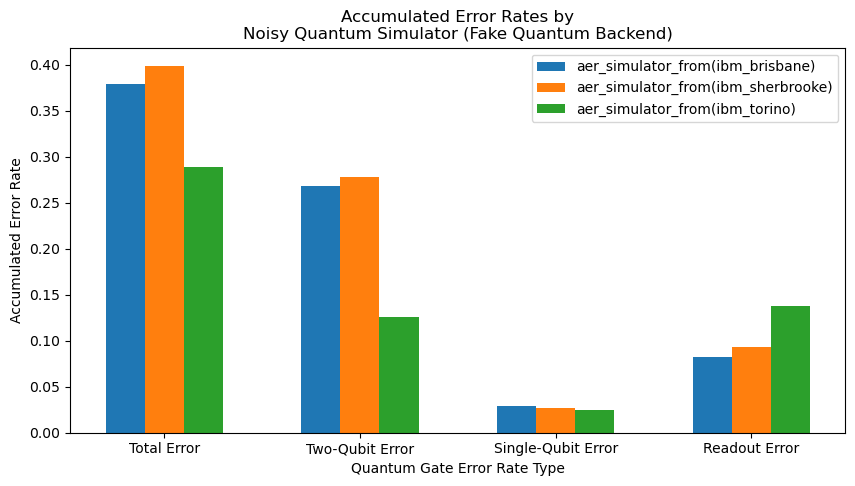

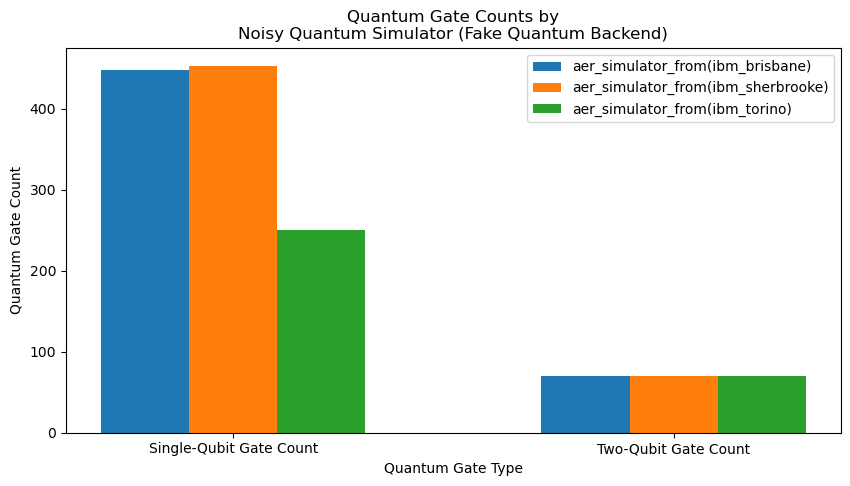

In [40]:
# Plot the quantum gates' error rates and
# quantum gate counts of a Quantum Circuit executed
# in several noisy Quantum Simulators (Fake Quantum Backends)
plot_backend_errors_and_counts(noisy_fake_backends, errors_and_counts_list)

In [41]:
# Submit your answer for the exercise 3 of the lab 2,
# using the following code from the Grader
grade_lab2_ex3(compute_accumulated_gate_errors_and_counts)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


We have seen that `ibm_torino` has a **smaller** **accumulated quantum error** than the other **noisy** **Quantum Simulators** (**Fake Quantum Backends**). Let's put these results into practice by running the whole **Quantum Approximate Optimization Algorithm (QAOA)** with the different **noisy** **Quantum Simulators** (**Fake Quantum Backends**)!

***

<div class="alert alert-block alert-warning">
<b>Warning: 2 minutes needed - Do not skip!</b>

Running the following code will take approximately *2 minutes to execute*, and will block this **Jupyter Notebook** during that time.
</div>

In [42]:
# Create an empty list for the optimization parameters
opt_params_list = []

# Create an empty list for the counting (discrete)
# results of a Quantum Simulation of the (parameterized)
# Quantum Approximate Optimization Algorithm (QAOA)
# Ansatz Quantum Circuit using a noisy Quantum Simulator
# (Fake Quantum Backend), and the optimized parameters
counts_list_backends = []

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -2.9120608793912064
       x: [ 1.213e+00  1.303e+00  6.710e-02  9.837e-01]
    nfev: 78
   maxcv: 0.0


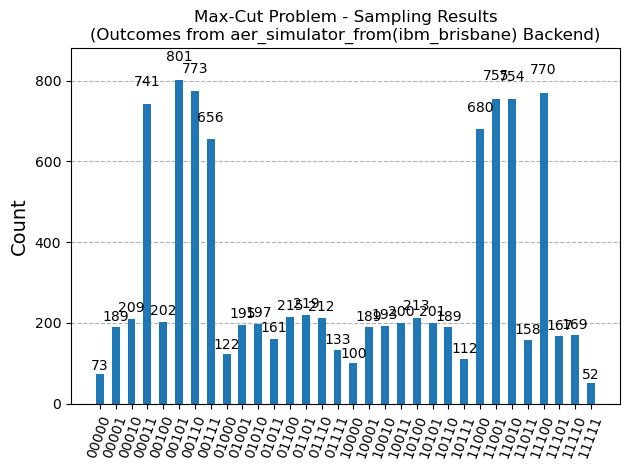

In [43]:
# For each noisy Quantum Simulator (Fake Quantum Backend),
# and respective transpiled (parameterized) Quantum Approximate
# Optimization Algorithm (QAOA) Ansatz Quantum Circuits,
# but considering only the first one Quantum Backend
for noisy_fake_backend, circuit in\
    zip(noisy_fake_backends[:1], qaoa_circuits_transpiled_list[:1]):
    
    # Optimize the (parameterized) Quantum Approximate
    # Optimization Algorithm (QAOA) Ansatz Quantum Circuit model,
    # using the Constrained Optimization By Yinear Linear Approximation
    # (COBYLA) optimizer and an estimator on the current
    # noisy Quantum Simulator (Fake Quantum Backend)
    result_backend, _ = train_qaoa(init_params, circuit,
                                   cost_function_hamiltonian,
                                   noisy_fake_backend)
    
    
    # Retrieve the optimization parameters
    # for the (parameterized) Quantum Approximate
    # Optimization Algorithm (QAOA) Ansatz Quantum Circuit model,
    # using the Constrained Optimization By Yinear
    # Linear Approximation (COBYLA) optimizer
    opt_params = result_backend.x
    
    # Append the optimization parameters
    # for the (parameterized) Quantum Approximate
    # Optimization Algorithm (QAOA) Ansatz Quantum Circuit model,
    # using the Constrained Optimization By Yinear
    # Linear Approximation (COBYLA) optimizer to
    # the respective list of optimization parameters
    opt_params_list.append(opt_params)
    
    
    # Sample the counting (discrete) results of
    # a Quantum Simulation of the (parameterized)
    # Quantum Approximate Optimization Algorithm (QAOA)
    # Ansatz Quantum Circuit using a noisy Quantum Simulator
    # (Fake Quantum Backend), and the optimized parameters
    counts_list_backend = sample_qaoa(opt_params, circuit,
                                      noisy_fake_backend)
    
    # Append the counting (discrete) results of
    # a Quantum Simulation of the (parameterized)
    # Quantum Approximate Optimization Algorithm (QAOA)
    # Ansatz Quantum Circuit using a noisy Quantum Simulator
    # (Fake Quantum Backend), and the optimized parameters
    counts_list_backends.append(counts_list_backend)

***

<div class="alert alert-block alert-warning">
<b>Warning: 8 minutes needed</b>

Running the following code will take approximately *8 minutes to execute*, and will block this **Jupyter Notebook** during that time. 

If you want to skip this cell, go directly to [**Chapter 4**](#transpiler).

</div>

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -3.3468165318346816
       x: [-3.943e-01  1.390e+00  8.898e-01  1.798e-01]
    nfev: 76
   maxcv: 0.0


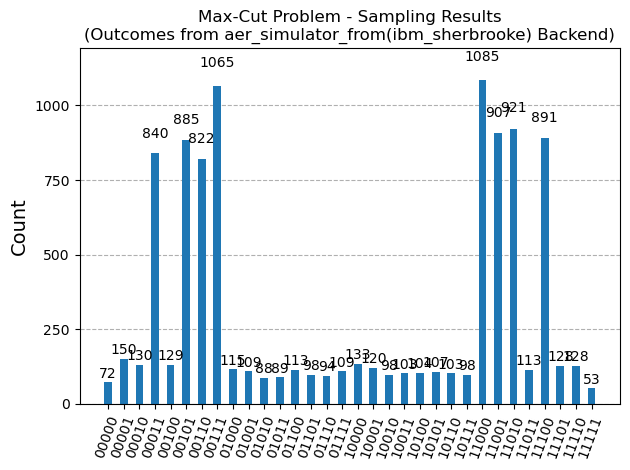

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -3.2706772932270676
       x: [ 1.114e+00  1.807e-01  8.594e-01 -1.751e-01]
    nfev: 66
   maxcv: 0.0


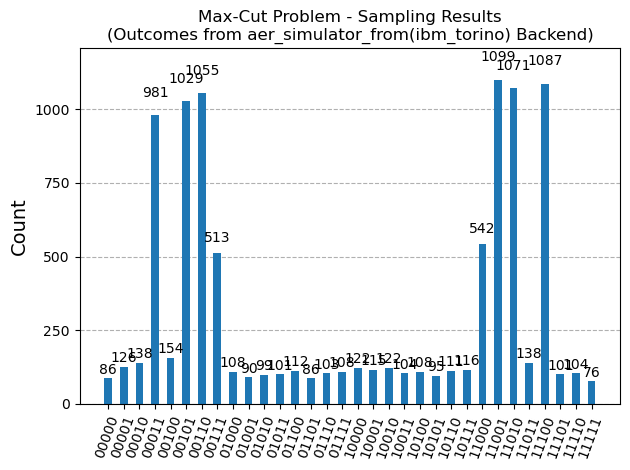

In [44]:
# For each noisy Quantum Simulator (Fake Quantum Backend),
# and respective transpiled (parameterized) Quantum Approximate
# Optimization Algorithm (QAOA) Ansatz Quantum Circuits,
# but considering the remaining Quantum Backends
# rather than the first one Quantum Backend
for noisy_fake_backend, circuit in \
    zip(noisy_fake_backends[1:], qaoa_circuits_transpiled_list[1:]):
    
    # Optimize the (parameterized) Quantum Approximate
    # Optimization Algorithm (QAOA) Ansatz Quantum Circuit model,
    # using the Constrained Optimization By Yinear Linear Approximation
    # (COBYLA) optimizer and an estimator on the current
    # noisy Quantum Simulator (Fake Quantum Backend)
    result_backend, _ = train_qaoa(init_params, circuit,
                                   cost_function_hamiltonian,
                                   noisy_fake_backend)
    
    
    # Retrieve the optimization parameters
    # for the (parameterized) Quantum Approximate
    # Optimization Algorithm (QAOA) Ansatz Quantum Circuit model,
    # using the Constrained Optimization By Yinear
    # Linear Approximation (COBYLA) optimizer
    opt_params = result_backend.x
    
    # Append the optimization parameters
    # for the (parameterized) Quantum Approximate
    # Optimization Algorithm (QAOA) Ansatz Quantum Circuit model,
    # using the Constrained Optimization By Yinear
    # Linear Approximation (COBYLA) optimizer to
    # the respective list of optimization parameters
    opt_params_list.append(opt_params)
    
    
    # Sample the counting (discrete) results of
    # a Quantum Simulation of the (parameterized)
    # Quantum Approximate Optimization Algorithm (QAOA)
    # Ansatz Quantum Circuit using a noisy Quantum Simulator
    # (Fake Quantum Backend), and the optimized parameters
    counts_list_backend = sample_qaoa(opt_params, circuit,
                                      noisy_fake_backend)
    
    # Append the counting (discrete) results of
    # a Quantum Simulation of the (parameterized)
    # Quantum Approximate Optimization Algorithm (QAOA)
    # Ansatz Quantum Circuit using a noisy Quantum Simulator
    # (Fake Quantum Backend), and the optimized parameters
    counts_list_backends.append(counts_list_backend)

***

It appears that the three **Quantum Backends** give the correct result. However, it looks like the `ibm_torino` backend presents lower noise levels, since *the probabilities of measuring a* **quantum state** *that is not a solution are lower*.

At this point, *we can define a metric based on the probability of measuring a correct solution to compare backend performance*. *Since all three* **Quantum Backends** *have predicted the same 8 solutions as the most probable outcomes, this metric provides a useful way to identify which backend is more reliable in practice*.

In [45]:
# For each noisy Quantum Simulator (Fake Quantum Backend),
# and respective counting (discrete) results of
# the Quantum Simulation of the (parameterized)
# Quantum Approximate Optimization Algorithm (QAOA)
# Ansatz Quantum Circuit performed on it
for noisy_fake_backend, counts_list_backend \
in zip(noisy_fake_backends, counts_list_backends):

    # Retrieve the counting (discrete) results of
    # the Quantum Simulation of the (parameterized)
    # Quantum Approximate Optimization Algorithm (QAOA)
    # Ansatz Quantum Circuit in the current noisy
    # Quantum Simulator (Fake Quantum Backend),
    # considering only the solution quantum states
    solutions_counts = [counts_list_backend[key] for key in states_solutions]

    # Print the probability of measuring a quantum state
    # solution from the counting (discrete) results of
    # the Quantum Simulation of the (parameterized)
    # Quantum Approximate Optimization Algorithm (QAOA)
    # Ansatz Quantum Circuit in the current noisy
    # Quantum Simulator (Fake Quantum Backend)
    print(f"Probability of Measuring a Quantum State Solution\n"
          f"for {noisy_fake_backend.name} is equal to:\n"
          f"- {float(sum(solutions_counts) / SHOTS)} "
          f"({float(sum(solutions_counts) / SHOTS) * 100:.2f}%)")
    
    # Print a separator line
    print("\n-----------------------------------------------------\n")

Probability of Measuring a Quantum State Solution
for aer_simulator_from(ibm_brisbane) is equal to:
- 0.593 (59.30%)

-----------------------------------------------------

Probability of Measuring a Quantum State Solution
for aer_simulator_from(ibm_sherbrooke) is equal to:
- 0.7416 (74.16%)

-----------------------------------------------------

Probability of Measuring a Quantum State Solution
for aer_simulator_from(ibm_torino) is equal to:
- 0.7377 (73.77%)

-----------------------------------------------------



As expected, `ibm_torino` *provides us with the highest probability of measuring a solution*. This confirms that our earlier error estimation analysis was correct in predicting *which* **Quantum Backend** *would execute the* **Quantum Algorithm** *with minimum errors*. To further understand the impact of **Quantum Noise**, we can also compare these probabilities to that of the `GenericBackend`, *which simulates an ideal, noise-free scenario*.

In [46]:
# Retrieve the counting (discrete) results of
# the Quantum Simulation of the (parameterized)
# Quantum Approximate Optimization Algorithm (QAOA)
# Ansatz Quantum Circuit in a noiseless Quantum Backend,
# considering only the solution quantum states
solutions_counts_noiseless = [counts_list[key] for key in states_solutions]

# Print the probability of measuring a quantum state
# solution from the counting (discrete) results of
# the Quantum Simulation of the (parameterized)
# Quantum Approximate Optimization Algorithm (QAOA)
# Ansatz Quantum Circuit in a noiseless Quantum Backend
print(f"Probability of Measuring a Quantum State Solution\n"
      f"for {generic_backend.name} is equal to:\n"
      f"- {float(sum(solutions_counts_noiseless) / SHOTS)} "
      f"({float(sum(solutions_counts_noiseless) / SHOTS) * 100:.2f}%)")

Probability of Measuring a Quantum State Solution
for generic_backend_5q is equal to:
- 0.7654 (76.54%)


*The probability of measuring a correct solution on the noise-free `GenericBackend` is, as expected, higher than on the* **noisy Quantum Simulators (Fake Quantum Backends)**. *However, the difference is not that big*. This highlights an important point. Even with current **noisy** **Quantum Computers**, as long as we are careful and smart in our **Quantum Circuit** design and use the right tools, *we can still solve many problems with a good degree of accuracy*!

***

## 3.2. Estimating Quantum Errors using Noisy Estimator Analyzer Tool (NEAT)
<a id="estimating-quantum-errors-using-neat"></a>

The **Quantum Error** estimation we have done above is a *nice approximation of how noisy a device is going to be*. **Qiskit** offers us another alternative, the **Noisy Estimator Analyzer Tool (NEAT)**. **NEAT** is a function designed to help users understand and predict the performance of **quantum estimation**'s tasks, particularly when using the **Estimator** primitive. It leverages the `qiskit-aer` **simulator** to perform *both ideal (noiseless) and noisy simulations of* **Quantum Circuits**. 

A key feature of **NEAT** is its ability to simulate **Clifford** **Quantum Circuits** efficiently. For **non-Clifford** **Quantum Circuits**, **NEAT** can automatically convert them to their nearest **Clifford** equivalents that approximate their **quantum state**. This makes **NEAT** especially useful for performing a **quantum noise analysis** of our **Quantum Circuits** before running them on **real** **Quantum Hardware**. However, this approximation introduces limitations, since **Clifford** equivalents do not perfectly replicate the behavior of **non-Clifford** **Quantum Circuits**, and therefore the **Quantum Simulation** may lose accuracy in certain cases.

From a practical point of view, one way to use **NEAT** is to simulate a **Quantum Circuit** in a *noisy* and *noiseless* *scenario* measuring an observable whose *expectation value is exactly 1 in the ideal (noiseless) case*. In this setup, *any deviation from 1 in the noisy simulation directly reflects the impact of noise on the* **Quantum Circuit**.

<br>

An easy way to ensure that the observable meets the requirements is choosing:
$$
\hat{O}=|\psi\rangle\langle \psi|, \quad \textrm{since} \quad \langle \psi |\hat{O}|\psi \rangle=1
$$

Here, $|\psi\rangle$ is the **quantum state** generated by the **Quantum Circuit** we want to simulate. 

<br>

Let's apply **NEAT** to our different **noisy** **Quantum Backends** to see how they perform.

In [47]:
# Create an empty list for the noiseless and noisy
# Quantum Simulations of the Quantum Approximate
# Optimization Algorithm (QAOA) Ansatz Quantum Circuit
results = []

In [48]:
# For each noisy Quantum Simulator
# (Fake Quantum Backend), and respective
# optimized parameters for the Quantum Simulation of
# the (parameterized) Quantum Approximate Optimization
# Algorithm (QAOA) Ansatz Quantum Circuit performed on it
for noisy_fake_backend, opt_params \
in zip(noisy_fake_backends, opt_params_list):

    # Print an informative message
    # about the current Fake Quantum Backend 
    print(f"\n\033[1mRunning on Fake Quantum Backend: "
          f"{noisy_fake_backend.name}\033[0m\n")

    # Prepare the (parameterized) Quantum Approximate
    # Optimization Algorithm (QAOA) Ansatz Quantum Circuit
    # for the Noisy Estimator Analyzer Tool (NEAT)
    qaoa_neat = QAOAAnsatz(cost_operator = cost_function_hamiltonian,
                           reps = num_layers)
    
    # Assign the optimized parameters to
    # the (parameterized) Quantum Approximate
    # Optimization Algorithm (QAOA) Ansatz Quantum Circuit
    qc = qaoa_neat.assign_parameters(opt_params)

    # Transpile the Quantum Circuit for the Quantum Simulation
    # using the Pass Manager for the transpilation of the (parameterized)
    # Quantum Approximate Optimization Algorithm (QAOA) Ansatz
    # Quantum Circuit for the Backend defined before
    # and with some optimization settings
    qc_transpiled = generate_preset_pass_manager\
                    (optimization_level = 3,
                     basis_gates = backend.configuration().basis_gates[:num_nodes],
                     seed_transpiler = seed).run(qc)
    
    # Define the Observable for Cliffordization
    # as being the Cost Function Hamiltonian
    obs = cost_function_hamiltonian
    
    # Create the Noisy Estimator Analyzer Tool (NEAT)
    # for the current noisy Quantum Simulator (Fake Quantum Backend)
    analyzer = Neat(noisy_fake_backend)
    
    # Cliffordize the previous transpiled
    # (parameterized) Quantum Approximate
    # Optimization Algorithm (QAOA) Ansatz
    # Quantum Circuit
    clifford_pub = analyzer.to_clifford([(qc_transpiled, obs)])[0]

    # Build the Clifford Quantum Circuit
    # from the transpiled (parameterized) Quantum Approximate
    # Optimization Algorithm (QAOA) Ansatz Quantum Circuit
    state_clifford = Statevector.from_instruction(clifford_pub.circuit)
    
    # Build the Observables from the Cliffordized Version of
    # the transpiled (parameterized) Quantum Approximate
    # Optimization Algorithm (QAOA) Ansatz Quantum Circuit
    obs_clifford = SparsePauliOp.from_operator\
                   (Operator(DensityMatrix(state_clifford).data))

    # Create the Pass Manager for the transpilation of
    # the Cliffordized Version of the transpiled (parameterized)
    # Quantum Approximate Optimization Algorithm (QAOA) Ansatz
    # Quantum Circuit for the Backend defined before
    # and with some optimization settings
    pass_manager = generate_preset_pass_manager(backend = noisy_fake_backend,
                                                optimization_level = 1,
                                                seed_transpiler = seed)
    
    # Transpile the Cliffordized Version of
    # the transpiled (parameterized) Quantum Approximate
    # Optimization Algorithm (QAOA) Ansatz Quantum Circuit
    isa_qc = pass_manager.run(clifford_pub.circuit)
    
    # Apply the layout of the transpiled Cliffordized Version of
    # the transpiled (parameterized) Quantum Approximate
    # Optimization Algorithm (QAOA) Ansatz Quantum Circuit,
    # retrieving the respective Clifford Observables
    isa_obs = obs_clifford.apply_layout(isa_qc.layout)

    
    # Prepare the Primitive Unified Blocks (PUBs)
    # for the Quantum Simulation  on the current
    # noisy Quantum Simulator (Fake Quantum Backend),
    # using the Noisy Estimator Analyzer Tool (NEAT)
    pubs = [(isa_qc, isa_obs)]
    
    
    # Compute the ideal (noiseless) results for the Quantum Simulation
    # on the current noisy Quantum Simulator (Fake Quantum Backend),
    # using the Noisy Estimator Analyzer Tool (NEAT)
    noiseless_results = (analyzer.ideal_sim(pubs, cliffordize = True,
                                            seed_simulator = seed)\
                         ._pub_results[0].vals)
    
    
    # Compute the noisy results for the Quantum Simulation
    # on the current noisy Quantum Simulator (Fake Quantum Backend),
    # using the Noisy Estimator Analyzer Tool (NEAT)
    noisy_results = (analyzer.noisy_sim(pubs, cliffordize = True,
                                        seed_simulator = seed)\
                     ._pub_results[0].vals)

    
    # Store the ideal (noiseless) and noisy results
    # for the Quantum Simulation on the current
    # noisy Quantum Simulator (Fake Quantum Backend)
    results.append({"backend": noisy_fake_backend.name,
                    "noiseless": noiseless_results,
                    "noisy": noisy_results})
    
    
    # Print the ideal (noiseless) results for the Quantum Simulation on
    # the current noisy Quantum Simulator (Fake Quantum Backend)
    print(f"Ideal (Noiseless) Results on {noisy_fake_backend.name}:\n"
          f"- {noiseless_results:.3f}\n")
    
    # Print the noisy results for the Quantum Simulation on
    # the current noisy Quantum Simulator (Fake Quantum Backend)
    print(f"Noisy Results on {noisy_fake_backend.name}:\n"
          f"- {noisy_results:.3f}")
    
    
    # Print a line separator
    print("\n---------------------------------------------------------------\n")


Running on Fake Quantum Backend: aer_simulator_from(ibm_brisbane)

Ideal (Noiseless) Results on aer_simulator_from(ibm_brisbane):
- 1.000

Noisy Results on aer_simulator_from(ibm_brisbane):
- 0.724

---------------------------------------------------------------


Running on Fake Quantum Backend: aer_simulator_from(ibm_sherbrooke)

Ideal (Noiseless) Results on aer_simulator_from(ibm_sherbrooke):
- 1.000

Noisy Results on aer_simulator_from(ibm_sherbrooke):
- 0.712

---------------------------------------------------------------


Running on Fake Quantum Backend: aer_simulator_from(ibm_torino)

Ideal (Noiseless) Results on aer_simulator_from(ibm_torino):
- 1.000

Noisy Results on aer_simulator_from(ibm_torino):
- 0.769

---------------------------------------------------------------



***

Using the **Noisy Estimator Analyzer Tool (NEAT)**, we can observe how the *expectation value in a noisy simulation deviates from the ideal value of 1*, in a way that agrees with the *noise analysis performed in* [**Section 3.1**](#choosing-backend-quantum-simulation). 

However, as mentioned before, we should be aware that here we are analyzing **Cliffordized Versions** of the **Quantum Circuits**, which means that some *quantum gates* have been transformed to ensure the **Quantum Circuit** belongs to the **Clifford Group**. As a result, while the *transformed* **Quantum Circuit** is similar, it does not produce exactly the same **quantum state**. This means that **Noisy Estimator Analyzer Tool (NEAT)** *provides a useful approximation of how much* **quantum noise** *a* **Quantum Circuit** might accumulate on a given **Quantum Backend**, but it does not offer exact predictions or guarantees. This is important to keep in mind!

***

# Chapter 4: Transpiler
<a id="transpiler"></a>

The **Transpiler** is one of the most important and useful tools for running **Quantum Circuits** on **real** **Quantum Hardware**. It serves as a bridge between the abstract, idealized version of a **Quantum Circuit** and the physical implementation on the actual **quantum device**. When you design a **Quantum Circuit**, you typically use virtual qubits and ideal *quantum gates* without considering the **Quantum Hardware**'s specific limitations. The **Transpiler** translates this *high-level* **Quantum Circuit** into a version that can be implemented on a **real** **Quantum Computer**, using only the physical qubit's gate operations available on the **quantum device**.

For example, suppose your **Quantum Circuit** includes a **Controlled-X/Controlled-NOT (CX/CNOT) Gate** between virtual qubits 0 and 1. On a **real** **quantum device**, these two qubits might not be directly connected. In such cases, the **Transpiler** inserts a series of **SWAP Gates** to move the **quantum states** to physically adjacent qubits, enabling the **Controlled-X/Controlled-NOT (CX/CNOT) Gate** operation. Alternatively, the **Transpiler** might find a more efficient qubit mapping, such that virtual qubits 0 and 1 are reassigned to physical qubits that are directly connected - for example, qubits 3 and 4, hence avoiding the need for additional **SWAP Gates**.

Up to now we have been using the **(Quantum) Transpiler** implicitly when executing the **(Preset) Pass Manager** routine in `generate_preset_pass_manager`. However, now we will focus on understanding it better and leveraging it to its fullest for better **Quantum Circuit** design.

***

## 4.1. Minimizing the Two-Qubit Gates
<a id="minimizing-two-qubit-gates"></a>

One of the most important tasks of a **(Quantum) Transpiler** is to determine an *optimal qubit layout* for executing a **Quantum Circuit**. This involves *finding the best mapping between the* **Quantum Circuit**'s *virtual qubits and the device's physical qubits*. To do so, there are a few things to take into consideration. 

First, the **Transpiler** must check for all the **Two-Qubit Gates** in the **Quantum Circuit** and ensure that the selected physical qubits are connected in a way that enables these operations and reduces the necessity of using additional **SWAP Gates**. This requires inspecting the **Coupling Map**, which shows how physical qubits are connected.

We will perform a *transpilation of the* **Quantum Circuit** *to a layout in the* **Quantum Computer** *that minimizes the number of* **Two-Qubit Gates**, *since that will be the main source of* **quantum errors**.

This approach was mainly adapted from the method introduced by *Paul Nation* and *Matthew Treinish* in 2023. [\[2\]](https://journals.aps.org/prxquantum/abstract/10.1103/PRXQuantum.4.010327)

In particular, we will consider the `ibm_brisbane` **Quantum Backend**, where, as shown in [**Section 3.1**](#choosing-backend-quantum-simulation), **Two-Qubit Gate Error rates** account for the *majority of the* **total accumulated errors**.

In [49]:
# Define the index for the `ibm_brisbane` real Quantum Backend
noisy_fake_backend_idx = 0

# Retrieve the `ibm_brisbane` real Quantum Backend
noisy_fake_backend = noisy_fake_backends[noisy_fake_backend_idx]

In [50]:
# Create the Pass Manager for the transpilation of
# the Quantum Circuit for the Quantum Approximate
# Optimization Algorithm (QAOA) Ansatz for
# the real Quantum Backend defined before
# and with some optimization settings
pass_manager = generate_preset_pass_manager\
               (backend = noisy_fake_backend,
                optimization_level = 3,
                seed_transpiler = seed,
                layout_method = "sabre")

# Transpile the Quantum Circuit
# for the Quantum Approximate
# Optimization Algorithm (QAOA) Ansatz
# for the Quantum Simulation
circuit_transpiled = pass_manager.run(qaoa_ansatz_circuit)

In [51]:
# Function to compute the accumulated Two-Qubit
# Gate Error rates and related metrics for a given
# Quantum Circuit layout and a real Quantum Backend,
# retrieving the sum of all the Two-Qubit Gate
# Accumulated Error rates, the Two-Qubit Gates count,
# the pairs of qubits on which the Two-Qubit Gates act,
# Two-Qubit Gate Errors, and all Two-Qubit Gate
# Acumulated Error rates as metrics
def two_qubit_gate_errors_per_circuit_layout\
    (circuit: QuantumCircuit,
     backend: QiskitRuntimeService.backend) -> tuple:
    
    # Create an empty list for the pairs of
    # qubits on which the Two-Qubit Gate acts
    pair_list = []
    
    # Create an empty list for
    # the Two-Qubit Gate Error rates
    error_pair_list = []
    
    # Create an empty list for the accumulated
    # Two-Qubit Gate Error rates
    error_acc_pair_list = []
    
    # Create a counter for the Two-Qubit Gates
    two_qubit_gate_count = 0
    
    
    # Retrieve the properties of the real Quantum Backend
    properties = backend.properties()
    
    
    # If the Echoed Cross-Resonance (ECR) gate
    # is the Two-Qubit (Basis) Gate that calibrates
    # and it is used by the given Quantum Backend
    if "ecr" in (backend.configuration().basis_gates):        
        
        # Define the Two-Qubit (Basis) Gate that calibrates
        # and it is used by the given Quantum Backend as
        # being the Echoed Cross-Resonance (ECR) gate
        two_qubit_gate = "ecr"
        
    # If the Controlled-Pauli-Z (CZ) gate
    # is the Two-Qubit (Basis) Gate that calibrates
    # and it is used by the given Quantum Backend
    elif "cz" in (backend.configuration().basis_gates):
        
        # Define the Two-Qubit (Basis) Gate that calibrates
        # and it is used by the given Quantum Backend as
        # being the Controlled-Pauli-Z (CZ) gate
        two_qubit_gate = "cz"
        
    # If the Controlled-Pauli-X (CX) gate
    # is the Two-Qubit (Basis) Gate that calibrates
    # and it is used by the given Quantum Backend
    # 
    # Note:
    # - Usually, the IBM's Quantum Backends
    #   do not use the Controlled-Pauli-X (CX) gate
    #   as the Two-Qubit (Basis) Gate
    elif "cx" in (backend.configuration().basis_gates):
        
        # Define the Two-Qubit (Basis) Gate that calibrates
        # and it is used by the given Quantum Backend as
        # being the Controlled-Pauli-X (CX) gate
        two_qubit_gate = "cx"
        
    
    # For each quantum instruction in `circuit.data` in order to account
    # for the single and two-qubit errors and single and two qubit gate counts
    for instruction in circuit.data:
        
        # If the current instruction in `circuit.data` acts on two qubits
        if instruction.operation.num_qubits == 2:
            
            # Increment the counter for the Two-Qubit Gates
            two_qubit_gate_count += 1
            
            # Define the pair of qubits on
            # which the current Two-Qubit Gate acts
            pair = [instruction.qubits[0]._index,
                    instruction.qubits[1]._index]
            
            # Define the current Two-Qubit Gate Error
            # rate, according to the properties of
            # the given real Quantum Backend
            error_pair = properties.gate_error(gate = two_qubit_gate,
                                               qubits = pair)
            
            
            # If the pair of qubits on which
            # the current Two-Qubit Gate acts,
            # is not in the list for the pairs of
            # qubits on which the Two-Qubit Gate acts
            if pair not in (pair_list):
                
                # Append the pair of qubits on
                # which the current Two-Qubit Gate
                # acts to the respective list
                pair_list.append(pair)
                
                # Append the current Two-Qubit Gate
                # Error, according to the properties of
                # the given real Quantum Backend
                # to the respective list
                error_pair_list.append(error_pair)
                
                # Append the current Two-Qubit Gate
                # Accumulated Error rate, according
                # to the properties of the given real 
                # Quantum Backend to the respective list
                error_acc_pair_list.append(error_pair)
                
            # If the pair of qubits on which
            # the current Two-Qubit Gate acts,
            # is already in the list for the pairs of
            # qubits on which the Two-Qubit Gate acts
            else:
                
                # Retrieve the index of the pair of
                # qubits on which the current Two-Qubit
                # Gate acts in the respective list
                pos = pair_list.index(pair)
                
                # Update the current Two-Qubit Gate
                # Accumulated Error rate, according
                # to the properties of the given real 
                # Quantum Backend in the respective list
                error_acc_pair_list[pos] += error_pair

                
    # Sum all the Two-Qubit Gate Accumulated
    # Error rates in the respective list
    acc_two_qubit_error = sum(error_acc_pair_list)
    
    
    # Return the sum of all the Two-Qubit Gate
    # Accumulated Error rates, the Two-Qubit
    # Gates count, the pairs of qubits on which
    # the Two-Qubit Gates act, Two-Qubit Gate Errors,
    # and all Two-Qubit Gate Accumulated Error rates
    return (acc_two_qubit_error, two_qubit_gate_count,
            pair_list, error_pair_list, error_acc_pair_list)

In [52]:
# Compute the accumulated Two-Qubit
# Gate Error rates and related metrics
# for the transpiled Quantum Circuit
# for the Quantum Approximate Optimization
# Algorithm (QAOA) Ansatz layout and a noisy
# Quantum Simulator (Fake Quantum Backend),
# retrieving the sum of all the Two-Qubit Gate
# Accumulated Error rates, the Two-Qubit Gates count,
# the pairs of qubits on which the Two-Qubit Gates act,
# Two-Qubit Gate Errors, and all Two-Qubit Gate
# Acumulated Error rates as metrics
( acc_two_qubit_error, two_qubit_gate_count,
    pair_list, error_pair_list, error_acc_pair_list ) = \
two_qubit_gate_errors_per_circuit_layout(circuit_transpiled, noisy_fake_backend)


# Compute the number of repetitions of
# each one of the Two-Qubit Gates
two_qubit_ops_list = [int(a / b) for a, b \
                      in zip(error_acc_pair_list, error_pair_list)]

In [53]:
# Print the pairs of qubits on 
# which the Two-Qubit Gates act
print(f"The pairs of qubits that need to "
      f"perform Two-Qubit Gates are:\n"
      f"- {pair_list}")

# Print a blank line
print()

# Print the Two-Qubit Gate Error rates introduced
# individually by each one of those gates
print(f"The error rates introduced by "
      f"each of the Two-Qubit Gates are:\n"
      f"- {[round(err, 3) for err in error_pair_list]}")

# Print a blank line
print()

# Print the Two-Qubit Gate Accumulated Error rates
# introduced individually by each one of those gates
print(f"The accumulated error rates introduced by "
      f"each of the Two-Qubit Gates are:\n"
      f"- {[round(err, 3) for err in error_acc_pair_list]}")

# Print a blank line
print()

# Print the number of repetitions of
# each one of the Two-Qubit Gates
print(f"The number of repetitions of each "
      f"one of the Two-Qubit Gates is:\n"
      f"- {two_qubit_ops_list}")

# Print a blank line
print()

# Print the Two-Qubit Gates count
print(f"The number of Two-Qubit Gates in total:\n"
      f"- {two_qubit_gate_count}")

# Print a blank line
print()

# Print the sum of all the Two-Qubit
# Gate Accumulated Error rates
print(f"The total accumulated error "
      f"rates by Two-Qubit Gates is:\n"
      f"- {acc_two_qubit_error:.3f}")

The pairs of qubits that need to perform Two-Qubit Gates are:
- [[62, 72], [81, 72], [62, 61], [62, 63]]

The error rates introduced by each of the Two-Qubit Gates are:
- [0.021, 0.017, 0.007, 0.007]

The accumulated error rates introduced by each of the Two-Qubit Gates are:
- [0.615, 0.218, 0.086, 0.098]

The number of repetitions of each one of the Two-Qubit Gates is:
- [29, 13, 13, 15]

The number of Two-Qubit Gates in total:
- 70

The total accumulated error rates by Two-Qubit Gates is:
- 1.017


***

## 4.2. Find the Optimal Layout for Qubits
<a id="find-optimal-layout-qubits"></a>

Next, the **Transpiler** *must choose the "best" physical qubits that fulfill the connectivity constraints*. However, defining "best" in this context is a challenging task, as it depends on *multiple hardware-specific metrics* such as **coherence times** ($T_1$, $T_2$), **Single-Qubit Gate Error** **rates**, **Readout Errors**, and **Two-Qubit Gate Error** **rates**. Optimizing across all these metrics at the same time is not straightforward, and it often involves trade-offs.

<br>

In this exercise, we simplify the problem by focusing on two criteria: 
1. The *selected qubits must satisfy the required connectivity* given by the **Transpiler**;
2. We choose the qubits with the *lowest* **Two-Qubit Gate Error** **rates**.

<br>

As discussed in [**Section 3.1**](#choosing-backend-quantum-simulation), two-qubit gate errors are typically the predominant source of **Quantum Noise** in many **quantum devices**.

In this exercise, look for a *different qubit configuration (layout)* that gives you a smaller *total accumulated error* when accounting only for the **Two-Qubit Gates**. However, this may be too easy, and since we are approaching the end of the lab, you can increase the difficulty by looking for all the possible layouts that offer a smaller *total accumulated error of* **Two-Qubit Gates** operations.

Building the following graph will help you visualize the possible configurations, and will also serve to find all the *qubits' layouts* that fulfill the desired conditions.

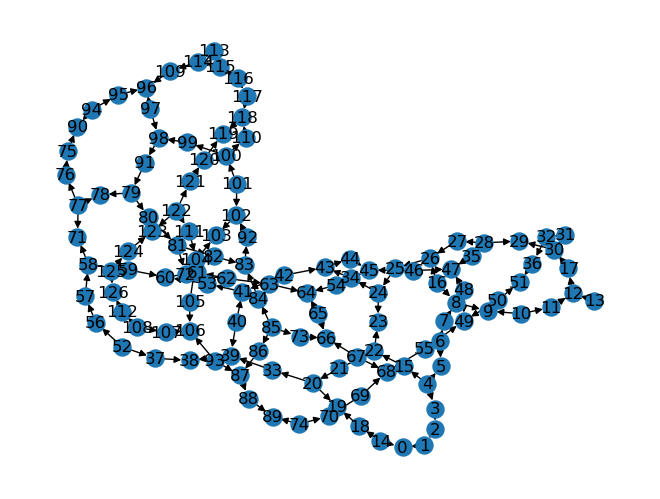

In [54]:
# Define the graph of the possible
# configurations of the qubits' layouts
# fulfilling the the connectivity constraints
graph = rx.PyDiGraph()


# Add nodes to the graph of the possible
# configurations of the qubits' layouts
# fulfilling the the connectivity constraints
graph.add_nodes_from(np.arange(0, noisy_fake_backend.num_qubits, 1))

# Define the Two-Qubit Gate to be considered
# as being the Echoed Cross-Resonance (ECR) gate
two_qubit_gate = "ecr"

# Add edges to the graph of the possible
# configurations of the qubits' layouts
# fulfilling the the connectivity constraints,
# according to the Coupling Map of the noisy
# Quantum Simulator (Fake Quantum Backend) considered,
# and using the Two-Qubit Gate Error rates as weights
graph.add_edges_from([(edge[0], edge[1],
                       noisy_fake_backend.properties()\
                       .gate_error(gate = two_qubit_gate,
                                   qubits = (edge[0], edge[1])))
                      for edge in noisy_fake_backend.coupling_map])


# Draw the graph of the possible
# configurations of the qubits' layouts
# fulfilling the the connectivity constraints
draw_graph(graph, node_size = 150,
           with_labels = True, width = 1)

Also take into account that we have to look for *qubits' layouts* *that have the connectivity allowing for the gates in* `pair_list`, *which can be converted to a more interpretable list using* `logical_pair_list`:


In [55]:
# Function to remap node labels to a new sequence starting
# from 0 based on their order in original labels of a graph
def remap_nodes(original_labels: list,
                edge_list: list[list]) -> list[list[int]]:
  
    # Retrieve the original node labels mapping of a graph
    label_mapping = {label: idx for idx, label in enumerate(original_labels)}

    # Remap the node labels mapping to a new sequence starting
    # from 0 based on their order in original labels of a graph
    remapped = [[label_mapping[src], label_mapping[dst]] for src, dst in edge_list]
    
    
    # Return the remapped node labels of a graph
    return remapped

In [56]:
# Extract the qubits' layout of the transpiled Quantum Circuit for
# the Quantum Approximate Optimization Algorithm (QAOA) Ansatz
layout_list = list(circuit_transpiled.layout\
                   .initial_layout.get_physical_bits().keys())[:5]

# Remap the node labels of the graph representing
# the qubits' layout of the transpiled Quantum Circuit for
# the Quantum Approximate Optimization Algorithm (QAOA) Ansatz
logical_pair_list = remap_nodes(layout_list, pair_list)

In [57]:
# Print the physical qubits' layout of
# the transpiled Quantum Circuit for
# the Quantum Approximate Optimization
# Algorithm (QAOA) Ansatz
print(f"Physical Qubits' Layout list:\n"
      f"- {layout_list}")

# Print a blank line
print()

# Print the original pairs of Two-Qubit Gates
# before the remapping of node labels of the graph
# representing the qubits' layout of the transpiled
# Quantum Circuit for the Quantum Approximate
# Optimization Algorithm (QAOA) Ansatz
print(f"Original Two-Qubit Gates list:\n"
      f"- {pair_list}")

# Print a blank line
print()

# Print the transformed pairs of Two-Qubit Gates
# after the remapping of node labels of the graph
# representing the qubits' layout of the transpiled
# Quantum Circuit for the Quantum Approximate
# Optimization Algorithm (QAOA) Ansatz
print(f"Remapped Two-Qubit Gates list (in Logical Qubits):\n"
      f"- {logical_pair_list}")

Physical Qubits' Layout list:
- [72, 62, 81, 61, 63]

Original Two-Qubit Gates list:
- [[62, 72], [81, 72], [62, 61], [62, 63]]

Remapped Two-Qubit Gates list (in Logical Qubits):
- [[1, 0], [2, 0], [1, 3], [1, 4]]


***


<a id="exercise_4"></a>
<div class="alert alert-block alert-success">
    
<b>Exercise 4: Good Mapping </b> 

**Your Goal:** Find all the good qubit layouts. 

In this fourth exercise you will find **ALL** the possible *qubits' layouts* that have a *smaller* **Two-Qubit Gate** **Accumulated Error** than the *qubits' layout transpilation* of the above, whose value is stored in the variable `acc_two_qubit_error`. This problem can be reformulated as a **graph problem** in which you need to find ALL the paths in the graph above which the *total edge weights sum to less than the specified threshold* and that have the *same connectivity of that in* `logical_pair_list`.

</div>

*** 

<div class="alert alert-block alert-warning">
<b>Warning: Don not try to solve it by brute force!</b>

If you try a *brute force approach*, it might take hours of computation, as there are too many paths. Instead, *restrict the search to only the paths that have the same connectivity of* `logical_pair_list`, which are $<100$, *and your computation will take less than 1 second*.

</div>

***

<div class="alert alert-info">
<details>
<summary> <h3>Hint 💡</h3> <b>(Click to Expand)</b></summary>
    
The proposed workflow for this exercise is:

1. Start from each node in the graph and iteratively build paths by extending them one step at a time;
<br>
2. At each step, use the `logical_pair_list` to decide which node in the current path to expand from;
<br>
<br>
    
3. Depending on whether the node we are expanding from in the path corresponds to the *control qubit* or the *target qubit* (based on `logical_pair_list`), we choose how to access its *neighbors*:

    3.1 If it is the *control qubit*, we use *directed edges* (`graph.neighbors`);

    3.2 If it is the *target qubit*, we use *undirected edges* (`graph.neighbors_undirected`).
<br>

4. As you extend each path, calculate the *cumulative weight* by multiplying the *edge*'s *weight* (`graph.get_edge_data(edge_1,edge_2)`) by the corresponding value in `two_qubit_ops_list`. Note that if you are using the *undirected* *neighbors*, you should use `graph.get_edge_data(edge_2, edge_1)`;
<br>

5. When the path is complete, i.e., when it gets to the length of the `two_qubit_ops_list`, check to only keep paths whose *total weight* stays *below the threshold*.

</details>

</div>

***

You might find these functions useful for the next exercise, which were used as well in the code below:
* [rx.PyDiGraph.neighbors](https://www.rustworkx.org/dev/apiref/rustworkx.PyDiGraph.neighbors.html);
* [rx.PyDiGraph.neighbors_undirected](https://www.rustworkx.org/dev/apiref/rustworkx.PyDiGraph.neighbors_undirected.html);
* [rx.PyDiGraph.has_edge](https://www.rustworkx.org/apiref/rustworkx.PyDiGraph.has_edge.html).

Additionally, you might find [rx.PyDiGraph.get_edge_data](https://www.rustworkx.org/apiref/rustworkx.PyDiGraph.get_edge_data.html) particularly useful. It allows you to obtain the **Two-Qubit Gate Error** **rate** associated with each interaction in the graph.

In [58]:
# Function to find all valid paths and valid weights through 
# a graph, whose weighted sum is below a given threshold
def find_paths_with_weight_sum_below_threshold\
    (graph: rx.PyDiGraph, threshold: float,
     two_qubit_ops_list: list[int],
     logical_pair_list: list[list[int]]) -> tuple[list[list[int]], list[float]]:

    # Create an empty list for the valid paths through
    # the given graph for the qubits' layout connectivity
    valid_paths = []
    
    # Create an empty list for the valid weights through
    # the given graph for the qubits' layout connectivity
    valid_weights = []
    
    
    ### WRITE YOUR CODE BELOW HERE ###
    
    # Task 4/Step 4 - Find all valid paths through a graph,
    #                 such that the total weighted sum of
    #                 the path is below a given threshold
    
    # For each (possible) start node in the graph
    # for the qubits' layout connectivity
    for start_node in range(graph.num_nodes()):
        
        # Initialize the list of paths with a single node path,
        # starting from the current start node
        paths = [[start_node]]
        
        # Initialize the corresponding weights
        # for each path, starting with 0
        weights = [0]
        
        
        # For each Two-Qubit Gate operation
        for i in range(len(two_qubit_ops_list)):
            
            # Create an empty list of new paths in
            # the graph for the qubits' layout connectivity
            new_paths = []    
            
            # Create an empty list of new weights in
            # the graph for the qubits' layout connectivity
            new_weights = []  
            
            
            # For each path and its corresponding weight
            for path, weight in zip(paths, weights):
                
                # If the 2nd qubit of the pair of logical qubits
                # for the current Two-Qubit Gate operation has an index
                # greater than the 1st qubit of the pair of logical qubits
                # for the same Two-Qubit Gate operation being considered
                if logical_pair_list[i][0] < logical_pair_list[i][1]:
                    
                    # Define the index of the 1st qubit of the pair of
                    # logical qubits for the current Two-Qubit Gate operation
                    # to act as control qubit and expanding node
                    index_of_expanding_node = logical_pair_list[i][0]
                    
                    # Define the node of the graph for the qubits' layout
                    # connectivity to which the path will expand from
                    node_to_expand_from = path[index_of_expanding_node]
                    
                    
                    # For each neighbor in the graph for the qubits' layout
                    # connectivity to which the directed path will expand from
                    for neighbor in graph.neighbors(node_to_expand_from):
                                            
                        # If the neighbor which is not in the current path and
                        # if the graph for the qubits' layout connectivity has
                        # an edge between the to which the path will expand from
                        # and the current neighbor being considered
                        if neighbor not in path and graph.has_edge(node_to_expand_from,
                                                                   neighbor):
                            
                            # Task 4.1/Step 4.1 - Calculate the edge weight,
                            # (to compete below)  scaled by the number of times
                            #                     the gate is applied which is
                            #                     in two_qubit_ops_list
                            
                            # Compute the edge weight, being scaled by
                            # the number of times the Two-Qubit Gate is applied
                            edge_weight = two_qubit_ops_list[i] * \
                                          graph.get_edge_data(node_to_expand_from,
                                                              neighbor)
                            
                            # Append the path and its neighbor to
                            # the list of new paths in the graph
                            # for the qubits' layout connectivity,
                            # extending the path being considered
                            new_paths.append(path + [neighbor])
                            
                            # Append the weight and edge's weight to
                            # the list of new weights in the graph
                            # for the qubits' layout connectivity,
                            # updating the weight being considered
                            new_weights.append(weight + edge_weight)
                            
                            
                # If the 1st qubit of the pair of logical qubits
                # for the current Two-Qubit Gate operation has an index
                # greater than the 2nd qubit of the pair of logical qubits
                # for the same Two-Qubit Gate operation being considered
                else:
                    
                    # Define the index of the 2nd qubit of the pair of
                    # logical qubits for the current Two-Qubit Gate operation
                    # to act as target qubit and expanding node
                    index_of_expanding_node = logical_pair_list[i][1]
                    
                    # Define the node of the graph for the qubits' layout
                    # connectivity to which the path will expand from
                    node_to_expand_from = path[index_of_expanding_node]
                    
                    
                    # For each neighbor in the graph for the qubits' layout
                    # connectivity to which the undirected path will expand from
                    for neighbor in graph.neighbors_undirected(node_to_expand_from):
                    
                        # If the neighbor which is not in the current path and
                        # if the graph for the qubits' layout connectivity has
                        # an edge between the to which the path will expand from
                        # and the current neighbor being considered
                        if neighbor not in path and graph.has_edge(neighbor,
                                                                   node_to_expand_from):
                            
                            # Task 4.2/Step 4.2 - Calculate the edge weight,
                            # (to compete below)  scaled by the number of times
                            #                     the gate is applied which is
                            #                     in two_qubit_ops_list
                                                        
                            # Compute the edge weight, being scaled by
                            # the number of times the Two-Qubit Gate is applied
                            edge_weight = two_qubit_ops_list[i] * \
                                          graph.get_edge_data(neighbor,
                                                              node_to_expand_from)
                            
                            # Append the path and its neighbor to
                            # the list of new paths in the graph
                            # for the qubits' layout connectivity,
                            # extending the path being considered
                            new_paths.append(path + [neighbor])
                            
                            # Append the weight and edge's weight to
                            # the list of new weights in the graph
                            # for the qubits' layout connectivity,
                            # updating the weight being considered
                            new_weights.append(weight + edge_weight)
                            
                            
            # Update the list of paths in the graph
            # for the qubits' layout connectivity,
            # with the new paths found, for the next iteration
            paths = new_paths
            
            # Update the list of weights in the graph
            # for the qubits' layout connectivity,
            # with the new weights found, for the next iteration
            weights = new_weights
    

        # For each possible path and corresponding weight
        for path, weight in zip(paths, weights):

            # Task 4.3/Step 4.3 - Complete the condition for `if`
            # (to compete below)
            
            # If the weight of the current path is
            # below the threshold being considered
            if(weight < threshold): 
                
                # Append the current path which corresponding
                # weight to the list of valid paths through
                # the given graph for the qubits' layout connectivity
                valid_paths.append(path)
                
                # Append the current weight which corresponding
                # weight to the list of valid paths through
                # the given graph for the qubits' layout connectivity
                valid_weights.append(weight)
            
    ### YOUR CODE FINISHES HERE    ###
    
    
    # Return the valid paths and valid weights through
    # the given graph for the qubits' layout connectivity
    return valid_paths, valid_weights

In [59]:
# Define the sum of all the Two-Qubit Gate Accumulated
# Error rates to be the threshold to be considered
threshold = acc_two_qubit_error


# Find all valid paths and valid weights through
# the graph for the qubits' layout connectivity,
# whose weighted sum is below the threshold defined previously
valid_paths, valid_weights = \
    find_paths_with_weight_sum_below_threshold\
    (graph, threshold, two_qubit_ops_list, logical_pair_list)

In [60]:
# Note:
# * There could be no other valid paths with smaller errors

# If some valid path and valid weight through the graph
# for the qubits' layout connectivity, whose weighted sum
# is below the threshold defined previously, was found
if valid_weights:
    
    # Find the index of the minimum weight found
    minimum_weight_index = valid_weights.index(min(valid_weights))
    
    # Find the valid path with the minimum weight found
    # to be used as the optimal qubits' layout of connectivity
    opt_layout = valid_paths[minimum_weight_index]

# If no valid path and valid weight through the graph
# for the qubits' layout connectivity, whose weighted sum
# is below the threshold defined previously, was found
else:
    
    # Define the index of the minimum weight found as None
    minimum_weight_index = None
    
    # Define the valid path with the minimum weight found
    # to be used as the optimal qubits' layout of connectivity
    # as being the default/original qubits' layout of 
    # the transpiled Quantum Circuit for the Quantum
    # Approximate Optimization Algorithm (QAOA) Ansatz
    opt_layout = layout_list

In [61]:
# Print the number of valid paths in
# the graph for the qubits' layout connectivity
print(f"We found {len(valid_paths)} valid paths "
      f"on the optimal qubits' layout!")

We found 13 valid paths on the optimal qubits' layout!


In [62]:
# Create the initial qubits' layout for connectivity as
# being the mapping between the qubits of the Quantum Circuit
# for the Quantum Approximate Optimization Algorithm (QAOA) Ansatz
# and the optimal qubits' layout of connectivity
init_layout = Layout({q: phys for q, phys in zip(qaoa_ansatz_circuit.qubits,
                                                 opt_layout)})


# Create the Pass Manager for the transpilation of
# the Quantum Circuit for the Quantum Approximate
# Optimization Algorithm (QAOA) Ansatz for the noisy
# Quantum Simulator (Fake Quantum Backend) defined before,
# considering optimal qubits' layout of connectivity as
# initial qubit's layout and with some optimization settings
pass_manager = generate_preset_pass_manager\
               (backend = noisy_fake_backend,
                optimization_level = 3,
                seed_transpiler = seed,
                initial_layout = init_layout,
                layout_method = "sabre")

# Transpile the Quantum Circuit for the Quantum Approximate
# Optimization Algorithm (QAOA) Ansatz for the noisy
# Quantum Simulator (Fake Quantum Backend) defined before
circuit_opt = pass_manager.run(qaoa_ansatz_circuit)


# Compute the accumulated Two-Qubit
# Gate Error rates and related metrics
# for the transpiled Quantum Circuit
# for the Quantum Approximate Optimization
# Algorithm (QAOA) Ansatz layout and a noisy
# Quantum Simulator (Fake Quantum Backend),
# retrieving the sum of all the Two-Qubit Gate
# Accumulated Error rates, the Two-Qubit Gates count,
# the pairs of qubits on which the Two-Qubit Gates act,
# Two-Qubit Gate Errors, and all Two-Qubit Gate
# Acumulated Error rates as metrics
(acc_total_error_opt, two_qubit_gate_count,
 pair_list, error_pair_list, error_acc_pair_list) = \
    two_qubit_gate_errors_per_circuit_layout(circuit_opt,
                                             noisy_fake_backend)

In [63]:
# Print the path with smaller total accumulated errors in its Two-Qubit Gates
print(f"The path with smaller errors in its Two-Qubit Gates is:\n"
      f"- {opt_layout}\n\n"
      f"With total accumulated error of:\n"
      f"- {acc_total_error_opt:.3f}")

The path with smaller errors in its Two-Qubit Gates is:
- [5, 4, 6, 3, 15]

With total accumulated error of:
- 0.282


In [64]:
# Submit your answer for the exercise 4 of the lab 2,
# using the following code from the Grader
grade_lab2_ex4(find_paths_with_weight_sum_below_threshold)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


Well done, you have completed the most complicated part of the work. Now all of the found combinations are better than the *trivial threshold*.

***

To this point, we've seen how optimizing the *layout of qubits' connectivity* can significantly *reduce the accumulated error rate from* **Two-Qubit Gates**. But can you imagine having to do this manually every time we want to run a **Quantum Circuit** on **real** **quantum hardware**? That would be incredibly tedious. But do not worry - the **Transpiler** can handle this task for us. *By using one of the* `layout_methods` *provided*, *it smartly selects a layout of qubits that satisfies the connectivity necessities of our* **Quantum Circuit**, while also aiming to *minimize the number of* **Two-Qubit Gates**.

In particular, we will use the `sabre` method, which is a *stochastic technique that aims to minimize the number of* **SWAP Gates**. To make the most of it, we will perform a sweep over different values of the **Transpiler** *seed*. This allows us to *explore multiple qubits' layout configurations* and *choose the one that minimizes the* **Two-Qubit Gate Error** **rate**, as we wanted. Note that here we could have selected to *minimize the* **Quantum Circuit**'s *depth* or *the number of* **Two-Qubit Gates**, the **Readout Error**, or any other metric we wanted to use.

***

<a id="exercise_5"></a>
<div class="alert alert-block alert-success">
    
<b>Exercise 5: Best Mapping </b> 

**Your Goal:** Use the **Transpiler** to find the *optimal* *qubits' layout*.

In this fifth exercise, you will use the `sabre` `layout_method` to identify *the layout that has the lowest* **Two-Qubit Gate** **Accumulated Error** **rate**. <br>

To do so, perform a sweep over the `seed_transpiler` values from $0$ to $499$ and use the `generate_preset_pass_manager` with `optimization_level=3` to select the *best qubits' layout*.
    
Remember you can count the **accumulated error rate** of the **Two-Qubit Gates** and the **Two-Qubit Gate Count** using the `two_qubit_gate_errors_per_circuit_layout` function.

In [65]:
# Function to find the Transpiler's seed that
# minimizes Two-Qubit Gate Error rate for a given
# Quantum Circuit and a Quantum Backend as well
def finding_best_seed\
    (circuit: QuantumCircuit,
     backend: QiskitRuntimeService.backend) -> tuple[QuantumCircuit,
                                                     int, float, int]:
    
    # Initialize the optimal transpiled Quantum Circuit
    # for the best Transpiler's seed
    circuit_opt_best_seed = None
    
    # Initialize the best Transpiler's seed 
    best_seed_transpiler = 0

    # Initialize the minimum Two-Qubit Gate Accumulated
    # Error rate seed to be used as comparison threshold 
    min_err_acc_seed_loop = 100
    
    # Initialize the Two-Qubit Gate Count in
    # the optimal transpiled Quantum Circuit
    # for the best Transpiler's seed
    two_qubit_gate_count_seed_loop = 0
    
    
    # For each Transpiler's seed within a range of 500 seeds
    for seed_transpiler in range(0, 500):
        
        # Create the Pass Manager for the transpilation of
        # the given Quantum Circuit for the given Quantum Backend,
        # considering the current Transpiler's seed
        # and with some optimization settings
        pass_manager = generate_preset_pass_manager\
                       (backend = backend,
                        optimization_level = 3,
                        seed_transpiler = seed_transpiler,
                        layout_method = "sabre")
        
        # Transpile the given Quantum Circuit for
        # the given Quantum Backend, considering
        # the current Transpiler's seed
        # for the Quantum Simulation
        circuit_opt_seed = pass_manager.run([circuit])[0]
        
        
        ### WRITE YOUR CODE BELOW HERE ###
    
        # Task 5/Step 5 - Find the Transpiler's seed, ranging from 0 to 499,
        #                 that minimizes Two-Qubit Gate Error rates for
        #                 a given Quantum Circuit and a Quantum Backend
        
        
        # Task 5.1/Step 5.1 - Use the `two_qubit_gate_errors_per_circuit_layout`
        #                     function to count for the error rates of
        #                     the transpiled Quantum Circuit
        
        # Compute the accumulated Two-Qubit
        # Gate Error rates and related metrics
        # for the given transpiled Quantum Circuit
        # and a given Quantum Backend as well,
        # retrieving the sum of all the Two-Qubit Gate
        # Accumulated Error rates, the Two-Qubit Gates count,
        # the pairs of qubits on which the Two-Qubit Gates act,
        # Two-Qubit Gate Errors, and all Two-Qubit Gate
        # Acumulated Error rates as metrics
        (acc_total_error_opt, two_qubit_gate_count,
         pair_list, error_pair_list, error_acc_pair_list) = \
            two_qubit_gate_errors_per_circuit_layout(circuit_opt_seed,
                                                     backend)

                
        # Task 5.2/Step 5.2 - Check if the accumulated error rate accounted
        #                     above is smaller than min_err_acc_seed_loop;
        #                     If so, assign the variables that this function returns
        
        # If the sum of all the Two-Qubit Gate
        # Accumulated Error rates is lower than
        # the minimum Two-Qubit Gate Accumulated
        # Error rate seed threshold
        if(acc_total_error_opt < min_err_acc_seed_loop):
            
            # Update the optimal transpiled Quantum Circuit
            # for the best Transpiler's seed with the given
            # Quantum Circuit for the given Quantum Backend,
            # considering the current Transpiler's seed
            # for the Quantum Simulation
            circuit_opt_best_seed = circuit_opt_seed
            
            # Update the best Transpiler's seed
            # with the current Transpiler's seed
            best_seed_transpiler = seed_transpiler
            
            # Update the minimum Two-Qubit Gate Accumulated
            # Error rate threshold for the best Transpiler's seed
            # with the current the sum of all the Two-Qubit Gate
            # Accumulated Error rates
            min_err_acc_seed_loop = acc_total_error_opt
            
            # Update the Two-Qubit Gate Count in
            # the optimal transpiled Quantum Circuit
            # for the best Transpiler's seed with
            # the Two-Qubit Gates count for the current
            # optimal transpiled Quantum Circuit
            # for the best Transpiler's seed 
            two_qubit_gate_count_seed_loop = two_qubit_gate_count
        
        ### YOUR CODE FINISHES HERE    ###

        
    # Return the optimal transpiled Quantum Circuit
    # for the best Transpiler's seed, the best Transpiler's seed,
    # the minimum Two-Qubit Gate Accumulated Error rate threshold
    # for the best Transpiler's seed, and the Two-Qubit Gate Count in
    # the optimal transpiled Quantum Circuit for the best Transpiler's seed
    return (circuit_opt_best_seed, best_seed_transpiler,
            min_err_acc_seed_loop, two_qubit_gate_count_seed_loop)

In [66]:
# Find the Transpiler's seed that minimizes Two-Qubit Gate
# Error rate for a given Quantum Circuit and a Quantum Backend as well,
# retrieving the optimal transpiled Quantum Circuit for the best
# Transpiler's seed, the best Transpiler's seed, the minimum Two-Qubit
# Gate Accumulated Error rate threshold for the best Transpiler's seed,
# and the Two-Qubit Gate Count in the optimal transpiled Quantum Circuit
# for the best Transpiler's seed
(circuit_opt_seed_loop, best_seed_transpiler,
 min_err_acc_seed_loop, two_qubit_gate_count_seed_loop) = \
    finding_best_seed(qaoa_ansatz_circuit, noisy_fake_backend)

# Retrieve the best qubits' layout according to
# the (best) Transpiler's seed that minimizes Two-Qubit Gate
# Error rate for a given Quantum Circuit and a Quantum Backend as well
best_layout = list(circuit_opt_seed_loop.layout.initial_layout\
                   .get_physical_bits().keys())[:num_nodes]

In [67]:
# Print a line separator
print("----------------------------------------------------\n")

# Print the best Transpiler's seed found
print(f"Best Transpiler's Seed:\n"
      f"- {best_seed_transpiler}")

# Print a blank line
print()

# Print the minimum accumulated Two-Qubit Gate Error
# rate for the best Transpiler's seed found
print(f"Minimum Accumulated Two-Qubit Gate Error\n"
      f"for the best Transpiler's seed found:\n"
      f"- {min_err_acc_seed_loop:.3f}")

# Print a blank line
print()

# Print the Two-Qubit Gate Count
# for the best Transpiler's seed found
print(f"Two-Qubit Gate/Operations Count\n"
      f"for the best Transpiler's seed found:\n"
      f"- {two_qubit_gate_count_seed_loop}")

# Print a blank line
print()

# Print the best qubits' layout
# for the best Transpiler's seed found
print(f"Best Qubits' Layout for best Transpiler's seed\n"
      f"(First n Logical Qubits Mapped to Physical qubits):\n"
      f"- {best_layout}")

# Print a line separator
print("\n------------------------------------------------------")

----------------------------------------------------

Best Transpiler's Seed:
- 452

Minimum Accumulated Two-Qubit Gate Error
for the best Transpiler's seed found:
- 0.268

Two-Qubit Gate/Operations Count
for the best Transpiler's seed found:
- 70

Best Qubits' Layout for best Transpiler's seed
(First n Logical Qubits Mapped to Physical qubits):
- [57, 58, 56, 71, 59]

------------------------------------------------------


In [68]:
# Submit your answer for the exercise 5 of the lab 2,
# using the following code from the Grader
grade_lab2_ex5(finding_best_seed)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


Next, we sample the **Quantum Approximate Optimization Algorithm (QAOA)** **Quantum Circuit** with these **Quantum Circuits** *to highlight the importance of good transpilation*.

<div class="alert alert-block alert-warning">
<b>Warning: 5 minutes needed.</b>

Running the following code will take approximately 5 minutes to execute, and will block this **Jupyter Notebook** during that time. You can skip to the next cell.

</div>

In [69]:
# Initialize the list of counting (discrete) results of
# a Quantum Simulation of the transpiled Quantum Circuit
# for the Quantum Approximate Optimization Algorithm (QAOA)
counts_list_transpiled_circuits = []

# Create a list for the transpiled and best Transpiler's seed
# Quantum Circuits for the Quantum Approximate Optimization Algorithm (QAOA)
circuit_transpiled_list = [circuit_transpiled, circuit_opt_seed_loop]

# Initialize the list of optimization parameters
# for the best Transpiler's seed found and
# respective optimal Quantum Circuit for
# the Quantum Approximate Optimization Algorithm (QAOA)
opt_params_list_transpiled_circuits = []

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -1.5990740092599072
       x: [-4.500e-01 -3.547e-01 -1.523e+00 -6.536e-01]
    nfev: 62
   maxcv: 0.0


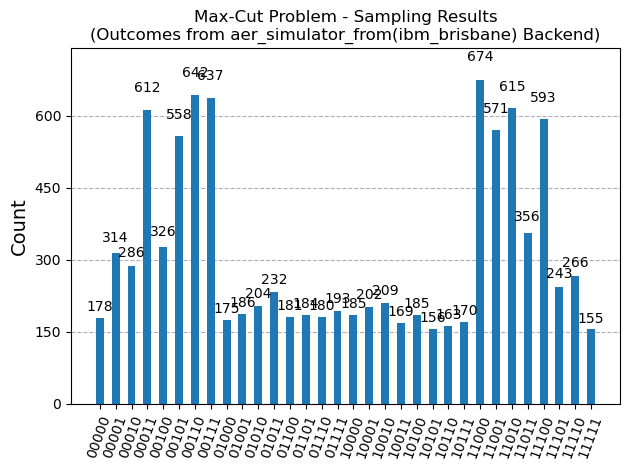

Probability of Measuring a Quantum State Solution
using the (default) transpiled Quantum Circuit for
the Quantum Approximate Optimization Algorithm (QAOA) is:
- 0.4902 (49.02%)

-------------------------------------------------------------------
 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -2.929420705792942
       x: [ 1.246e+00  1.325e+00  7.108e-02  9.848e-01]
    nfev: 126
   maxcv: 0.0


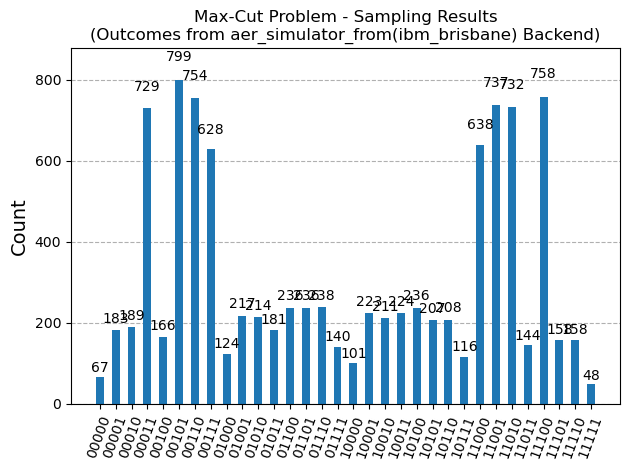

Probability of Measuring a Quantum State Solution
using the best Transpiler's seed Quantum Circuit for
the Quantum Approximate Optimization Algorithm (QAOA) is:
- 0.5775 (57.75%)

-------------------------------------------------------------------


In [70]:
# For each (default) transpiled and best Transpiler's seed
# Quantum Circuits for the Quantum Approximate
# Optimization Algorithm (QAOA)
for i, circuit in enumerate(circuit_transpiled_list):
    
    # Optimize the current (parameterized) Quantum Approximate
    # Optimization Algorithm (QAOA) Ansatz Quantum Circuit model,
    # using the Constrained Optimization By Yinear Linear Approximation
    # (COBYLA) optimizer and an estimator on a given Backend,
    # retrieving the final optimization results and Objective Function Values
    result_backend, _ = train_qaoa(init_params, circuit,
                                   cost_function_hamiltonian,
                                   noisy_fake_backend)
    
    # Retrieve the optimization parameters
    # for the current (parameterized) Quantum Approximate
    # Optimization Algorithm (QAOA) Ansatz Quantum Circuit model,
    # using the Constrained Optimization By Yinear
    # Linear Approximation (COBYLA) optimizer
    opt_params = result_backend.x
    
    # Append the optimization parameters
    # for the current (parameterized) Quantum Approximate
    # Optimization Algorithm (QAOA) Ansatz Quantum Circuit model,
    # using the Constrained Optimization By Yinear
    # Linear Approximation (COBYLA) optimizer to
    # the respective list of optimization parameters
    opt_params_list_transpiled_circuits.append(opt_params)
    
    # Sample the counting (discrete) results of
    # a Quantum Simulation of the current (parameterized)
    # Quantum Approximate Optimization Algorithm (QAOA)
    # Ansatz Quantum Circuit using a noisy Quantum Simulator
    # (Fake Quantum Backend), and the optimized parameters
    counts_list_transpiled_circuit = sample_qaoa(opt_params,
                                                 circuit,
                                                 noisy_fake_backend)
    
    # Append the counting (discrete) results of
    # a Quantum Simulation of the current (parameterized)
    # Quantum Approximate Optimization Algorithm (QAOA)
    # Ansatz Quantum Circuit using a noisy Quantum Simulator
    # (Fake Quantum Backend), and the optimized parameters
    counts_list_transpiled_circuits.append(counts_list_transpiled_circuits)
    
    
    # Retrieve the counting (discrete) results of a quantum state solution,
    # considering the (default) transpiled and best Transpiler's seed
    # Quantum Circuits for the Quantum Approximate Optimization Algorithm (QAOA)
    solutions_counts = [counts_list_transpiled_circuit[key]
                        for key in states_solutions]
    
    
    # If it is being considered the (default) transpiled
    # Quantum Circuit for the Quantum Approximate
    # Optimization Algorithm (QAOA)
    if(i == 0):
    
        # Print the probability of measuring a quantum state solution
        # considering the (default) transpiled Quantum Circuit
        # for the Quantum Approximate Optimization Algorithm (QAOA)
        print(f"Probability of Measuring a Quantum State Solution\n"
              f"using the (default) transpiled Quantum Circuit for\n"
              f"the Quantum Approximate Optimization Algorithm (QAOA) is:\n"
              f"- {float(sum(solutions_counts) / SHOTS)}"
              f" ({float(sum(solutions_counts) / SHOTS) * 100:.2f}%)")
        
    # If it is being considered the best Transpiler's seed
    # Quantum Circuit for the Quantum Approximate
    # Optimization Algorithm (QAOA)
    else:
    
        # Print the probability of measuring a quantum state solution
        # considering the best Transpiler's seed Quantum Circuit
        # for the Quantum Approximate Optimization Algorithm (QAOA)
        print(f"Probability of Measuring a Quantum State Solution\n"
              f"using the best Transpiler's seed Quantum Circuit for\n"
              f"the Quantum Approximate Optimization Algorithm (QAOA) is:\n"
              f"- {float(sum(solutions_counts) / SHOTS)}"
              f" ({float(sum(solutions_counts) / SHOTS) * 100:.2f}%)")

    # Print a line separator
    print("\n-------------------------------------------------------------------")

In the following, remember to use the `sabre` layout method and loop over *different* **Transpiler**'s *seeds* to *minimize a specific metric* - such as **Two-Qubit Gate Counts**, **Quantum Circuit**'s **Depth**, or **Accumulated Error Rates** - in order to *maximize performance*.

In this section, we have seen that **transpilation** is a key step in preparing **Quantum Circuits** to be executed on **real** **quantum hardware**. Since different **quantum devices** *have different layouts* and *different quantum gate sets*, a *good* **Transpiler** helps to adapt your **Quantum Circuit** to fit the **quantum hardware** while trying to keep things like **Quantum Circuit**'s **depth** and **error rates** *low*, thus *achieving better performance* from your **Quantum Algorithms**.

***

# Chapter 5: Quantum Error Mitigation (QEM)
<a id="quantum-error-mitigation"></a>

One of the main areas of research to address the *inevitable* **Quantum Noise** in **quantum devices** is **Quantum Error Mitigation (QEM)**. **Quantum Error Mitigation (QEM)** consists of a set of *intelligent techniques* designed to *reduce the impact of* **Quantum Noise** *without requiring complex* **Quantum Error Correction (QEC)** **codes** or *additional qubits*, *resources that remain limited in today*'s **quantum
hardware**. *Instead of correcting* **quantum errors** as they occur, **Quantum Error Mitigation (QEM)** uses strategies such as *loop repetition*, *calibration-based adjustments*, and *classical post-processing* *to improve the quality of the final results*, *leading to an improved performance in our* **Quantum Algorithms**.

This approach is especially valuable for current **quantum devices**, which are *small-scale* to *medium-scale* and *inherently noisy*. Fully **Fault-Tolerant Quantum Computing (FTQC)** is still beyond our reach, but **Quantum Error Mitigation (QEM)** offers a practical way to take full advantage of the **quantum devices** we have now.

<br>

**Quantum Error Mitigation (QEM)** integrates naturally with **Hybrid Quantum-Classical Algorithms**, those that alternate between **Quantum Computation** and **Classical Computation**, such as:

- **Variational Quantum Eigensolver (VQE)**;
- **Quantum Approximate Optimization Algorithm (QAOA)**;
- **Quantum-enhanced Machine Learning (QeML) models**.

<br>

These types of **Quantum Algorithms** are especially sensitive to **Quantum Noise**, and **Quantum Error Mitigation (QEM)** can greatly improve their reliability and accuracy.

Remarkably, **Quantum Error Mitigation (QEM)** does not eliminate all *quantum imperfections*, but it refines the result enough to make it useful and actionable. It is a tool for narrowing the gap between *noisy quantum results* and meaningful insights, paving the way for practical *quantum applications* *even before large-scale* *error-correcting* **quantum machines** *become a reality*.

There are several well-established techniques used in **Quantum Error Mitigation (QEM)**, each tailored to address different types of **Quantum Noise** and *quantum imperfections* in **quantum computations**.

One of the most widely used methods is **Zero-Noise Extrapolation (ZNE)**. In this approach, the same **Quantum Circuit** is *executed multiple times* *with deliberately increased* **Quantum Noise** *levels*. Then, mathematical **extrapolation** techniques are applied to estimate what the outcome would have been in the absence of **Quantum Noise**. This method was introduced by *Kristan Temme*, *Sergey Bravyi*, and *Jay Gambetta* in 2017. [\[3\]](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.119.180509)

***

## 5.1. Zero-Noise Extrapolation (ZNE)
<a id="zero-noise-extrapolation"></a>

**Zero-Noise Extrapolation (ZNE)** is a powerful **Quantum Error Mitigation (QEM)** technique designed to reduce the impact of **Quantum Noise** in **Quantum Circuits** *without requiring additional qubits* or *full* **Quantum Error Correction (QEC)**.

The process consists of three essential stages:
1. **Noise Amplification**;
2. Execution of the **Quantum Circuit** at various **Quantum Noise** levels;
3. **Classical** **Extrapolation** back to the *zero-noise limit*.

***

### Noise Amplification

The first stage, **Noise Amplification**, lies at the heart of **Zero-Noise Extrapolation (ZNE)**. The idea is to *run the* **Quantum Circuit** *in versions that have more* **Quantum Noise** *than usual*, *but in a controlled and reversible way*. *By comparing how the output changes as* **Quantum Noise** *increases*, *it becomes possible to infer what the result would be with no* **Quantum Noise** *at all*. This is typically achieved using a technique called **Quantum Circuit Folding**.

**Quantum Circuit Folding** artificially increases the **Quantum Noise** in a **quantum computation** by *inserting additional quantum gates that*, in theory, *do not alter the logical outcome*. *These additional gates are the adjoint (inverse) operations of previously applied quantum gates*. For example, a *unitary operation* $U$ *can be transformed into* $U \cdot U^\dagger \cdot U$, *which logically still computes* $U$, *but takes longer to execute, thus being exposed to more* **Quantum Noise** *from the* **quantum hardware**.


There are two common types of folding: **Global Folding** and **Local Folding**.

***

#### Global Folding

In **Global Folding**, *the entire* **Quantum Circuit** *is folded as a single block*. This means *the full unitary operation* $U$ *that the* **Quantum Circuit** *represents is wrapped with its adjoint operation*, yielding the transformation:

$$U \rightarrow U \cdot U^\dagger \cdot U$$

*This global transformation is logically equivalent to the original* **Quantum Circuit**, since $U^\dagger \cdot U$ is the **identity operation**. However, because the **Quantum Circuit** *is now longer* and *includes more quantum gate operations*, *it becomes more susceptible to environmental* **Quantum Noise** and **quantum hardware** *imperfections*.

**Global Folding** is particularly useful for quickly applying a uniform increase in **Quantum Noise** across the full **Quantum Circuit**. It is straightforward to implement and does not require knowledge of the internal structure of the **Quantum Circuit**. As such, it serves as a coarse-grained approach to **Noise Amplification**, *suitable for general-purpose* **extrapolation**, *when fine control is not needed*.

***

<a id="exercise_6a"></a>

<div class="alert alert-block alert-success">
<b>Exercise 6a: Global Folding</b>

**Your Goal:** Implement **Global Folding** on the **Quantum Circuits**.

In this Exercise 6a, you will create a function that applies **Global Folding** to any **Quantum Circuit**. Your implementation should allow evaluation of the **Quantum Circuit** *at different* **Quantum Noise** *scaling factors*, *which simulate increased* **Quantum Noise** *levels*, while preserving the **Quantum Circuit**'s *logical output*. The **Quantum Noise** *scaling factor* *represents the number of times a* **Quantum Circuit** $U$ or $U^\dagger$ *is applied*, *with* $1$ *being the non-folding case*.

</div>

In [71]:
# Function to apply the Global Folding on a given
# Quantum Circuit and for a given Quantum Noise scaling factor,
# for the Zero-Noise Extrapolation (ZNE) method
def fold_global_circuit(circuit: QuantumCircuit,
                        scale_factor: int) -> QuantumCircuit:
    
    # If the given Quantum Noise scaling factor
    # does not represent an odd positive number
    if scale_factor % 2 == 0 or scale_factor < 1:
        
        # Raise a Value Error for an invalid
        # given Quantum Noise scaling factor
        raise ValueError("Quantum Noise scaling factor must be\n"
                         "an odd positive integer (1, 3, 5, ...).")
    
    
    # Define the number of times that
    # the Quantum Circuit is going to be folded
    n_repeat = (scale_factor - 1) // 2
    
    # Create the folded Quantum Circuit to be used
    # as part of the Zero-Noise Extrapolation (ZNE) method
    folded_circuit = QuantumCircuit(circuit.qubits,
                                    circuit.clbits)

    # Function to remove all the quantum measurement
    # operations from the given Quantum Circuit
    def remove_all_measurements(qc: QuantumCircuit) -> QuantumCircuit:
        
        # Create a clean Quantum Circuit
        # without quantum measurement operations
        clean_qc = QuantumCircuit(qc.num_qubits)

        # For each quantum gate/instruction
        # in the given Quantum Circuit
        for instr in qc.data:
            
            # If the current quantum gate/instruction in
            # the given Quantum Circuit is not a quantum measurement
            if instr.operation.name != "measure":
                
                # Append the current quantum gate/instruction
                # to the clean Quantum Circuit without
                # quantum measurement operations
                clean_qc.append(instr.operation, instr.qubits)
                
        # Return the clean Quantum Circuit
        # without quantum measurement operations
        return clean_qc
    
    
    # Remove all the quantum measurement
    # operations from the given Quantum Circuit,
    # as a global U (Unitary) operator only,
    # since quantum measurements are not unitary
    clean_circuit = remove_all_measurements(circuit)
            

    ### WRITE YOUR CODE BELOW HERE ###

    # Task 6a/Step 6a - Implement the Global Folding
    #                   for the given Quantum Circuit;
    #                   Use `QuantumCircuit.append` and
    #                   `QuantumCircuit.inverse` functions,
    #                   add U^† (inverse of clean_circuit),
    #                   then add U(clean_circuit) as well
    #                   to the main circuit (folded_circuit)

    # Append the clean Quantum Circuit
    # without quantum measurement operations,
    # representing the unitary operator U
    # to the Global Folding Quantum Circuit
    folded_circuit.append(clean_circuit,
                          folded_circuit.qubits)

        
    # For each repetition of the given Quantum Noise scaling factor
    for _ in range(n_repeat):    
    
        # Append the inverse of the clean
        # Quantum Circuit without quantum measurement
        # operations, representing the unitary operator
        # U^dagger to the Global Folding Quantum Circuit
        folded_circuit.append(clean_circuit.inverse(),
                              folded_circuit.qubits)


        # Append the clean Quantum Circuit
        # without quantum measurement operations,
        # representing the unitary operator U
        # to the Global Folding Quantum Circuit
        folded_circuit.append(clean_circuit,
                              folded_circuit.qubits)
    
    ### YOUR CODE FINISHES HERE    ###
    
    
    # Return the Global Folding Quantum Circuit
    # for the given Quantum Noise scaling factor
    # and Zero-Noise Extrapolation (ZNE) method
    return folded_circuit

In [72]:
# Submit your answer for the exercise 6a of the lab 2,
# using the following code from the Grader
grade_lab2_ex6a(fold_global_circuit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


***

#### Local Folding

**Local Folding** focuses on *selectively increasing the* **Quantum Noise** in specific parts of the **Quantum Circuit**, *usually around the most error-prone gates* or *sub*-**Quantum Circuits**. Instead of *folding the entire* **Quantum Circuit** *as a block*, *this method focuses on individual quantum gates* or *groups of quantum gates*. *This provides greater control* and *more precise calibration of the* **Noise Amplification** *process*. Its operation is to take from the **Quantum Circuit**, each *quantum gate* $G$.

We can apply **Local Folding** by wrapping it with its inverse operation as follows:

$$ G \rightarrow G \cdot G^\dagger \cdot G $$

*This transformation logically cancels the inserted* $G^\dagger \cdot G$ *pair*, *leaving the* **quantum computation** *unchanged*.

However, the execution now involves three times as many *quantum gate* *operations*, thereby *increasing the local* **Quantum Noise** *exposure*. This makes it ideal for simulating different **Quantum Noise** *levels* *selectively* and *systematically*.

***

<a id="exercise_6b"></a>

<div class="alert alert-block alert-success">
<b>Exercise 6b: Local Folding</b>

**Your Goal:** Implement **local Folding** on **Quantum Circuits**.

In this Exercise 6b, your task is to write a function that applies **Local Folding** to a **Quantum Circuit**. Unlike **Global Folding**, this method focuses on *individual* *quantum gates* and *selectively folds* them to *amplify* **Quantum Noise** in specific areas of the **Quantum Circuit**. The function should allow *flexible control of the* *quantum gates* *being folded* (for example, *we cannot fold a* **Measurement Gate**) and their *evaluation* at different **Noise Amplification** *scales*.
</div>

In [73]:
# Function to apply the Local Folding on a given
# Quantum Circuit and for a given Quantum Noise scaling factor,
# for the Zero-Noise Extrapolation (ZNE) method
def fold_local_circuit(circuit: QuantumCircuit,
                       scale_factor: int) -> QuantumCircuit:

    # If the given Quantum Noise scaling factor
    # does not represent an odd positive number
    if scale_factor % 2 == 0 or scale_factor < 1:
        
        # Raise a Value Error for an invalid
        # given Quantum Noise scaling factor
        raise ValueError("Quantum Noise scaling factor must be\n"
                         "an odd positive integer (1, 3, 5, ...).")
        
    # Define the number of times that
    # the Quantum Circuit is going to be folded
    n_repeat = (scale_factor - 1) // 2
    
    # Create the folded Quantum Circuit to be used
    # as part of the Zero-Noise Extrapolation (ZNE) method
    folded_circuit = QuantumCircuit(circuit.qubits,
                                    circuit.clbits)
    
    
    # If the given Quantum Noise scaling factor is equal to 1
    if scale_factor == 1:
        
        # Return the original given Quantum Circuit
        return circuit
    
    # If the given Quantum Noise scaling factor is greater than 1
    else:
        
        # For each instruction in the given Quantum Circuit
        for instr in circuit.data:
            
            ### WRITE YOUR CODE BELOW HERE ###
            
            # Task 6b/Step 6b - Implement the Local Folding
            #                   for the given Quantum Circuit;
            #                   Do not fold the quantum
            #                   measurement gates/operations!
            
            # If the current quantum gate/instruction in
            # the given Quantum Circuit is not a quantum measurement
            if instr.operation.name != "measure":
            
                # Append the current instruction in
                # the original given Quantum Circuit
                # representing the unitary operator G
                # to the Local Folding Quantum Circuit
                folded_circuit.append(instr.operation,
                                      instr.qubits)


                # For each repetition of the given Quantum Noise scaling factor
                for _ in range(n_repeat):

                    # Append the inverse of
                    # the current instruction in
                    # the original given Quantum Circuit
                    # representing the unitary operator G^dagger
                    # to the Local Folding Quantum Circuit
                    folded_circuit.append(instr.operation.inverse(),
                                          instr.qubits)

                    # Append the current instruction in
                    # the original given Quantum Circuit
                    # representing the unitary operator G
                    # to the Local Folding Quantum Circuit
                    folded_circuit.append(instr.operation,
                                          instr.qubits)

            ### YOUR CODE FINISHES HERE    ###
        
        
    # Return the Local Folding Quantum Circuit
    # for the given Quantum Noise scaling factor
    # and Zero-Noise Extrapolation (ZNE) method
    return folded_circuit

In [74]:
# Submit your answer for the exercise 6b of the lab 2,
# using the following code from the Grader
grade_lab2_ex6b(fold_local_circuit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


### Extrapolation

After *amplifying the* **Quantum Noise** through **(Global and Local) Folding**, *the* **Quantum Circuit** *is executed multiple times at different* **Quantum Noise** *levels*. Finally, in the third step, **Extrapolation**, *the results from the noisy executions are post-processed using classical fitting methods*, such as **linear**, **polynomial**, or **exponential** **Extrapolation**, *to estimate what the outcome would be in a hypothetical zero-noise scenario*. Through this pipeline, **Zero-Noise Extrapolation (ZNE)** helps *recover higher-fidelity results from current* **noisy** **quantum hardware**, *making it a valuable tool in the near-term* **Quantum Computing** *landscape*.


Now, we will integrate **Zero-Noise Extrapolation (ZNE)** into the execution of a **Quantum Approximate Optimization Algorithm (QAOA)** **Quantum Circuit**, *improving the accuracy of results on* **noisy** **quantum hardware**.

In [75]:
# Function to perform a basic Zero-Noise Extrapolation (ZNE)
# using Local Folding for a given Quantum Circuit
# and for given Quantum Noise scaling factors
def basic_zne(circuit, scales, backend, opt_params, observable):
    
    # Initialize an empty list for the expectation values
    exp_vals = []
    
    # Create an array of points for
    # the given Quantum Noise scaling factors
    xdata = np.array(scales)
    
    
    # Define the Estimator for the Quantum Simulation
    estimator = Estimator(mode = backend)

    
    # For each Quantum Noise scaling factor
    for scale in scales:
        
        # Apply the Local Folding on a given Quantum Circuit
        # and for a given Quantum Noise scaling factor,
        # for the Zero-Noise Extrapolation (ZNE) method
        folded = fold_local_circuit(circuit, scale)

        # Retrieve the basis quantum gates
        # from the target Quantum Backend
        basis_gates = backend.target.operation_names
        
        # Create the Pass Manager for the transpilation of
        # the Quantum Circuit for the Quantum Approximate
        # Optimization Algorithm (QAOA) Ansatz with
        # the basis quantum gates and Transpiler's seed
        # defined before and with some optimization settings
        pass_manager = generate_preset_pass_manager\
                       (basis_gates = basis_gates,
                        optimization_level = 0,
                        seed_transpiler = seed)
        
        # Transpile the Local Folded Quantum Circuit
        # for the Quantum Approximate Optimization
        # Algorithm (QAOA) Ansatz, and considering
        # the given Quantum Backend and the Transpiler's
        # seed for the Quantum Simulation
        transpiled_folded = pass_manager.run(folded)
        
        # Create a Primitive Unified Block (PUB)
        # for the transpiled Local Folded (parameterized)
        # Quantum Approximate Optimization Algorithm (QAOA)
        # Ansatz Quantum Circuit model, qubits' layout's
        # observables, and optimizable parameters
        pub = (transpiled_folded,
               observable.apply_layout(circuit.layout),
               opt_params)
        
        # Submit the Primitive Unified Block (PUB)
        # for the (parameterized) Quantum Approximate
        # Optimization Algorithm (QAOA) Ansatz
        # Quantum Circuit model, Hamiltonian,
        # and optimizable parameters to the Estimator
        # and execute it, retrieving the corresponding job
        job = estimator.run([pub])
        
        # Get the results of the job
        # executed from the Estimator 
        results = job.result()[0]
        
        # Append the (evaluated) Cost Function Values
        # from the results of the job executed from the Estimator 
        exp_vals.append(results.data.evs)

    
    # Return the points for the given Quantum Noise
    # scaling factors, the (evaluated) Cost Function Values,
    # and the Primitive Unified Block (PUB) for the transpiled
    # Local Folded (parameterized) Quantum Approximate
    # Optimization Algorithm (QAOA) Ansatz Quantum Circuit model,
    # qubits' layout's observables, and optimizable parameters
    return xdata, exp_vals, pub

In [76]:
# Define a list of Quantum Noise scaling factors
scales = [1, 3, 5, 7, 9, 11, 13]


# Perform a basic Zero-Noise Extrapolation (ZNE)
# using Local Folding for a given Quantum Circuit
# and for the list of Quantum Noise scaling factors,
# on the (parameterized) Quantum Approximate Optimization
# Algorithm (QAOA) Ansatz Quantum Circuit model,
# respective optimization parameters
# for the considered Quantum Backend,
# and Cost Function Hamiltonian
xdata, ydata, pub = basic_zne(qaoa_ansatz_circuit_transpiled,
                              scales, noisy_fake_backend,
                              opt_params_list[noisy_fake_backend_idx],
                              cost_function_hamiltonian)

To validate and analyze the results of the **Zero-Noise Extrapolation (ZNE)** we just implemented, we can apply three types of **Extrapolation** methods:
1. **Linear**;
2. **Polynomial**;
3. **Exponential**.

These approaches help *estimate the* **Quantum Circuit**'s *output in the zero-noise limit* based on the data collected at higher **Quantum Noise** *levels*.

To illustrate how this can be done, consider the following example code:

Extrapolation Method: LINEAR
- ⟨Z⟩ (Zero-Noise Extrapolation (ZNE)'s Estimate): -3.684


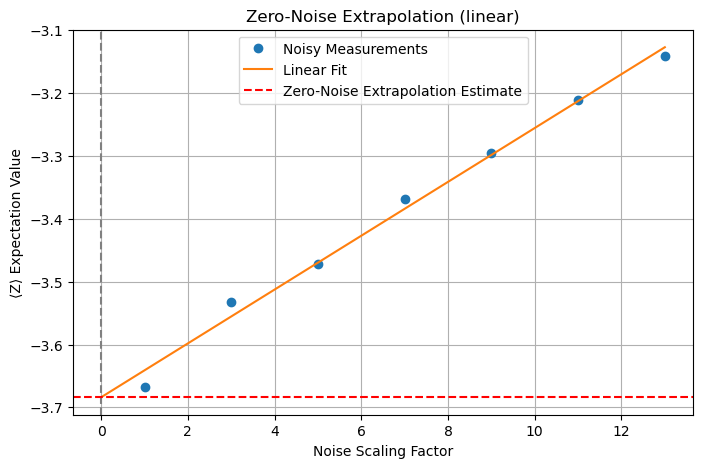


------------------------------------------------------------------------------------

Extrapolation Method: QUADRATIC
- ⟨Z⟩ (Zero-Noise Extrapolation (ZNE)'s Estimate): -3.711


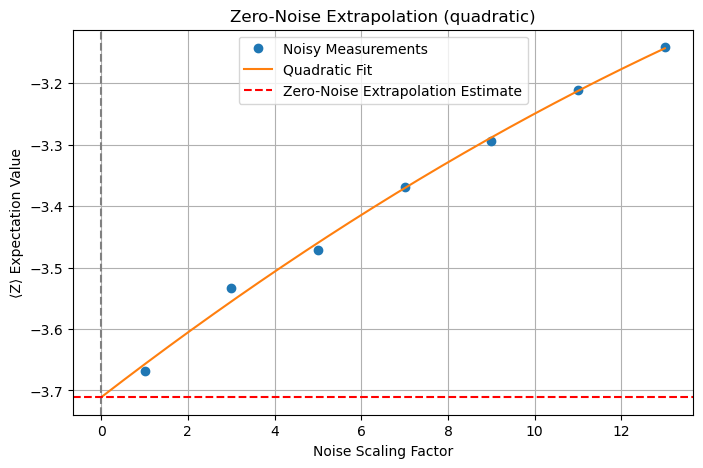


------------------------------------------------------------------------------------

Extrapolation Method: EXPONENTIAL
- ⟨Z⟩ (Zero-Noise Extrapolation (ZNE)'s Estimate): -3.714


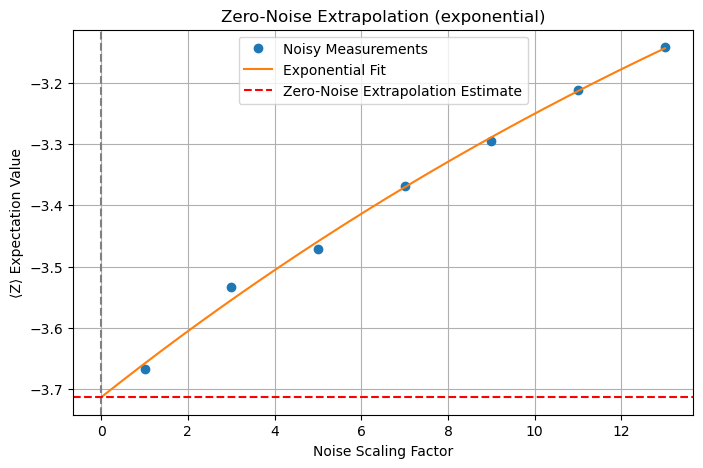


------------------------------------------------------------------------------------



In [77]:
# Define the list with the Extrapolation methods
methods = ["linear", "quadratic", "exponential"]


# For each Extrapolation method
for method in methods:
    
    # Print the name of the current Extrapolation method
    print(f"\033[1mExtrapolation Method: {method.upper()}\033[0m")

    # Perform the Extrapolation method,
    # using the Zero-Noise Extrapolation (ZNE)
    zero_val, fitted_vals, fit_params, fit_fn = \
        zne_method(method = method,
                   xdata = xdata, ydata = ydata)

    # Print the estimated/extrapolated expectation value
    # from the Zero-Noise Extrapolation (ZNE) method
    print(f"- ⟨Z⟩ (Zero-Noise Extrapolation (ZNE)'s Estimate):"
          f" {zero_val:.3f}")

    # Plot the results from the Zero-Noise Extrapolation (ZNE),
    # using the current Extrapolation method considered
    plot_zne(xdata, fitted_vals, zero_val,
             fit_fn, fit_params, method)

    # Print a line separator
    print("\n-----------------------------------------" +\
          "-------------------------------------------\n")

***

# Congratulations!
<a id="congratulations"></a>

***

You have successfully completed **Lab 2** of the **Quantum Global Summer School 2025**!

In this lab we explored the various *sources of* **Quantum Noise** that can affect your **Quantum Circuit**, and - more importantly - the *dedicated tools* we can use to *cut through the noise*. With these tools at hand, you are now well-equipped to tackle any of your on-going **Quantum Algorithms** and execute them on **real** **quantum hardware**.

Remember, the key steps to follow are:

- **Choose the right hardware** that is well-suited for your **Quantum Circuit**;
- **Use the Transpiler** to select the best possible *qubits' layout* and *minimize the number of* **Two-Qubit Gates** *and other metrics*;
- **Apply Quantum Error Mitigation (QEM) and Quantum Error Suppression (QES)** to further *reduce the impact of* **Quantum Noise** and *improve the performance*.

Keep that in mind and you are all set to tackle your quantum challenges ahead!

That's all, folks! Or is it?

In [78]:
# Import the function to check the lab completion status
# for the labs of the Qiskit Global Summer School 2025
# from the Grader library
from qc_grader.grader.grade import check_lab_completion_status


# Check the current lab completion status
# for the labs of the Qiskit Global Summer School 2025
check_lab_completion_status("qgss_2025")

Lab 0: 2/2 exercises completed (100%)
    ✅ 2298 participants have completed this lab
Lab 1: 9/9 exercises completed (100%)
    ✅ 1778 participants have completed this lab
Lab 2: 7/7 exercises completed (100%)
    ✅ 1059 participants have completed this lab
Lab 3: 0/5 exercises completed (0%)
    ✅ 862 participants have completed this lab
Lab 4: 0/6 exercises completed (0%)
    ✅ 642 participants have completed this lab
Functions Labs: 0/8 exercises completed (0%)
    ✅ 4 participants have completed this lab


***

# Bonus Challenge: Scaling it Up!
<a id="bonus"></a>

As a bonus, we have included a more complicated version of this problem, in which you will implement the **Max-Cut Problem** on **IBM** **quantum hardware**. This is your chance to put everything you have learned into practice, including the **Quantum Error Mitigation (QEM)** techniques!

***

## The (Scaled) Max-Cut Problem

Let's start by defining our *(scaled)* **Max-Cut Problem** and the corresponding graph.

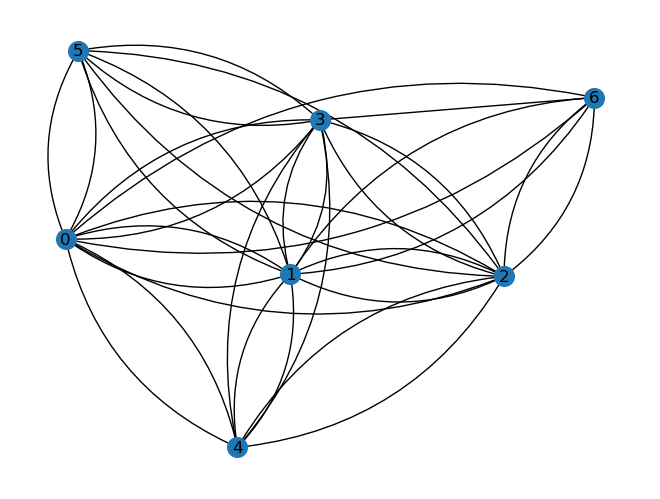

In [79]:
# Define the (extended) number of nodes for
# the graph of the (extended) Max-Cut Problem
num_nodes_ext = 7


# Define the graph of the (extended) Max-Cut Problem
graph_ext = rx.PyGraph()

# Add nodes to the graph of the (extended) Max-Cut Problem
graph_ext.add_nodes_from(np.arange(0, num_nodes_ext, 1))

# Create a (generic) Backend for a Quantum Simulation
generic_backend_ext = GenericBackendV2(num_nodes_ext, seed = seed)

# Define the weight of the edges
# for the graph of the (extended) Max-Cut Problem 
weight = 1


# Add edges to the graph of the (extended)
# Max-Cut Problem according to the Coupling Map of
# the Quantum Backend to be used as the IBM's Brisbane
# retrieved from the Qiskit's Runtime Service
# for the Qiskit Global Summer School 2025
# Note:
# * The graph will be defined explicitly as being
#   asymmetrical to have a smaller set of solutions
graph_ext.add_edges_from([(edge[0], edge[1], weight)
                          for edge in generic_backend_ext.coupling_map][:-7])

# Draw the graph of the (extended) Max-Cut
# Problem according to the Coupling Map of
# the Quantum Backend to be used as the IBM's Brisbane
# retrieved from the Qiskit's Runtime Service
# for the Qiskit Global Summer School 2025
draw_graph(graph_ext, node_size = 200,
           with_labels = True, width = 1)

In [80]:
# Convert the (extended) Max-Cut Problem graph to
# a Hamiltonian defined as list of Identity and Pauli gates
max_cut_paulis_ext = graph_to_Pauli(graph_ext)

# Compute the Cost Function of the Hamiltonian of
# the graph for the Max-Cut Problem defined previously
cost_function_hamiltonian_ext = \
    SparsePauliOp.from_list(max_cut_paulis_ext)

In [81]:
# Create the Pass Manager for the transpilation of
# the Quantum Circuit for the Quantum Approximate
# Optimization Algorithm (QAOA) Ansatz for
# the (generic) Backend defined before
# and with some optimization settings
pass_manager = generate_preset_pass_manager\
               (optimization_level = 3,
                backend = generic_backend_ext,
                seed_transpiler = seed)

In [82]:
# Define the number of alternating 
# layers of the two Hamiltonians
# for the (extended) Quantum Approximate
# Optimization Algorithm (QAOA) Ansatz
layers = 2

In [83]:
# Define the initial parameters of
# the (parameterized and extended)
# Quantum Approximate Optimization
# Algorithm (QAOA) Ansatz Quantum Circuit model
init_params = np.zeros(2 * num_layers)

In [84]:
# Define the Quantum Circuit
# for the (extended) Quantum Approximate
# Optimization Algorithm (QAOA) Ansatz,
# with the corresponding Cost Function of
# the graph for the Max-Cut Problem defined previously
# and the number of alternating layeres of the two Hamiltonians
qaoa_ansatz_circuit_ext = \
    QAOAAnsatz(cost_operator = cost_function_hamiltonian_ext,
               reps = num_layers)

In [85]:
# Measure all the qubits
# in the Quantum Circuit
# for the (extended) Quantum Approximate
# Optimization Algorithm (QAOA) Ansatz
qaoa_ansatz_circuit_ext.measure_all()

In [86]:
# Transpile the Quantum Circuit
# for the (extended) Quantum Approximate
# Optimization Algorithm (QAOA) Ansatz
# for the Quantum Simulation
qaoa_ansatz_circuit_transpiled = \
    pass_manager.run(qaoa_ansatz_circuit_ext)

***

### Choose the Best Real Quantum Backend

Here, we will choose the **best** **real** **Quantum Backend** from the ones that are available for you, by selecting the one with the **smallest accumulated error rate**.

***

In [87]:
# Create an empty list for all
# the transpiled Quantum Circuits for
# the (extended) Quantum Approximate
# Optimization Algorithm (QAOA) Ansatz
qaoa_ansatz_circuit_transpiled_ext_list = []

# Create an empty list for
# the accumulated quantum errors obtained
# from all the transpiled Quantum Circuits
# for the (extended) Quantum Approximate
# Optimization Algorithm (QAOA) Ansatz
acc_error_list = []


# For each real Quantum Backend
for backend_hw in real_backends:
    
    # Create the Pass Manager for the transpilation of
    # the Quantum Circuit for the (extended) Quantum
    # Approximate Optimization Algorithm (QAOA) Ansatz
    # for the current real Quantum Backend and Transpiler's seed
    # defined before and with some optimization settings
    pass_manager = \
        generate_preset_pass_manager(optimization_level = 3,
                                     backend = backend_hw,
                                     seed_transpiler = seed)
    
    # Transpile the Quantum Circuit
    # for the (extended) Quantum Approximate
    # Optimization Algorithm (QAOA) Ansatz
    # for the Quantum Simulation
    qaoa_ansatz_circuit_transpiled_ext = \
        pass_manager.run([qaoa_ansatz_circuit_ext])[0]
    
    # Append the current transpiled
    # Quantum Circuit for the (extended)
    # Quantum Approximate Optimization Algorithm (QAOA)
    # Ansatz to the respective list
    qaoa_ansatz_circuit_transpiled_ext_list\
        .append(qaoa_ansatz_circuit_transpiled_ext)

    
    ### WRITE YOUR CODE BELOW HERE ###
    
    # Bonus Task/Step: Compute the accumulated quantum error rate
    #                  for the current transpiled Quantum Circuit
    #                  for the (extended) Quantum Approximate
    #                  Optimization Algorithm (QAOA) Ansatz 
    #
    # Hint: Use the accumulated_errors function,
    #       `backend_hw` and `qaoa_ansatz_circuit_transpiled_ext`
    #        and get the errors_and_counts[0] value
    
    # Compute the accumulated total errors of
    # Single-Qubit Gates, Two-Qubit Gates, and Readout,
    # as well as their quantum gates count for a given
    # Quantum Circuit on a specific Quantum Backend
    errors_and_counts = compute_accumulated_gate_errors_and_counts\
                        (backend_hw, qaoa_ansatz_transpiled_circuit)
    
    # Retrieve the accumulated quantum error
    # rate obtained from the current transpiled
    # Quantum Circuit for the (extended) Quantum
    # Approximate Optimization Algorithm (QAOA) Ansatz
    acc_error = errors_and_counts[0]

    ### YOUR CODE FINISHES HERE    ###

    
    # Append the accumulated quantum error
    # rate obtained from the current transpiled
    # Quantum Circuit for the (extended) Quantum
    # Approximate Optimization Algorithm (QAOA) Ansatz
    acc_error_list.append(acc_error)

In [88]:
# Retrieve the best Quantum Backend,
# which has the execution of the Quantum Circuit
# for the (extended) Quantum Approximate Optimization
# Algorithm (QAOA) Ansatz with the smallest accumulated error rate
best_backend_ext = real_backends[acc_error_list.index(min(acc_error_list))]

In [89]:
# Print the best Quantum Backend,
# which has the execution of the Quantum Circuit
# for the (extended) Quantum Approximate Optimization
# Algorithm (QAOA) Ansatz with the smallest accumulated error rate
print(f"The Real Quantum Backend {best_backend_ext.name} has the (transpiled)\n"
      f"Quantum Circuit with the smallest total accumulated error:\n"
      f"- {min(acc_error_list):.3f}")

The Real Quantum Backend ibm_brisbane has the (transpiled)
Quantum Circuit with the smallest total accumulated error:
- 0.115


***

### Optimize the Qubits' Layout and Minimize the Accumulated Error

Now, we need to identify the *qubits' layout* that has the lowest **Two-Qubit Gate Accumulated Error rate**, by sweeping over all possible **Transpiler**'s *seed*.

In [90]:
# Find the Transpiler's seed that minimizes Two-Qubit Gate
# Error rate for a given Quantum Circuit and a Quantum Backend as well,
# retrieving the optimal (extended) transpiled Quantum Circuit for the best
# Transpiler's seed, the best Transpiler's seed, the minimum Two-Qubit
# Gate Accumulated Error rate threshold for the best Transpiler's seed,
# and the Two-Qubit Gate Count in the optimal transpiled Quantum Circuit
# for the best Transpiler's seed
circuit_ext_opt_seed, best_seed_transpiler, min_err_acc_seed, _ = \
    finding_best_seed(qaoa_ansatz_circuit_ext, best_backend_ext)

In [91]:
# Print a line separator
print("----------------------------------------------------\n")

# Print the best Transpiler's seed found
print(f"Best Transpiler's Seed:\n"
      f"- {best_seed_transpiler}")

# Print a blank line
print()

# Print the minimum accumulated Two-Qubit Gate Error
# rate for the best Transpiler's seed found
print(f"Minimum Accumulated Two-Qubit Gate Error\n"
      f"for the best Transpiler's seed found:\n"
      f"- {min_err_acc_seed:.3f}")

# Print a blank line
print()

# Print a line separator
print("----------------------------------------------------\n")

----------------------------------------------------

Best Transpiler's Seed:
- 492

Minimum Accumulated Two-Qubit Gate Error
for the best Transpiler's seed found:
- 0.601

----------------------------------------------------



***

### Execute the Quantum Circuit on the Quantum Simulator

First, we must *optimize the parameters* of this **Quantum Approximate Optimization Algorithm (QAOA)** problem. 

In [92]:
# Retrieve the noisy Quantum Simulator (Fake Quantum Backend)
# from the Aer Simulator according to the best real Quantum Backend,
# considering a given Transpiler's seed as well 
best_backend_sim = AerSimulator.from_backend(best_backend_ext,
                                             seed_simulator = seed)


# Optimize the (parameterized and extended) Quantum Approximate
# Optimization Algorithm (QAOA) Ansatz Quantum Circuit model,
# using the Constrained Optimization By Yinear Linear Approximation
# (COBYLA) optimizer and an estimator on a given Backend,
# retrieving the final optimization results and Objective Function Values
result_qaoa_sim, objective_func_vals_sim = \
    train_qaoa(init_params, circuit_ext_opt_seed,
               cost_function_hamiltonian_ext,
               best_backend_sim)

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -2.5630243697563024
       x: [ 1.028e+00  1.246e+00  6.579e-02  9.560e-01]
    nfev: 73
   maxcv: 0.0


Now, we can sample from the **Quantum Circuit** for the **Quantum Approximate Optimization Algorithm (QAOA)** problem.

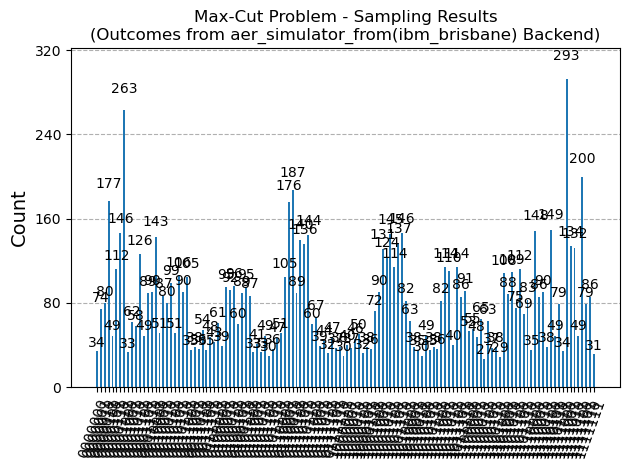

In [93]:
# Retrieve the parameters of the final optimization results
# and Objective Function Values for the solved optimization problem
# for the (parameterized and extended) Quantum Approximate
# Optimization Algorithm (QAOA) Ansatz Quantum Circuit model
opt_params_sim = result_qaoa_sim.x


# Retrieve the counting (discrete) results of
# the Quantum Simulation of the (parameterized)
# Quantum Approximate Optimization Algorithm (QAOA)
# Ansatz Quantum Circuit model with the optimized parameters
counts_list_sim = sample_qaoa(opt_params_sim,
                              circuit_ext_opt_seed,
                              best_backend_sim)

***

### Checking the Results

Now, let's check the final results for our *(scaled)* **Max-Cut Problem**.

In [94]:
# Compute the eigenvalues and eigenvectors of
# the Cost Function of the Hamiltonian of the graph
# for the (extended) Max-Cut Problem defined previously
eigenvalues_ext, eigenvectors_ext = np.linalg.eig(cost_function_hamiltonian_ext)


# Retrieve the real values of the minimum eigenvalues
# computed before from the Cost Function of the Hamiltonian of
# the graph for the (extended) Max-Cut Problem defined previously,
# as being the ground energy values
ground_energy_ext = min(eigenvalues_ext).real

# Retrieve the number of solutions of
# the (extended) Max-Cut Problem defined previously,
# by counting the eigenvalues corresponding
# to the ground energy values found
num_solutions_ext = eigenvalues_ext.tolist().count(ground_energy_ext)

# Retrieve the indices of the solutions of
# the (extended) Max-Cut Problem defined previously,
# by counting the eigenvalues corresponding
# to the ground energy values found
index_solutions_ext = np.where(eigenvalues_ext == ground_energy_ext)[0].tolist()

In [95]:
# Print the ground energy value of the Cost Function of
# the Hamiltonian of the graph for the (extended)
# Max-Cut Problem defined previously
print(f"The ground energy of the Hamiltonian is: {ground_energy_ext}\n")

# Print the number of solutions of the Cost Function of
# the Hamiltonian of the graph for the (extended)
# Max-Cut Problem defined previously
print(f"The number of solutions of the problem is: {num_solutions_ext}\n")

# Print the list of solutions based on their
# index from the Cost Function of the Hamiltonian of
# the graph for the (extended) Max-Cut Problem defined previously
print(f"The list of the solutions based on their index is: {index_solutions_ext}")

The ground energy of the Hamiltonian is: -13.0

The number of solutions of the problem is: 2

The list of the solutions based on their index is: [7, 120]


In [96]:
# Convert the indices of the solutions found
# from a decimal representation to a binary representation,
# corresponding the quantum states solutions
states_solutions_ext = decimal_to_binary(index_solutions_ext, num_nodes_ext)

# Sort the counting (discrete) results of
# the Quantum Simulation of the (parameterized and extended)
# Quantum Approximate Optimization Algorithm (QAOA) Ansatz
# Quantum Circuit model with the optimized parameters,
# by their counts in the descending order
sorted_states_sim = sorted(counts_list_sim.items(),
                           key = lambda item: item[1], reverse = True)

# Retrieve the top quantum states from the counting
# (discrete) results of the Quantum Simulation of
# the (parameterized and extended) Quantum Approximate
# Optimization Algorithm (QAOA) Ansatz Quantum Circuit
# model with the optimized parameters, according to
# the number of solutions found
top_states_sim = sorted_states_sim[:num_solutions_ext]

# Retrieve only the quantum states from
# the top (solution) quantum states extracted from
# the counting (discrete) results of the Quantum Simulation of
# the (parameterized and extended) Quantum Approximate
# Optimization Algorithm (QAOA) Ansatz Quantum Circuit
# model with the optimized parameters
qaoa_ground_states_sim = sorted([state for state, count in top_states_sim])

In [97]:
# Print the analytical solutions for the (extended) Max-Cut Problem
print(f"The analytical solutions for the (extended) Max-Cut Problem are:\n"
      f"- {states_solutions_ext}")

# Print a blank line
print()

# Print the ground state solutions found for the (extended) Max-Cut Problem,
# using the Quantum Approximate Optimization Algorithm (QAOA)
print(f"The Quantum Approximate Optimization Algorithm (QAOA)'s\n"
      f"ground states solutions for the (extended) Max-Cut Problem are:\n"
      f"- {qaoa_ground_states_sim} for Quantum Backend {best_backend_sim.name}")

The analytical solutions for the (extended) Max-Cut Problem are:
- ['0000111', '1111000']

The Quantum Approximate Optimization Algorithm (QAOA)'s
ground states solutions for the (extended) Max-Cut Problem are:
- ['0000111', '1111000'] for Quantum Backend aer_simulator_from(ibm_brisbane)


***

# Running on Real Quantum Hardware

Finally we can execute the *(scaled)* **Max-Cut Problem** on **real** **quantum hardware**, and compare the results.

***

<a id="Warning_1"></a>

<div class="alert alert-block alert-warning">
<b>Resource Limit:</b> 

* When running the section below, you will execute the above problem on **real** **quantum hardware**, which could consume approximately 2-3 minutes of the your *Open Plan* allotment. Please proceed only if you are comfortable with this potential usage. Also, please try to maintain these settings if possible, to make sure you do not use too much time. 
</div>

***

### Using the Estimator Primitive

We will not train the **Quantum Circuit** for the **Quantum Approximate Optimization Algorithm (QAOA)** on **real** **quantum hardware**, as it will consume a lot of your *Open Plan* allotment. Instead, we will execute the **Estimator** with the *optimized parameters* and will apply **Quantum Error Mitigation (QEM)** techniques later to see how we can improve the results.

First, we compute the **ground state energy** on **real** **quantum hardware** without **Quantum Error Mitigation (QEM)**.

In [98]:
### WRITE YOUR CODE BELOW HERE ###

# Bonus Task/Step: Based on previous section,
#                  choose the best Quantum Backend for
#                  executing the code on real quantum hardware
best_backend_hw = service.backend(best_backend_ext.name)

### YOUR CODE FINISHES HERE    ###


# Define the options for the Quantum Simulation,
# using the Estimator to be executed in the best Quantum Backend
options = EstimatorOptions(default_shots = 100000)

# Define the Estimator for the Quantum Simulation,
# to be executed in the best Quantum Backend and
# with some options for the Quantum Simulation
# without Quantum Error Mitigation (QEM) techniques
estimator = Estimator(mode = best_backend_hw,
                      options = options)


# Retrieve the Cost Function of the Hamiltonian of
# the graph for the (extended) Max-Cut Problem
# defined previously, as being the solution
# ground energy values for the problem
# without Quantum Error Mitigation (QEM) techniques
ground_energy_ext_hw = \
    cost_func_estimator(opt_params_sim, circuit_ext_opt_seed,
                        cost_function_hamiltonian_ext, estimator)


# Print the ground energy of the (transpiled) Quantum Circuit
# for the Quantum Approximate Optimization Algorithm (QAOA)
# executed in the best real Quantum Backend obtained
# without Quantum Error Mitigation (QEM) techniques
print(f"The ground energy of the (transpiled) Quantum Circuit\n"
      f"for the Quantum Approximate Optimization Algorithm (QAOA)\n"
      f"executed on the Real Quantum Backend {best_backend_hw.name},\n"
      f"without Quantum Error Mitigation (QEM) is: {ground_energy_ext_hw}")

The ground energy of the (transpiled) Quantum Circuit
for the Quantum Approximate Optimization Algorithm (QAOA)
executed on the Real Quantum Backend ibm_brisbane,
without Quantum Error Mitigation (QEM) is: 0.013684917058405077


Now, we apply different **Quantum Error Mitigation (QEM)** and **Quantum Error Suppression (QES)** techniques.

<br>

The different techniques we will apply are:

- **Dynamical Decoupling**:
    * This **Quantum Error Suppression (QES)** technique involves applying a *sequence of control pulses to idle qubits to cancel out unwanted interactions and coherent error*;
    * It helps *preserve* **quantum coherence** *by effectively* "*decoupling*" *the quantum physical system from sources of* **Quantum Noise** over time.
- **Pauli Twirling**:
    * This **Quantum Error Mitigation (QEM)** technique *transforms arbitrary* **Quantum Noise** *into simpler* **Pauli** **Quantum Noise** by randomly applying and undoing **Pauli Gates** *around operations*, *reducing the impact of* **coherent errors** *and enabling more effective* **Quantum Noise** *modeling and correction*.
- **Twirled Readout Error eXtinction (TREX)**:
    * **Twirled Readout Error eXtinction (TREX)** is a **Readout** **Quantum Error Mitigation (QEM)** technique that *reduces* **quantum measurement errors** *by randomly flipping qubits before* **quantum measurements** *and classically correcting the results*, *effectively diagonalizing the* **Readout-Error Matrix** *and simplifying its inversion for more accurate* **expectation value estimation**.
- **Zero-Noise Extrapolation (ZNE)**:
    * As explained before, **Zero-Noise Extrapolation (ZNE)** is an **Quantum Error Mitigation (QEM)** technique that *estimates the result of a* **quantum computation** *as if it were run on a noise-free* **quantum device**;
    * It does this by *deliberately increasing the* **Quantum Noise** *in a controlled way*, *measuring the results*, and then *extrapolating back to the zero-noise limit*.

In [99]:
# Define the options for the Quantum Simulation,
# using the Estimator to be executed in the best Quantum Backend
options = EstimatorOptions(default_shots = 100000)

# Set/Enable the Dynamical Decoupling options
# for a Quantum Simulation using the Estimator
options.dynamical_decoupling.enable = True

# Set/Enable the (Probabilistic) Pauli Twirling options
# for a Quantum Simulation using the Estimator
options.twirling.enable_gates = True
options.twirling.num_randomizations = 10
options.twirling.shots_per_randomization = 10000

# Set/Enable the Twirled Readout Error eXtinction (TREX) options
# for a Quantum Simulation using the Estimator
options.resilience.measure_mitigation = True
options.resilience.measure_noise_learning.num_randomizations = 10
options.resilience.measure_noise_learning.shots_per_randomization = 10000

# Set/Enable the Zero-Noise Extrapolation (ZNE) options
# for a Quantum Simulation using the Estimator
options.resilience.zne_mitigation = True
options.resilience.zne.amplifier = "gate_folding"
options.resilience.zne.extrapolator = "polynomial_degree_2"
options.resilience.zne.noise_factors = (1, 3, 5)

In [100]:
# Define the Estimator for the Quantum Simulation,
# to be executed in the best Quantum Backend and
# with some options for the Quantum Simulation
# with Quantum Error Mitigation (QEM) and
# Quantum Error Suppression (QES) techniques
estimator_EM = Estimator(mode = best_backend_hw,
                         options = options)


# Retrieve the Cost Function of the Hamiltonian of
# the graph for the (extended) Max-Cut Problem
# defined previously, as being the solution
# ground energy values for the problem
# with Quantum Error Mitigation (QEM) and
# Quantum Error Suppression (QES) techniques
ground_energy_ext_hw_EM = \
    cost_func_estimator(opt_params_sim, circuit_ext_opt_seed,
                        cost_function_hamiltonian_ext, estimator_EM)


# Print the ground energy of the (transpiled) Quantum Circuit
# for the Quantum Approximate Optimization Algorithm (QAOA)
# executed in the best real Quantum Backend obtained
# with Quantum Error Mitigation (QEM) and
# Quantum Error Suppression (QES) techniques
print(f"The ground energy of the (transpiled) Quantum Circuit\n"
      f"for the Quantum Approximate Optimization Algorithm (QAOA)\n"
      f"executed on the Real Quantum Backend {best_backend_hw.name},\n"
      f"with Quantum Error Mitigation (QEM) and\n"
      f"and Quantum Error Suppression (QES) is: {ground_energy_ext_hw_EM}")

The ground energy of the (transpiled) Quantum Circuit
for the Quantum Approximate Optimization Algorithm (QAOA)
executed on the Real Quantum Backend ibm_brisbane,
with Quantum Error Mitigation (QEM) and
and Quantum Error Suppression (QES) is: -2.625888055181187


Now, we can use the **Sampler** primitive on **real** **Quantum Hardware** without any **Quantum Error Mitigation (QEM)** and **Quantum Error Suppression (QES)** techniques.

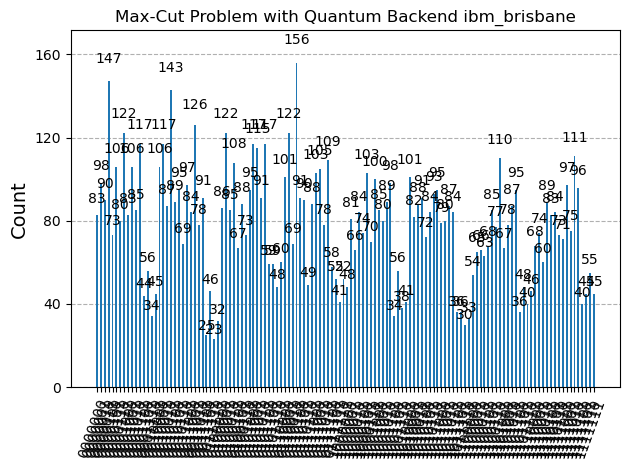

In [101]:
# Retrieve the parameters of the final optimization
# results and Objective Function Values for the solved
# optimization problem for the (parameterized and extended)
# Quantum Approximate Optimization Algorithm (QAOA)
# Ansatz Quantum Circuit model
opt_params_sim = result_qaoa_sim.x


# Define the Sampler for the Quantum Simulation
# for the best real Quantum Backend found
sampler = Sampler(mode = best_backend_hw)


# Submit the given (parameterized and extended)
# Quantum Approximate Optimization Algorithm (QAOA)
# Ansatz Quantum Circuit model and respective
# optimized parameters to the Sampler and execute it,
# retrieving the corresponding job
job = sampler.run([(circuit_ext_opt_seed,
                    opt_params_sim)], shots = SHOTS)

# Get the results of the job
# executed from the Sampler 
results_sampler = job.result()


# Retrieve the counting (discrete)
# results of the job executed from the Sampler 
# without Quantum Error Mitigation (QEM) and
# Quantum Error Suppression (QES) techniques
counts_list_hw = results_sampler[0].data.meas.get_counts()


# Display the histogram plot with
# the counting (discrete) results of
# the job executed from the Sampler,
# for the (extended) Max-Cut Problem
# without Quantum Error Mitigation (QEM) and
# Quantum Error Suppression (QES) techniques
display(plot_histogram(counts_list_hw,
                       title = f"Max-Cut Problem with Quantum Backend "
                               f"{best_backend_hw.name}"))

Now, we include **Quantum Error Mitigation (QEM)** and **Quantum Error Suppression (QES)** techniques in the **Sampler** primitive.

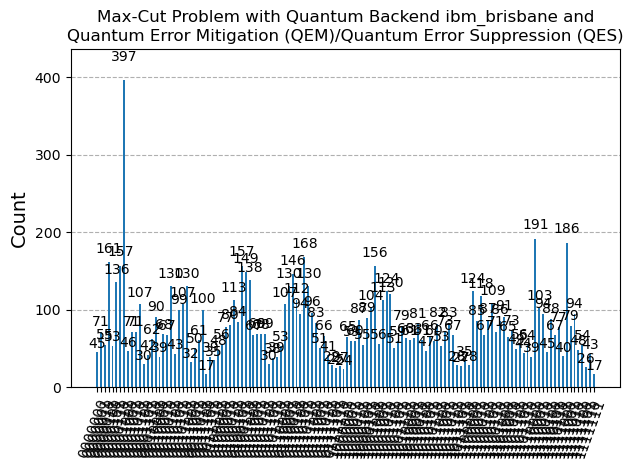

In [102]:
# Retrieve the parameters of the final optimization
# results and Objective Function Values for the solved
# optimization problem for the (parameterized and extended)
# Quantum Approximate Optimization Algorithm (QAOA)
# Ansatz Quantum Circuit model
opt_params_sim = result_qaoa_sim.x


# Define the Sampler for the Quantum Simulation
# for the best real Quantum Backend found
sampler = Sampler(mode = best_backend_hw)

# Set/Enable the Dynamical Decoupling options
# for a Quantum Simulation using the Sampler
sampler.options.dynamical_decoupling.enable = True


# Submit the given (parameterized and extended)
# Quantum Approximate Optimization Algorithm (QAOA)
# Ansatz Quantum Circuit model and respective
# optimized parameters to the Sampler and execute it,
# retrieving the corresponding job
job = sampler.run([(circuit_ext_opt_seed,
                    opt_params_sim)], shots = SHOTS)

# Get the results of the job
# executed from the Sampler 
results_sampler = job.result()


# Retrieve the counting (discrete)
# results of the job executed from the Sampler 
# with Quantum Error Mitigation (QEM) and
# Quantum Error Suppression (QES) techniques 
counts_list_hw_EM = results_sampler[0].data.meas.get_counts()


# Display the histogram plot with
# the counting (discrete) results of
# the job executed from the Sampler,
# for the (extended) Max-Cut Problem
# with Quantum Error Mitigation (QEM) and
# Quantum Error Suppression (QES) techniques
display(plot_histogram(counts_list_hw_EM,
                       title = f"Max-Cut Problem with Quantum Backend "
                               f"{best_backend_hw.name} and\n"
                               f"Quantum Error Mitigation (QEM)/"
                               f"Quantum Error Suppression (QES)"))

***

### Check the Results

Now, let's check the final results for our *(scaled)* **Max-Cut Problem**.

In [103]:
# Sort the counting (discrete) results of
# the Quantum Simulation of the (parameterized and extended)
# Quantum Approximate Optimization Algorithm (QAOA) Ansatz
# Quantum Circuit model with the optimized parameters,
# by their counts in the descending order,
# without Quantum Error Mitigation (QEM) and
# Quantum Error Suppression (QES) techniques
sorted_states_hw = sorted(counts_list_hw.items(),
                          key = lambda item: item[1], reverse = True)

# Retrieve the top quantum states
# from the counting (discrete) results of
# the Quantum Simulation of the (parameterized and extended)
# Quantum Approximate Optimization Algorithm (QAOA) Ansatz
# Quantum Circuit model with the optimized parameters,
# according to the number of solutions found,
# without Quantum Error Mitigation (QEM) and
# Quantum Error Suppression (QES) techniques
top_states_hw = sorted_states_hw[:num_solutions_ext]

# Retrieve only the quantum states
# from the top (solution) quantum states
# extracted from the counting (discrete) results of
# the Quantum Simulation of the (parameterized and extended)
# Quantum Approximate Optimization Algorithm (QAOA) Ansatz
# Quantum Circuit model with the optimized parameters,
# without Quantum Error Mitigation (QEM) and
# Quantum Error Suppression (QES) techniques
qaoa_ground_states_hw = sorted([state for state, count in top_states_hw])

In [104]:
# Sort the counting (discrete) results of
# the Quantum Simulation of the (parameterized and extended)
# Quantum Approximate Optimization Algorithm (QAOA) Ansatz
# Quantum Circuit model with the optimized parameters,
# by their counts in the descending order,
# with Quantum Error Mitigation (QEM) and
# Quantum Error Suppression (QES) techniques
sorted_states_hw_EM = sorted(counts_list_hw_EM.items(),
                             key = lambda item: item[1], reverse = True)

# Retrieve the top quantum states
# from the counting (discrete) results of
# the Quantum Simulation of the (parameterized and extended)
# Quantum Approximate Optimization Algorithm (QAOA) Ansatz
# Quantum Circuit model with the optimized parameters,
# according to the number of solutions found,
# with Quantum Error Mitigation (QEM) and
# Quantum Error Suppression (QES) techniques
top_states_hw_EM = sorted_states_hw_EM[:num_solutions_ext]

# Retrieve only the quantum states
# from the top (solution) quantum states
# extracted from the counting (discrete) results of
# the Quantum Simulation of the (parameterized and extended)
# Quantum Approximate Optimization Algorithm (QAOA) Ansatz
# Quantum Circuit model with the optimized parameters,
# with Quantum Error Mitigation (QEM) and
# Quantum Error Suppression (QES) techniques
qaoa_ground_states_hw_EM = sorted([state for state, count in top_states_hw_EM])

In [105]:
# Print the analytical solutions for the (extended) Max-Cut Problem
print(f"The analytical solutions for the (extended) Max-Cut Problem are:\n"
      f"- {states_solutions_ext}")

# Print a blank line
print()

# Print the ground state solutions
# found for the (extended) Max-Cut Problem,
# using the Quantum Approximate Optimization Algorithm (QAOA),
# without Quantum Error Mitigation (QEM) and
# Quantum Error Suppression (QES) techniques
print(f"The Quantum Approximate Optimization Algorithm (QAOA)'s\n"
      f"ground states solutions for the (extended) Max-Cut Problem without\n"
      f"Quantum Error Mitigation (QEM)/Quantum Error Suppression (QES)\n"
      f"techniques for Quantum Backend {best_backend_hw.name} are:\n"
      f"- {qaoa_ground_states_hw}")
      
# Print a blank line
print()

# Print the ground state solutions
# found for the (extended) Max-Cut Problem,
# using the Quantum Approximate Optimization Algorithm (QAOA),
# with Quantum Error Mitigation (QEM) and
# Quantum Error Suppression (QES) techniques
print(f"The Quantum Approximate Optimization Algorithm (QAOA)'s\n"
      f"ground states solutions for the (extended) Max-Cut Problem with\n"
      f"Quantum Error Mitigation (QEM)/Quantum Error Suppression (QES)\n"
      f"techniques for Quantum Backend {best_backend_hw.name} are:\n"
      f"- {qaoa_ground_states_hw_EM}")

The analytical solutions for the (extended) Max-Cut Problem are:
- ['0000111', '1111000']

The Quantum Approximate Optimization Algorithm (QAOA)'s
ground states solutions for the (extended) Max-Cut Problem without
Quantum Error Mitigation (QEM)/Quantum Error Suppression (QES)
techniques for Quantum Backend ibm_brisbane are:
- ['0000011', '0110011']

The Quantum Approximate Optimization Algorithm (QAOA)'s
ground states solutions for the (extended) Max-Cut Problem with
Quantum Error Mitigation (QEM)/Quantum Error Suppression (QES)
techniques for Quantum Backend ibm_brisbane are:
- ['0000111', '1110000']


***

## Future Work and Tasks

If you still have some time left for running experiments on **real** **quantum hardware**, feel free to explore a few additional things:

- Experiment with **Quantum Error Mitigation (QEM)** techniques:
    * Try rerunning your execution on hardware using different **Quantum Error Mitigation (QEM)** and **Quantum Error Suppression (QES)** strategies;
    * You can enable or disable specific techniques or tweak various parameters to study their impact.
<br><br>
- Redo the **Bonus Challenge**:
    * Try rerunning the entire **Bonus Challenge** section using a different **Quantum Backend** to compare results and performance.
<br><br>
- Scale it up even more:
    * Try scaling the problem to a larger system, such as 10 qubits, and rerun your experiments;
    * However, this might take some time in both the **Quantum Simulator** and **Quantum Hardware**, so we encourage you to try the first two other points first.

***

## References

1. Farhi, Edward, Goldstone, Jeffrey, Gutmann, Sam (2014). A Quantum Approximate Optimization Algorithm. arXiv (1411.4028)
2. Nation, Paul, Treinish, Matthew (2023). Suppressing Quantum Circuit Errors Due to System Variability. PRX Quantum, 4(1), 010327.
3. Temme, Kristan, Bravyi, Sergey, Gambetta, Jay (2017). Error Mitigation for Short-Depth Quantum Circuits. Phys. Rev. Lett., 119(18), 180509.

***

# Additional Information

**Created by:** Jorge Martínez de Lejarza, Alberto Maldonado

**Advised by:** Marcel Pfaffhauser, Paul Nation, Junye Huang, Sophy Shin

**Version:** 1.0

***

Congratulations! You finished **Lab 2** of the **IBM's Qiskit Global Summer School 2025**! 🎉 🎉 🎉

Made with ❤ by Rúben André Barreiro (and adapted from **IBM Quantum**).